# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
import statistics as st
from tqdm import trange
from tqdm import tqdm
import itertools
from scipy.stats import wasserstein_distance, energy_distance
from itertools import permutations, repeat
print("")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# Save Figure
#fig.write_html('drive/My Drive/images/betweennessHist.html')

# Analyzing the Big Graph

## Loading the big graph and showing the details

In [2]:
dfBigGraph = pd.read_csv('drive/My Drive/data/CGCS-GraphData.csv')
#dfBigGraph.describe()

In [3]:
dfBigGraph = dfBigGraph[["Source", "eType", "Target", "Time", "Weight", "SourceLocation"]]
#dfBigGraph.describe()

In [ ]:
# dfBigGraph = dfBigGraph[["Source", "eType", "Target"]]

In [ ]:
dfBigGraph = dfBigGraph.drop_duplicates()

In [ ]:
list(list())

In [ ]:
# ImportantPeople = list(dfBigGraph[dfBigGraph["eType"] == 0]["Source"])

# ImportantPeople = ImportantPeople + list(dfBigGraph[dfBigGraph["eType"] == 0]["Target"])

# ImportantPeople = ImportantPeople + list(dfBigGraph[dfBigGraph["eType"] == 1]["Source"])
# ImportantPeople = ImportantPeople + list(dfBigGraph[dfBigGraph["eType"] == 1]["Target"])
# ImportantPeople = ImportantPeople + list(dfBigGraph[dfBigGraph["eType"] == 2]["Source"])
ImportantPeople = ImportantPeople + list(dfBigGraph[dfBigGraph["eType"] == 3]["Source"])
ImportantPeople = ImportantPeople + list(dfBigGraph[dfBigGraph["eType"] == 4]["Source"])
ImportantPeople = ImportantPeople + list(dfBigGraph[dfBigGraph["eType"] == 6]["Source"])

In [ ]:
ImportantPeople = list(dict.fromkeys(ImportantPeople))

In [ ]:
len(ImportantPeople)

164534

In [ ]:
ImportantPeople2 = list(dfBigGraph[dfBigGraph["eType"] == 0]["Source"])

ImportantPeople2 = ImportantPeople2 + list(dfBigGraph[dfBigGraph["eType"] == 0]["Target"])

ImportantPeople2 = ImportantPeople2 + list(dfBigGraph[dfBigGraph["eType"] == 1]["Source"])
ImportantPeople2 = ImportantPeople2 + list(dfBigGraph[dfBigGraph["eType"] == 1]["Target"])
# ImportantPeople2 = ImportantPeople2 + list(dfBigGraph[dfBigGraph["eType"] == 2]["Source"])
# ImportantPeople2 = ImportantPeople2 + list(dfBigGraph[dfBigGraph["eType"] == 3]["Source"])
# # ImportantPeople2 = ImportantPeople2 + list(dfBigGraph[dfBigGraph["eType"] == 4]["Source"])
# ImportantPeople2 = ImportantPeople2 + list(dfBigGraph[dfBigGraph["eType"] == 6]["Source"])

In [ ]:
len(ImportantPeople2)

100000

In [ ]:
ImportantPeople2[0]

456759

In [ ]:
# dfBigGraph2 = dfBigGraph.copy()

In [ ]:
dfBigGraph2 = dfBigGraph2[(dfBigGraph2["eType"] == 0) | (dfBigGraph2["eType"] == 1)]

In [ ]:
ImportantPeopleCommunicationDict = dict()
for person in tqdm(ImportantPeople2):
  ImportantPeopleCommunicationDict[str(person)] = len(dfBigGraph2[(dfBigGraph2["Source"] == person) | (dfBigGraph2["Target"] == person)])

In [ ]:
!pip install p_tqdm
# from p_tqdm import p_map

# added = p_map(add, l1, l2)

In [ ]:
from p_tqdm import p_map
from p_tqdm import p_tqdm

In [ ]:
def find(person):
  return person, len(dfBigGraph2[(dfBigGraph2["Source"] == person) | (dfBigGraph2["Target"] == person)])

In [ ]:
added = p_map(find, ImportantPeople2[0:1000], ImportantPeople2[1000:2000])

In [ ]:
added

[(456759, 1439)]

In [ ]:
print(len(ImportantPeopleCommunicationDict), ImportantPeopleCommunicationDict)

5 {'456759': [1439], '456760': [3455], '456761': [4831], '456762': [3037], '456765': [3114]}


In [ ]:
 ImportantPeople3 = list(dfBigGraph[dfBigGraph["eType"] == 2]["Source"])
 ImportantPeople3 = ImportantPeople3 + list(dfBigGraph[dfBigGraph["eType"] == 3]["Source"])

In [ ]:
# ImportantPeople2 = list(dict.fromkeys(ImportantPeople2))
ImportantPeople3 = list(dict.fromkeys(ImportantPeople3))

In [ ]:
print(len(ImportantPeople3))
print(len(dfBigGraph[(dfBigGraph["eType"] == 2) | (dfBigGraph["eType"] == 3)]))

3814
778422


In [ ]:
 ImportantPeople6 = list(dfBigGraph[dfBigGraph["eType"] == 6]["Source"])

In [ ]:
# ImportantPeople2 = list(dict.fromkeys(ImportantPeople2))
ImportantPeople6 = list(dict.fromkeys(ImportantPeople6))

In [ ]:
print(len(ImportantPeople6))
print(len(dfBigGraph[(dfBigGraph["eType"] == 6)].drop_duplicates()))

50189
170571


In [ ]:
np.linspace(0, 164534, num=6)

array([     0. ,  32906.8,  65813.6,  98720.4, 131627.2, 164534. ])

In [ ]:
ImportantPeople2[0:10]

[483619,
 564655,
 646461,
 510952,
 480538,
 463325,
 546823,
 616715,
 625210,
 465161]

In [ ]:
ImportantPeople2.sort()

In [ ]:
p = ImportantPeople2[0]
dfBigGraph[(dfBigGraph["Source"] == p) | (dfBigGraph["Target"] == p)]

Source  eType  Target
259304     483619      0  564655
259306     592588      1  483619
259307     483619      1  469550
259308     483619      1  563572
259309     483619      0  528878
...           ...    ...     ...
123689259  483619      6  657173
123689260  483619      6  509607
123689261  483619      6  616453
123689262  483619      6  657173
123689263  483619      6  499467

[47702 rows x 3 columns]

In [ ]:
p = ImportantPeople[124024]
dfBigGraph[(dfBigGraph["Source"] == p) | (dfBigGraph["Target"] == p)]

Source  eType  Target
159896  608205      4  569978
192332  608205      4  503326

In [ ]:
ImportantPeopleT4 = list(dfBigGraph[dfBigGraph["eType"] == 4]["Source"])

In [ ]:
ImportantPeopleT4 = list(dict.fromkeys(ImportantPeopleT4))

In [ ]:
print(len(ImportantPeopleT4))

66173


In [ ]:
p

517810

In [ ]:
n = 100000
ImportantPeople_top_n10k = list()
print("")
for p in tqdm(ImportantPeople[1000:2000]):
  if(len( dfBigGraph[(dfBigGraph["Source"] == p) | (dfBigGraph["Target"] == p)]) > n):
    ImportantPeople_top_n10k.append(p);

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [07:06<00:00,  2.34it/s]


In [ ]:
n = 2
ImportantPeople_bottom = list()
print("")
for p in tqdm(ImportantPeople[0:100]):
  if(len( dfBigGraph[(dfBigGraph["Source"] == p) | (dfBigGraph["Target"] == p)]) < n):
    ImportantPeople_bottom.append(p);

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:42<00:00,  2.33it/s]


In [ ]:
ImportantPeople_bottom

[]

In [ ]:
for p in tqdm(ImportantPeople[10000:20000]):
  if(len( dfBigGraph[(dfBigGraph["Source"] == p) | (dfBigGraph["Target"] == p)]) > n):
    ImportantPeople_top_n10k.append(p);

In [ ]:
for p in tqdm(ImportantPeople[10000:20000]):
  if(len( dfBigGraph[(dfBigGraph["Source"] == p) | (dfBigGraph["Target"] == p)]) > n):
    ImportantPeople_top_n10k.append(p);

In [ ]:
len(ImportantPeople_top_n10k)

243

In [ ]:
dfBigGraph[(dfBigGraph["Source"] == ImportantPeople_top_n10k[6]) & 
           (dfBigGraph["Target"] == ImportantPeople_top_n10k[98])]

Source  eType  Target
1025364    570191      0  560403
46059895   570191      1  560403
80661790   570191      0  560403
112694769  570191      1  560403

## Analyzing and plotting some of the channels for testing

### Co-Authorship channel

In [ ]:
dfcoAuthor = dfBigGraph[dfBigGraph["eType"] == 4]

In [ ]:
dfcoAuthor = dfcoAuthor[list(["Source", "Target", "Weight"])]

In [ ]:
fig = px.scatter(dfcoAuthor, x="Source", y="Target", hover_data=['Weight'])
fig.update_layout(yaxis_type='category', xaxis_type='category',
                  title_text='Scatter plot Co-authorship in the big graph')
fig.show()

In [ ]:
fig3 = px.scatter(dfcoAuthor, x="Target", y="Source", hover_data=['Weight'])
fig3.update_layout(yaxis_type='category', xaxis_type='category',
                  title_text='Scatter plot Co-authorship in the big graph')
fig3.show()

In [ ]:
#import os

#if not os.path.exists("drive/My Drive/images"):
#    os.mkdir("drive/My Drive/images")

In [ ]:
#import plotly.offline as offline
#offline.init_notebook_mode()

In [ ]:
fig.write_html("drive/My Drive/file.html")

In [ ]:
#fig.write_image("drive/My Drive/image.svg")

In [ ]:
fig2 = px.density_heatmap(dfcoAuthor, x=dfcoAuthor["Source"].astype('category'), y=dfcoAuthor["Target"].astype('category'), hover_data=['Weight'], z='Weight', histfunc='sum')
#fig2.update_layout(yaxis_type='category', xaxis_type='category',
#                  title_text='Heatmap Co-authorship in the big graph')
fig2.show()

### Communication Channel

In [ ]:
dfCommunication = dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]

In [ ]:
dfCommunication = dfBigGraph[["Source", "Target"]][(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]
#print(dfCommunication)

In [ ]:
len(dfCommunication)

119323542

In [ ]:
print("The number of unique Node Id's in the whole dataset:   ", 
      len(list(dict.fromkeys((list(dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]["Target"].drop_duplicates()) 
      + list(dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]["Source"].drop_duplicates()))))))

In [ ]:
dfX = dfBigGraph[(dfBigGraph["eType"] == 0) & (dfBigGraph["Source"] == 6.576680e+05)]

In [ ]:
len(dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]["Target"].drop_duplicates()))


5.833333333333334

In [ ]:
bigGraph = nx.from_pandas_edgelist(dfBigGraph[60000000:90000000], "Source", "Target")

In [ ]:
bigGraph.number_of_edges()

11480158

In [ ]:
bigGraph.is_directed()

False

In [ ]:
nx.number_connected_components(bigGraph)

1

In [ ]:
nx.is_connected(bigGraph)

True

In [ ]:
# 644830,585212
dfBigGraph[((dfBigGraph["Source"] == 644830) & (dfBigGraph["Target"] == 585212)) | 
           ((dfBigGraph["Source"] == 585212) & (dfBigGraph["Target"] == 644830))]

Source  eType  Target      Time  Weight  SourceLocation
64506607   644830      0  585212  23330170     1.0             NaN
122998938  585212      0  644830   5573577     1.0             NaN
122998939  585212      0  644830   5870257     1.0             NaN
122998940  585212      0  644830   6733654     1.0             NaN
122998941  585212      0  644830   7489945     1.0             NaN
122998942  585212      0  644830   8441674     1.0             NaN
122998943  585212      0  644830   8855927     1.0             NaN
122998944  585212      0  644830   9240893     1.0             NaN
122998945  585212      0  644830  10304971     1.0             NaN
122998946  585212      0  644830  12572672     1.0             NaN
122998947  585212      0  644830  14709092     1.0             NaN
122998948  585212      0  644830  15791166     1.0             NaN
122998949  585212      0  644830  16266273     1.0             NaN
122998950  585212      0  644830  18661695     1.0             NaN
122998951  585212      0  644830  18662380     1.0             NaN
122999286  644830      0  585212   4940501     1.0             NaN
122999287  644830      0  585212   6015112     1.0             NaN
122999288  644830      0  585212   6821216     1.0             NaN
122999289  644830      0  585212  11489905     1.0             NaN

In [ ]:
# 644830,585212
dfBigGraph[(((dfBigGraph["Source"] == 644830) | (dfBigGraph["Target"] == 585212)) | 
           ((dfBigGraph["Source"] == 585212) | (dfBigGraph["Target"] == 644830))) & (dfBigGraph["eType"] == 0)]

Source  eType  Target      Time  Weight  SourceLocation
557392     546801      0  585212  28545575     1.0             NaN
557393     585212      0  502611  28545575     1.0             NaN
578002     575672      0  644830  10260042     1.0             NaN
578003     644830      0  586427  10260042     1.0             NaN
824217     648367      0  585212  15412854     1.0             NaN
...           ...    ...     ...       ...     ...             ...
122999285  644830      0  488928  10976634     1.0             NaN
122999286  644830      0  585212   4940501     1.0             NaN
122999287  644830      0  585212   6015112     1.0             NaN
122999288  644830      0  585212   6821216     1.0             NaN
122999289  644830      0  585212  11489905     1.0             NaN

[4567 rows x 6 columns]

In [ ]:
# 595104,570284
dfBigGraph[((dfBigGraph["Source"] == 595104) & (dfBigGraph["Target"] == 570284)) | 
           ((dfBigGraph["Source"] == 570284) & (dfBigGraph["Target"] == 595104))]

Source  eType  Target      Time  Weight  SourceLocation
122401206  570284      0  595104   9666747     1.0             NaN
122401207  570284      0  595104  11329016     1.0             NaN
122401208  570284      0  595104  12082533     1.0             NaN
122401209  570284      0  595104  13090404     1.0             NaN
122401222  570284      0  595104   8522533     1.0             NaN
122401223  570284      0  595104   9313716     1.0             NaN
122401224  570284      0  595104   9538665     1.0             NaN
122401225  570284      0  595104   9944401     1.0             NaN
122401226  570284      0  595104  15949466     1.0             NaN
122401227  570284      0  595104  18095802     1.0             NaN
122401228  570284      0  595104  20340044     1.0             NaN
122401229  570284      0  595104  21543709     1.0             NaN
122401230  570284      0  595104  23305463     1.0             NaN
122401231  570284      0  595104  24137183     1.0             NaN
122401232  570284      0  595104  24625930     1.0             NaN
122401634  595104      0  570284   4127705     1.0             NaN
122401635  595104      0  570284   4449397     1.0             NaN
122401636  595104      0  570284   5279726     1.0             NaN
122401637  595104      0  570284   5336740     1.0             NaN
122401638  595104      0  570284   5392604     1.0             NaN
122401639  595104      0  570284   6594692     1.0             NaN
122401640  595104      0  570284   7252593     1.0             NaN
122401641  595104      0  570284   7259565     1.0             NaN
122401642  595104      0  570284   9685612     1.0             NaN
122401643  595104      0  570284  11506866     1.0             NaN
122401644  595104      0  570284  13026288     1.0             NaN
122401645  595104      0  570284  13547439     1.0             NaN
122401646  595104      0  570284  14806543     1.0             NaN
122401647  595104      0  570284   9565347     1.0             NaN
122401648  595104      0  570284   9626868     1.0             NaN
122401649  595104      0  570284  16058535     1.0             NaN
122401650  595104      0  570284  18317010     1.0             NaN
122401651  595104      0  570284  18787629     1.0             NaN
122401652  595104      0  570284  19520139     1.0             NaN
122401653  595104      0  570284  21026318     1.0             NaN
122401654  595104      0  570284  21443821     1.0             NaN
122401655  595104      0  570284  22233404     1.0             NaN

In [ ]:
# 550287,512397
dfBigGraph[((dfBigGraph["Source"] == 550287) & (dfBigGraph["Target"] == 512397)) | 
           ((dfBigGraph["Source"] == 512397) & (dfBigGraph["Target"] == 550287))]

Source  eType  Target      Time  Weight  SourceLocation
122700180  512397      0  550287   8811852     1.0             NaN
122700181  512397      0  550287  10409865     1.0             NaN
122700182  512397      0  550287  12670289     1.0             NaN
122700183  512397      0  550287  14384733     1.0             NaN
122700184  512397      0  550287  15835592     1.0             NaN
122700185  512397      0  550287  18060533     1.0             NaN
122700186  512397      0  550287  20234879     1.0             NaN
122700307  550287      0  512397   8408133     1.0             NaN
122700308  550287      0  512397   8684963     1.0             NaN
122700309  550287      0  512397   8890301     1.0             NaN

#### Simplified graph

### Travel Channel

In [ ]:
dfTravel = dfBigGraph[dfBigGraph["eType"] == 6]

In [ ]:
len(dfTravel)

1491998

In [ ]:
len(dfTravel["SourceLocation"].drop_duplicates())

6

In [ ]:
len(dfTravel.drop_duplicates())

298481

In [ ]:
dfTravel_unq = dfTravel.drop_duplicates()

In [ ]:
dfTravel[dfTravel["Time"] < (48*3600)][["Source", "Target"]].drop_duplicates()

Source  Target
122402425  557982  499467
122402914  545818  509607
122403070  547434  625756
122403897  563776  616453
122404386  632691  561157
...           ...     ...
122698610  546275  499467
122698655  582068  616453
122698898  627780  657173
122699082  604882  509607
122699169  458038  625756

[753 rows x 2 columns]

In [ ]:
dfTravel[(dfTravel["Time"] < (48*3600))& (dfTravel["Source"] == 557982)]

Source  eType  ...  TargetLatitude  TargetLongitude
122402425  557982      6  ...           -22.0             91.0
122701079  557982      6  ...           -22.0             91.0
123000059  557982      6  ...           -22.0             91.0
123298737  557982      6  ...           -22.0             91.0
123597548  557982      6  ...           -22.0             91.0

[5 rows x 11 columns]

In [ ]:
dfTravel_unq[(dfTravel_unq["Time"] < (48*3600))]["Source"].drop_duplicates()

122402425    557982
122402914    545818
122403070    547434
122403897    563776
122404386    632691
              ...  
122698610    546275
122698655    582068
122698898    627780
122699082    604882
122699169    458038
Name: Source, Length: 753, dtype: int64

In [ ]:
dfTravel[dfTravel["Time"] < (48*3600)][["Source", "Target"]].drop_duplicates()

In [ ]:
dfTravel_unq.to_csv("drive/My Drive/data/data_channel/travel2.csv")

In [ ]:
fig = go.Figure()

# Create scatter trace of text labels
fig.add_trace(go.Scatter(
    x=[2, 1, 8, 8],
    y=[0.25, 9, 2, 6],
    text=["Filled Triangle",
          "Filled Polygon",
          "Quadratic Bezier Curves",
          "Cubic Bezier Curves"],
    mode="text",
))

# Update axes properties
fig.update_xaxes(
    range=[0, 9],
    zeroline=False,
)

fig.update_yaxes(
    range=[0, 11],
    zeroline=False,
)

# Add shapes
fig.update_layout(
    shapes=[
        # Quadratic Bezier Curves
        dict(
            type="path",
            path="M 4,4 Q 5,6 4,8",
            line_color="RoyalBlue",
        ),
        
    ]
)

fig.show()

### Procurement Channel

In [5]:
dfProcurement = dfBigGraph[(dfBigGraph["eType"] == 2) | (dfBigGraph["eType"] == 3)]

In [6]:
len(dfProcurement["Source"].drop_duplicates())

3814

In [7]:
dfSell = dfBigGraph[(dfBigGraph["eType"] == 2)]

In [8]:
dfBuy = dfBigGraph[(dfBigGraph["eType"] == 3)]

In [9]:
print(len(dfSell), len(dfBuy))

389211 389211


In [ ]:
print(len(dfSell["Source"].drop_duplicates()), len(dfSell["Target"].drop_duplicates()))

3809 2721


In [ ]:
print(len(dfBuy["Source"].drop_duplicates()), len(dfBuy["Target"].drop_duplicates()))


3814 2721


In [ ]:
def CountFrequency(my_list): 
      
   # Creating an empty dictionary  
   count = {} 
   for i in list(my_list): 
    count[i] = count.get(i, 0) + 1
   return count 
  
 

In [ ]:
# Driver function 
if __name__ == "__main__":  
    # my_list =[1, 1, 1, 5, 5, 3, 1, 3, 3, 1, 4, 4, 4, 2, 2, 2, 2] 
    soldItemList = CountFrequency(dfSell["Target"])
    boughtItemList = CountFrequency(dfBuy["Target"])
    sellerList = CountFrequency(dfSell["Source"])
    buyerList = CountFrequency(dfBuy["Source"])


In [ ]:
frequentSoldItemList = {k: v for k, v in soldItemList.items() if v > 6}
frequentBoughtItemList = {k: v for k, v in boughtItemList.items() if v > 6}
frequentSellerList = {k: v for k, v in sellerList.items() if v > 6}
frequentBuyerList = {k: v for k, v in buyerList.items() if v > 6}

In [ ]:
print(len(frequentSoldItemList), len(frequentBoughtItemList), len(frequentSellerList), len(frequentBuyerList))

1931 1931 3809 3812


In [ ]:
print(frequentBoughtItemList)

{462923: 747, 485885: 2001, 597461: 1366, 473594: 219, 636964: 400, 602604: 66, 499177: 5464, 462460: 1236, 490745: 2313, 483999: 12247, 543037: 913, 509969: 318, 500248: 471, 636391: 438, 569215: 3691, 506060: 173, 621119: 379, 614798: 1726, 502016: 852, 547205: 6962, 643682: 236, 645255: 117, 492039: 10454, 461577: 8879, 643197: 331, 484068: 146, 558517: 1020, 566675: 245, 582238: 41, 484951: 172, 479118: 14, 655556: 194, 485471: 495, 568871: 931, 467222: 1746, 602870: 1509, 458552: 323, 621445: 270, 576954: 211, 568611: 473, 605235: 4379, 544415: 3055, 617354: 128, 583527: 11, 617468: 971, 571869: 691, 631478: 5043, 569441: 329, 482870: 752, 505201: 277, 493358: 760, 643087: 4129, 489948: 876, 560979: 358, 612524: 1039, 590595: 3433, 508661: 676, 504542: 563, 635913: 395, 495571: 409, 481988: 475, 550466: 1588, 596301: 2424, 613410: 660, 549605: 54, 650839: 539, 641131: 14007, 589127: 1797, 458356: 408, 556592: 452, 528019: 745, 549805: 93, 501648: 22, 655899: 421, 552748: 2412, 484

In [ ]:
dfProcurement[dfProcurement["Target"] == 641131]

Source  eType  Target      Time  Weight  SourceLocation
263255     585412      2  641131  31318960   191.0             NaN
263256     462278      3  641131  31318960   191.0             NaN
265135     464707      2  641131  17381274   183.0             NaN
265136     573171      3  641131  17381274   183.0             NaN
269614     518244      2  641131   6754387    84.0             NaN
...           ...    ...     ...       ...     ...             ...
116409881  591217      3  641131  17979890    18.0             NaN
116414936  628966      2  641131  10472420   205.0             NaN
116414937  597391      3  641131  10472420   205.0             NaN
116429226  488924      2  641131  23426683   189.0             NaN
116429227  610717      3  641131  23426683   189.0             NaN

[28014 rows x 6 columns]

In [ ]:
# dfProcurement.to_csv("drive/My Drive/data/data_channel/procurement.csv")

In [ ]:
print([k for k, v in frequentSoldItemList.items() if v > 14000])

[641131]


In [ ]:
print(max(frequentSoldItemList.values()), max(frequentBoughtItemList.values()))
print(min(frequentSoldItemList.values()), min(frequentBoughtItemList.values()))

14007 14007
7 7


14007


In [ ]:
[x for x in frequentSoldItemList.keys()] == [x for x in frequentBoughtItemList.keys()]

True

In [ ]:
for x in list(frequentSoldItemList.keys())[0:2]:
  sellerCheck = [k for k, v in frequentSellerList.items() if v > 6]
  buyerCheck = [k for k, v in frequentBuyerList.items() if v > 6]
  # if any(list([x for x in sellerCheck if x > 6])) & 
  print(sellerCheck) 
  print(buyerCheck)

[483619, 608924, 622202, 630356, 542127, 607188, 649801, 578535, 581108, 586275, 593129, 490708, 484418, 467288, 534827, 646948, 612480, 509879, 564950, 502171, 614687, 625030, 488408, 650210, 640004, 639535, 492696, 634863, 463401, 462278, 550963, 555015, 518843, 512510, 524316, 591496, 651242, 477653, 525068, 579680, 458588, 545964, 632841, 548851, 588546, 459747, 639113, 638659, 571638, 638409, 531202, 479431, 541174, 608788, 622685, 643151, 642962, 652219, 552765, 512471, 512183, 496510, 564577, 462011, 531441, 629775, 593951, 629499, 600611, 608263, 609500, 585412, 548814, 573171, 515572, 557726, 619149, 626816, 569998, 590054, 622324, 464707, 657298, 553423, 524596, 458623, 611043, 630064, 534861, 560614, 563116, 535820, 524473, 589165, 619621, 456982, 648339, 538304, 614358, 529189, 501663, 608286, 519613, 528343, 608596, 566696, 504304, 618948, 518244, 595785, 573416, 610768, 565261, 586691, 479641, 607528, 611056, 519471, 600156, 596508, 653582, 560055, 516908, 587139, 558444,

In [ ]:
dfProcurement[dfProcurement["Target"] == 462923]

Source  eType  Target      Time  Weight  SourceLocation
259333     483619      2  462923    638468     1.0             NaN
259334     473753      3  462923    638468     1.0             NaN
259350     483619      2  462923    778478     1.0             NaN
259351     564950      3  462923    778478     1.0             NaN
259398     483619      2  462923   1585623     1.0             NaN
...           ...    ...     ...       ...     ...             ...
115832089  496700      3  462923  21392699     1.0             NaN
115919031  483619      2  462923  17399535     1.0             NaN
115919032  513358      3  462923  17399535     1.0             NaN
115967298  483619      2  462923  22212609     1.0             NaN
115967299  525012      3  462923  22212609     1.0             NaN

[1494 rows x 6 columns]

In [ ]:
# all([len(dfProcurement[dfProcurement["Time"] == t]) >= 2 for t in list(dfProcurement["Time"])])


In [ ]:
len(dfProcurement)

778422

In [ ]:
len(dfProcurement[dfProcurement["Time"] == 638468])

2

In [ ]:
wqdict = {"a":10, "b":20}

In [ ]:
list(wqdict.values())

[10, 20]

In [ ]:
pairs = list()
a = list(frequentSellerList)
b = list(frequentBuyerList)
# list(list(zip(r, p)) for (r, p) in tqdm(zip(repeat(a), permutations(b))))

In [ ]:
len(dfProcurement[["Source", "Target"]])

778422

In [ ]:
len(pairs)

2

In [ ]:
pairs

[(2, 4), (3, 5)]

In [ ]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
dfSeed3Graph = dfBigGraph_2[dfBigGraph_2["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfSeed3Graph = dfSeed3Graph.append(dfBigGraph_2[(dfBigGraph_2['Source'] == pairs[i][0]) & (dfBigGraph_2['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 6561/6561 [40:10<00:00,  2.72it/s]


In [ ]:
# Sources which are similar to template.
# 487668:S:644830,585212
# 482264:S:595104,570284
# 657187:S:550287,512397

## Trying to save the whole graph in a network

In [ ]:
bigGraphG = nx.DiGraph()

In [ ]:
dfBigGraph[1:100]

Source  Target
1   603100  643327
2   577847  643327
3   466246  643327
4   633499  549896
5   536338  549896
..     ...     ...
95  516174  625092
96  577442  625092
97  526586  625092
98  568810  625092
99  533670  625092

[99 rows x 2 columns]

In [ ]:
bigGraphG = nx.from_pandas_edgelist(dfBigGraph[0:10000000], source="Source", target="Target")

In [ ]:
print(nx.density(bigGraphG))
print(nx.average_shortest_path_length(bigGraphG))

0.00047380144874172844


In [ ]:
#bigGraphNodesTuple = [tuple([x, y]) for x, y in zip(dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]["Source"], 
#                                                  dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]["Target"])]

In [ ]:
#bigGraphG.add_edges_from(bigGraphNodesTuple)

In [ ]:
 pip install -U memory_profiler

In [ ]:
import memory_profiler
import time
def check_even(numbers):
    for num in numbers:
        if num % 2 == 0:
            yield num * num 
    
if __name__ == '__main__':
    m1 = memory_profiler.memory_usage()
    t1 = time.clock()
    cubes = check_even(range(1000000000000000000000000))
    t2 = time.clock()
    m2 = memory_profiler.memory_usage()
    time_diff = t2 - t1
    mem_diff = m2[0] - m1[0]
    print(f"It took {time_diff} Secs and {mem_diff} Mb to execute this method")

It took 2.3999999999801958e-05 Secs and 0.0 Mb to execute this method


In [ ]:
bigGraphG = nx.DiGraph()

In [ ]:
bigGraphTuple = [tuple([x, y]) for x, y in zip(dfGraph1["Source"], dfGraph1["Target"])]

In [ ]:
import memory_profiler
import time
def add_next_edge(graph, dfdata):
  for x, y in dfdata["Source", "Target"]:
    yield graph.a



## Some extra info about the big graph

In [ ]:
len(dfBigGraph[["Source", "Target"]].drop_duplicates())

116217190

# Analyzing quantitive measures for the Template and Graphs of question 1

## loading the graphs into pandas dataframes

In [ ]:
dfTemplate = pd.read_csv('drive/My Drive/data/CGCS-Template.csv')
dfGraph1 = pd.read_csv('drive/My Drive/data/Q1-Graph1.csv')
dfGraph2 = pd.read_csv('drive/My Drive/data/Q1-Graph2.csv')
dfGraph3 = pd.read_csv('drive/My Drive/data/Q1-Graph3.csv')
dfGraph4 = pd.read_csv('drive/My Drive/data/Q1-Graph4.csv')
dfGraph5 = pd.read_csv('drive/My Drive/data/Q1-Graph5.csv')
dfCategory = pd.read_csv('drive/My Drive/data/DemographicCategories.csv')

### Numerical data for question 1 graphs

#### Creating the graphs

In [ ]:
templateG = nx.DiGraph()
graph1G = nx.DiGraph()
graph2G = nx.DiGraph()
graph3G = nx.DiGraph()
graph4G = nx.DiGraph()
graph5G = nx.DiGraph()

In [ ]:
templateG = nx.MultiDiGraph()
graph1G = nx.MultiDiGraph()
graph2G = nx.MultiDiGraph()
graph3G = nx.MultiDiGraph()
graph4G = nx.MultiDiGraph()
graph5G = nx.MultiDiGraph()

In [ ]:
# Putting the Source and Target values in tuples for each corresponding graph All channels
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate["Source"], dfTemplate["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1["Source"], dfGraph1["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2["Source"], dfGraph2["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3["Source"], dfGraph3["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4["Source"], dfGraph4["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5["Source"], dfGraph5["Target"])]

In [ ]:
tuple(zip([1,2],[2,3],[1,2]))

((1, 2, 1), (2, 3, 2))

In [ ]:
# Putting the Source and Target values in tuples for each corresponding graph Communication channel
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Source"],
                      dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Source"], 
                                                  dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Source"], 
                                                  dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Source"], 
                                                  dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Source"], 
                                                  dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Source"], 
                                                  dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Target"])]

In [ ]:
# Creating graph objects from the tuples
templateG.add_edges_from(templateNodesTuple)
graph1G.add_edges_from(graph1NodesTuple)
graph2G.add_edges_from(graph2NodesTuple)
graph3G.add_edges_from(graph3NodesTuple)
graph4G.add_edges_from(graph4NodesTuple)
graph5G.add_edges_from(graph5NodesTuple)
print("")

In [ ]:
testG = nx.MultiDiGraph()

In [ ]:
max([x for x, y, z in zip(dfTemplate["Source"], dfTemplate["Target"], dfTemplate["Time"])])

620120

In [ ]:
a = [testG.add_edge(x, y,time = z) for x, y, z in zip(dfTemplate["Source"], dfTemplate["Target"], dfTemplate["Time"])]

In [ ]:
print(min([x for y, x in list(testG.in_degree())]),
      max([x for y, x in list(testG.in_degree())]))

0 72


In [ ]:
testG.degree()

DiMultiDegreeView({0: 38, -99: 1, 41: 208, 34: 93, 37: 102, 27: 98, 40: 55, 39: 116, 65: 56, 67: 54, 47: 105, 66: 5, 657187: 18, 78: 4, 81: 7, 80: 4, 70: 13, 43: 74, 56: 85, 57: 64, 58: 95, 63: 120, 77: 4, 79: 4, 45: 76, 69: 10, 76: 7, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 9, 72: 6, 87: 4, 85: 4, 86: 4, 2: 24, 630626: 24, 536346: 13, 510031: 18, 520660: 10, 552988: 36, 567195: 30, 527449: 36, 459381: 36, 595298: 36, 466907: 33, 589943: 27, 577992: 19, 537281: 22, 523927: 28, 580426: 24, 595581: 23, 642329: 25, 503701: 33, 571970: 25, 644226: 13, 632961: 26, 473173: 36, 620120: 36, 621924: 23, 616315: 25, 29: 21, 575030: 26, 31: 23, 503218: 4, 33: 21, 35: 17, 36: 20, 38: 19, 42: 18, 44: 17, 46: 21, 48: 17, 49: 26, 640784: 1, 606730: 3, 52: 20, 53: 16, 54: 19, 55: 14, 59: 16, 60: 17, 61: 20, 62: 19, 64: 19})

In [ ]:
graph1G.degree()

DiMultiDegreeView({599956: 74, 635665: 115, 490041: 55, 589639: 35, 533140: 20, 591682: 6, 568093: 12, 616050: 15, 632150: 16, 464459: 9, 512397: 19, 550287: 12, 559657: 5, 623295: 54, 492777: 59, 570411: 20, 550361: 35, 493044: 24, 596193: 30, 640464: 21})

In [ ]:
testG2 = nx.MultiDiGraph()
testTuple = [tuple([x, y]) for x, y in zip(dfTemplate["Source"], dfTemplate["Target"])]

In [ ]:
a = testG2.add_edges_from(testTuple)

In [ ]:
print(min([x for y, x in list(testG2.in_degree())]),
      max([x for y, x in list(testG2.in_degree())]))

0 72


#### heatmap

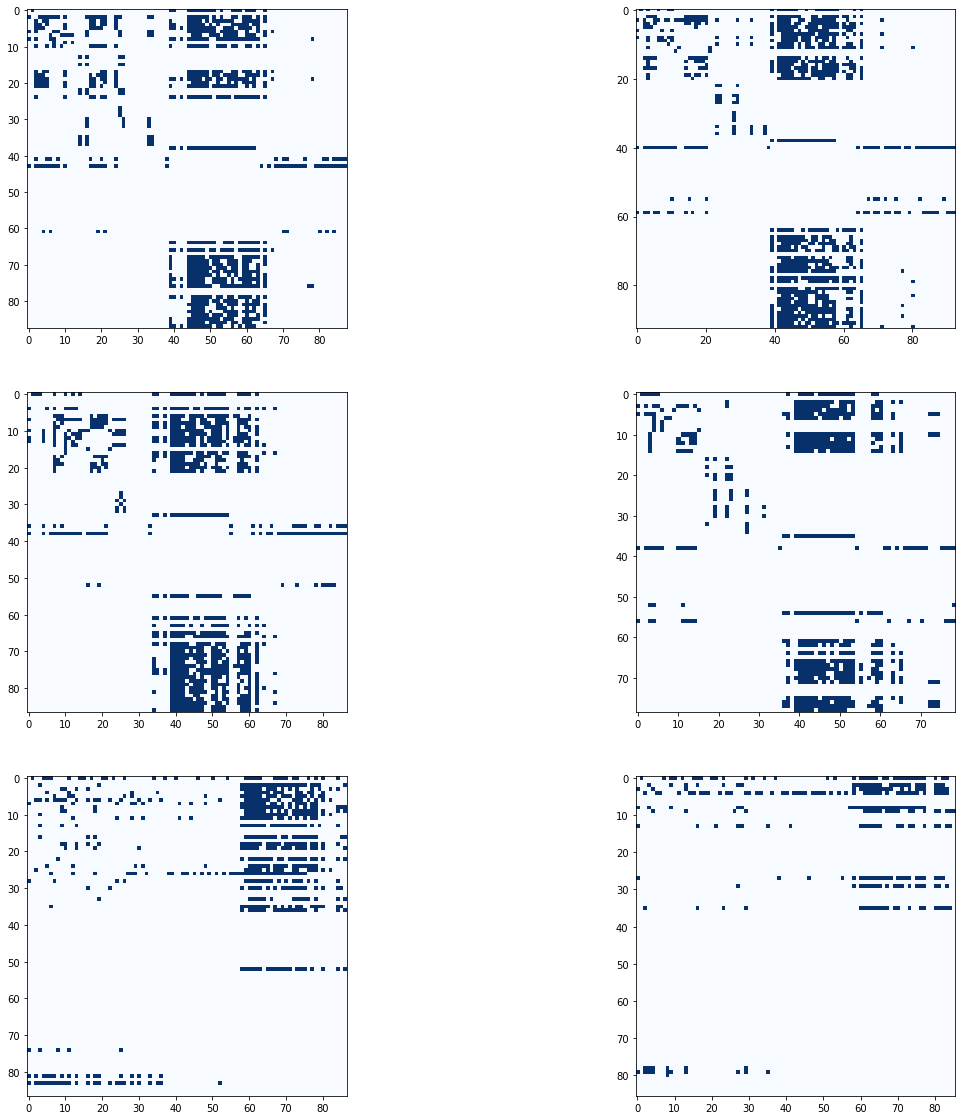

In [ ]:
# nx.to_numpy_matrix(graph1G)
import matplotlib.cm as cm

# Make an array with ones in the shape of an 'X'

fig = plt.figure(figsize=(20, 20)) 

a = nx.to_numpy_matrix(templateG)
ax1 = fig.add_subplot(321)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph1G)
ax1 = fig.add_subplot(322)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph2G)
ax1 = fig.add_subplot(323)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph3G)
ax1 = fig.add_subplot(324)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph4G)
ax1 = fig.add_subplot(325)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph5G)
ax1 = fig.add_subplot(326)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)


plt.show()

#### degree

In [ ]:
degreeTemplate = nx.degree(templateG)
degreeGraph1 = nx.degree(graph1G)
degreeGraph2 = nx.degree(graph2G)
degreeGraph3 = nx.degree(graph3G)
degreeGraph4 = nx.degree(graph4G)
degreeGraph5 = nx.degree(graph5G)

In [ ]:
print(dict((y, x) for x, y in degreeTemplate))

{38: 0, 1: 640784, 208: 41, 93: 34, 102: 37, 98: 27, 55: 40, 116: 39, 56: 65, 54: 67, 105: 47, 5: 66, 18: 42, 4: 503218, 7: 76, 13: 644226, 74: 43, 85: 56, 64: 57, 95: 58, 120: 63, 76: 45, 10: 520660, 3: 606730, 9: 71, 6: 72, 24: 580426, 36: 620120, 30: 567195, 33: 503701, 27: 589943, 19: 64, 22: 537281, 28: 523927, 23: 31, 25: 616315, 26: 49, 21: 46, 17: 60, 20: 61, 16: 59, 14: 55}


In [ ]:
print("centrality degreerange for All channel in Template: ",
      min(list(dict((x, y) for x, y in degreeTemplate).values())), 
      max(list(dict((x, y) for x, y in degreeTemplate).values())))

print("centrality degree range for All channel in graph 1: ",
      min(list(dict((x, y) for x, y in degreeGraph1).values())), 
      max(list(dict((x, y) for x, y in degreeGraph1).values())))

print("centrality degree range for All channel in graph 2: ",
      min(list(dict((x, y) for x, y in degreeGraph2).values())), 
      max(list(dict((x, y) for x, y in degreeGraph2).values())))

print("centrality degree range for All channel in graph 3: ",
      min(list(dict((x, y) for x, y in degreeGraph3).values())), 
      max(list(dict((x, y) for x, y in degreeGraph3).values())))

print("centrality degree range for All channel in graph 4: ",
      min(list(dict((x, y) for x, y in degreeGraph4).values())), 
      max(list(dict((x, y) for x, y in degreeGraph4).values())))

print("centrality degree range for All channel in graph 5: ",
      min(list(dict((x, y) for x, y in degreeGraph5).values())), 
      max(list(dict((x, y) for x, y in degreeGraph5).values())))

centrality degreerange for All channel in Template:  1 208
centrality degree range for All channel in graph 1:  1 135
centrality degree range for All channel in graph 2:  1 192
centrality degree range for All channel in graph 3:  1 68
centrality degree range for All channel in graph 4:  1 64
centrality degree range for All channel in graph 5:  1 72


In [ ]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph1], [x for x, y in degreeGraph1])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph2], [x for x, y in degreeGraph2])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph3], [x for x, y in degreeGraph3])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph4], [x for x, y in degreeGraph4])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph5], [x for x, y in degreeGraph5])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [ ]:

fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph1], [x for x, y in degreeGraph1])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph2], [x for x, y in degreeGraph2])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph3], [x for x, y in degreeGraph3])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph4], [x for x, y in degreeGraph4])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph5], [x for x, y in degreeGraph5])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Ego Network: 
  * represent the network of the node with the largest degree in the network 

Name: 
Type: DiGraph
Number of nodes: 20
Number of edges: 19
Average in degree:   0.9500
Average out degree:   0.9500


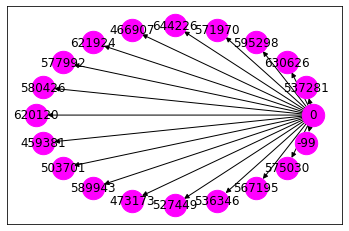

In [ ]:
ego_net = nx.ego_graph(templateG, n=0)
print(nx.info(ego_net))
fig = plt.Figure(figsize=(30,30))
pos=nx.shell_layout(ego_net)

nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')

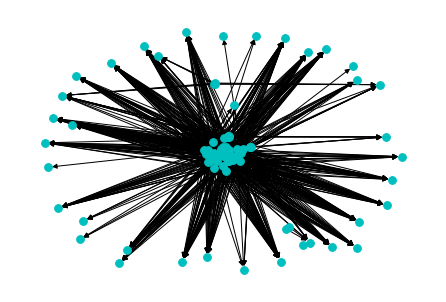

number of nodes:  88
number of edges:  859


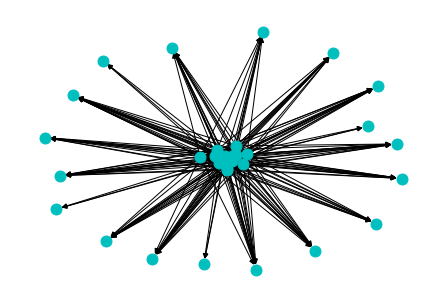

In [ ]:
fig = plt.Figure(figsize=(30,30))
# Copy a graph model
G = templateG
# Let's draw the graph
pos= nx.spring_layout(G)
nx.draw(G, pos, node_color='c', node_size=60 ,with_labels=False)
plt.show()
# find node with largest degree
node_degree = G.degree()
# calculate number of nodes
print("number of nodes: ", G.order())
# calculate number of edges
print("number of edges: ", G.size())
# find node with the largest degree
node_degree= G.degree()
series = pd.Series(dict(node_degree))
largest_deg = series.idxmax()
degree = series.max()
# Create ego graph of node with the largest degree
node_ego= nx.ego_graph(G,largest_deg)
# Draw ego graph
pos= nx.spring_layout(node_ego)
nx.draw(node_ego, pos, node_color='c', node_size=120, with_labels=False)
plt.show()

In [ ]:
#TODO
#Add the Ego Network with two hops

#### 

In [ ]:
max([y for x, y in node_degree])

47

In [ ]:
series = pd.Series(dict(node_degree))
series.idxmax()
series.max()

47

In [ ]:
node_degree

DiDegreeView({0: 23, -99: 1, 41: 47, 34: 34, 37: 35, 27: 38, 40: 31, 39: 29, 65: 30, 67: 5, 47: 37, 66: 1, 657187: 2, 78: 4, 81: 7, 80: 4, 70: 13, 43: 36, 56: 36, 57: 35, 58: 34, 63: 37, 77: 4, 79: 4, 45: 40, 69: 10, 76: 7, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 9, 72: 6, 87: 4, 85: 4, 86: 4, 2: 24, 630626: 24, 536346: 13, 510031: 18, 520660: 10, 552988: 36, 567195: 30, 527449: 36, 459381: 36, 595298: 36, 466907: 33, 589943: 27, 577992: 19, 537281: 22, 523927: 28, 580426: 24, 595581: 23, 642329: 25, 503701: 33, 571970: 25, 644226: 13, 632961: 26, 473173: 36, 620120: 36, 621924: 23, 616315: 25, 29: 21, 575030: 26, 31: 23, 503218: 4, 33: 21, 35: 17, 36: 20, 38: 19, 42: 18, 44: 17, 46: 21, 48: 17, 49: 26, 640784: 1, 606730: 3, 52: 20, 53: 16, 54: 19, 55: 14, 59: 16, 60: 17, 61: 20, 62: 19, 64: 19})

#### Centrality Degree

In [ ]:
degree_centralityTemplate = nx.degree_centrality(templateG)
degree_centralityGraph1 = nx.degree_centrality(graph1G)
degree_centralityGraph2 = nx.degree_centrality(graph2G)
degree_centralityGraph3 = nx.degree_centrality(graph3G)
degree_centralityGraph4 = nx.degree_centrality(graph4G)
degree_centralityGraph5 = nx.degree_centrality(graph5G)

In [ ]:
print(degree_centralityGraph5)

{619322: 0.8470588235294118, 590442: 0.011764705882352941, 594308: 0.5882352941176471, 549840: 0.32941176470588235, 524153: 0.6235294117647059, 629769: 0.011764705882352941, 461577: 0.011764705882352941, 547205: 0.011764705882352941, 483784: 0.5764705882352941, 631903: 0.32941176470588235, 549891: 0.047058823529411764, 632485: 0.011764705882352941, 657173: 0.11764705882352941, 477657: 0.6235294117647059, 620947: 0.011764705882352941, 492039: 0.023529411764705882, 616453: 0.3529411764705882, 483999: 0.023529411764705882, 644754: 0.011764705882352941, 525263: 0.011764705882352941, 532852: 0.011764705882352941, 625756: 0.11764705882352941, 517649: 0.011764705882352941, 509607: 0.29411764705882354, 587437: 0.011764705882352941, 623736: 0.011764705882352941, 493358: 0.03529411764705882, 561819: 0.38823529411764707, 561157: 0.3529411764705882, 530990: 0.32941176470588235, 643087: 0.011764705882352941, 569044: 0.011764705882352941, 556592: 0.011764705882352941, 585589: 0.011764705882352941, 5

In [ ]:
print("centrality degree range for All channel in Template: ",
      min(list(degree_centralityTemplate.values())), 
      max(list(degree_centralityTemplate.values())))

print("centrality degree range for All channel in graph 1: ",
      min(list(degree_centralityGraph1.values())), 
      max(list(degree_centralityGraph1.values())))

print("centrality degree range for All channel in graph 2: ",
      min(list(degree_centralityGraph2.values())), 
      max(list(degree_centralityGraph2.values())))

print("centrality degree range for All channel in graph 3: ",
      min(list(degree_centralityGraph3.values())), 
      max(list(degree_centralityGraph3.values())))

print("centrality degree range for All channel in graph 4: ",
      min(list(degree_centralityGraph4.values())), 
      max(list(degree_centralityGraph4.values())))

print("centrality degree range for All channel in graph 5: ",
      min(list(degree_centralityGraph5.values())), 
      max(list(degree_centralityGraph5.values())))

centrality degree range for All channel in Template:  0.3125 11.6875
centrality degree range for All channel in graph 1:  0.2631578947368421 6.052631578947368
centrality degree range for All channel in graph 2:  0.8823529411764706 10.058823529411764
centrality degree range for All channel in graph 3:  0.6923076923076923 3.384615384615385
centrality degree range for All channel in graph 4:  0.02631578947368421 0.5263157894736842
centrality degree range for All channel in graph 5:  0.3333333333333333 0.8888888888888888


In [ ]:
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate], [x for x, y in degree_centralityTemplate])))
#[y for x, y in degree_centralityTemplate.items()]
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))

In [ ]:
fig = make_subplots(rows=3, cols=2)

numberOfBins = 6
# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph1.items()], [x for x, y in degree_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph2.items()], [x for x, y in degree_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph3.items()], [x for x, y in degree_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph4.items()], [x for x, y in degree_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph5.items()], [x for x, y in degree_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=numberOfBins)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [ ]:

fig = go.Figure()

numberOfBins = 6

df = pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph1.items()], [x for x, y in degree_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph2.items()], [x for x, y in degree_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph3.items()], [x for x, y in degree_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph4.items()], [x for x, y in degree_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph5.items()], [x for x, y in degree_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Closeness Centrality

In [ ]:
closeness_centralityTemplate = nx.closeness_centrality(templateG)
closeness_centralityGraph1 = nx.closeness_centrality(graph1G)
closeness_centralityGraph2 = nx.closeness_centrality(graph2G)
closeness_centralityGraph3 = nx.closeness_centrality(graph3G)
closeness_centralityGraph4 = nx.closeness_centrality(graph4G)
closeness_centralityGraph5 = nx.closeness_centrality(graph5G)

In [ ]:
print(closeness_centralityGraph5)
sum(list(closeness_centralityTemplate.values()))

{619322: 0.08067226890756302, 590442: 0.05847750865051903, 594308: 0.05841784989858012, 549840: 0.06776470588235294, 524153: 0.06515837104072399, 629769: 0.050980392156862744, 461577: 0.050980392156862744, 547205: 0.05847750865051903, 483784: 0.08067226890756302, 631903: 0.08067226890756302, 549891: 0.05847750865051903, 632485: 0.050980392156862744, 657173: 0.05847750865051903, 477657: 0.07365728900255754, 620947: 0.050980392156862744, 492039: 0.06855983772819474, 616453: 0.08284313725490196, 483999: 0.06855983772819474, 644754: 0.050980392156862744, 525263: 0.050980392156862744, 532852: 0.05847750865051903, 625756: 0.07100840336134455, 517649: 0.050980392156862744, 509607: 0.07647058823529412, 587437: 0.050980392156862744, 623736: 0.050980392156862744, 493358: 0.05847750865051903, 561819: 0.08916408668730649, 561157: 0.07647058823529412, 530990: 0.08916408668730649, 643087: 0.050980392156862744, 569044: 0.05847750865051903, 556592: 0.050980392156862744, 585589: 0.050980392156862744, 5

13.462339002338013

In [ ]:
print("centrality closeness range for All channel in Template: ",
      min(list(closeness_centralityTemplate.values())), 
      max(list(closeness_centralityTemplate.values())))

print("centrality closeness range for All channel in graph 1: ",
      min(list(closeness_centralityGraph1.values())), 
      max(list(closeness_centralityGraph1.values())))

print("centrality closeness range for All channel in graph 2: ",
      min(list(closeness_centralityGraph2.values())), 
      max(list(closeness_centralityGraph2.values())))

print("centrality closeness range for All channel in graph 3: ",
      min(list(closeness_centralityGraph3.values())), 
      max(list(closeness_centralityGraph3.values())))

print("centrality closeness range for All channel in graph 4: ",
      min(list(closeness_centralityGraph4.values())), 
      max(list(closeness_centralityGraph4.values())))

print("centrality closeness range for All channel in graph 5: ",
      min(list(closeness_centralityGraph5.values())), 
      max(list(closeness_centralityGraph5.values())))

centrality closeness range for All channel in Template:  0.0 0.4179728317659352
centrality closeness range for All channel in graph 1:  0.0 0.4816053511705686
centrality closeness range for All channel in graph 2:  0.0 0.49209302325581394
centrality closeness range for All channel in graph 3:  0.0 0.34547908232118757
centrality closeness range for All channel in graph 4:  0.0 0.2940735183795949
centrality closeness range for All channel in graph 5:  0.0 0.12426470588235294


In [ ]:
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate], [x for x, y in degree_centralityTemplate])))
#[y for x, y in degree_centralityTemplate.items()]
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))

In [ ]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in closeness_centralityTemplate.items()], [x for x, y in closeness_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph1.items()], [x for x, y in closeness_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph2.items()], [x for x, y in closeness_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph3.items()], [x for x, y in closeness_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph4.items()], [x for x, y in closeness_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph5.items()], [x for x, y in closeness_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [ ]:

fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityTemplate.items()], [x for x, y in closeness_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph1.items()], [x for x, y in closeness_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph2.items()], [x for x, y in closeness_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph3.items()], [x for x, y in closeness_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph4.items()], [x for x, y in closeness_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph5.items()], [x for x, y in closeness_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Betweenness Centrality

In [ ]:
betweenness_centralityTemplate = nx.betweenness_centrality(templateG, normalized=False)
betweenness_centralityGraph1 = nx.betweenness_centrality(graph1G, normalized=False)
betweenness_centralityGraph2 = nx.betweenness_centrality(graph2G, normalized=False)
betweenness_centralityGraph3 = nx.betweenness_centrality(graph3G, normalized=False)
betweenness_centralityGraph4 = nx.betweenness_centrality(graph4G, normalized=False)
betweenness_centralityGraph5 = nx.betweenness_centrality(graph5G, normalized=False)

In [ ]:
print(betweenness_centralityGraph5)

{619322: 0.034644802365390595, 590442: 0.0, 594308: 0.012670234760570895, 549840: 0.012859254813036323, 524153: 0.047526844070961714, 629769: 0.0, 461577: 0.0, 547205: 0.0, 483784: 0.020662209328175713, 631903: 0.029154328398025873, 549891: 0.0, 632485: 0.0, 657173: 0.0, 477657: 0.010570061357876484, 620947: 0.0, 492039: 0.0, 616453: 0.0, 483999: 0.0, 644754: 0.0, 525263: 0.0, 532852: 0.0, 625756: 0.0, 517649: 0.0, 509607: 0.0, 587437: 0.0, 623736: 0.0, 493358: 0.0, 561819: 0.0128921568627451, 561157: 0.0, 530990: 0.004027611044417767, 643087: 0.0, 569044: 0.0, 556592: 0.0, 585589: 0.0, 579218: 0.0, 573137: 0.0011779711884753901, 567281: 0.0, 624532: 0.0, 499177: 0.0, 605235: 0.0, 641131: 0.0, 499467: 0.0, 654641: 0.0, 620076: 0.0, 652996: 0.0, 558930: 0.0, 469675: 0.0, 657035: 0.0, 590595: 0.0, 529694: 0.0, 528019: 0.0, 472749: 0.0, 550251: 0.0, 619245: 0.0, 584229: 0.0, 544444: 0.0, 555931: 0.0, 503218: 0.0, 536346: 0.0, 520660: 0.0, 567195: 0.0, 527449: 0.0, 459381: 0.0, 595298: 0.0

In [ ]:
print("centrality betweenness range for All channel in Template: ",
      min(list(betweenness_centralityTemplate.values())), 
      max(list(betweenness_centralityTemplate.values())))

print("centrality betweenness range for All channel in graph 1: ",
      min(list(betweenness_centralityGraph1.values())), 
      max(list(betweenness_centralityGraph1.values())))

print("centrality betweenness range for All channel in graph 2: ",
      min(list(betweenness_centralityGraph2.values())), 
      max(list(betweenness_centralityGraph2.values())))

print("centrality betweenness range for All channel in graph 3: ",
      min(list(betweenness_centralityGraph3.values())), 
      max(list(betweenness_centralityGraph3.values())))

print("centrality betweenness range for All channel in graph 4: ",
      min(list(betweenness_centralityGraph4.values())), 
      max(list(betweenness_centralityGraph4.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(betweenness_centralityGraph5.values())), 
      max(list(betweenness_centralityGraph5.values())))

centrality betweenness range for All channel in Template:  0.0 690.9019841269841
centrality betweenness range for All channel in graph 1:  0.0 1021.3388888888888
centrality betweenness range for All channel in graph 2:  0.0 907.0600950906678
centrality betweenness range for All channel in graph 3:  0.0 476.9
centrality betweenness range for All channel in graph 4:  0.0 918.0972312001725
centrality betweenness range for All channel in graph 5:  0.0 339.34166666666664


In [ ]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityTemplate.items()], [x for x, y in betweenness_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph1.items()], [x for x, y in betweenness_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph2.items()], [x for x, y in betweenness_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph3.items()], [x for x, y in betweenness_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph4.items()], [x for x, y in betweenness_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph5.items()], [x for x, y in betweenness_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [ ]:
fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityTemplate.items()], [x for x, y in betweenness_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph1.items()], [x for x, y in betweenness_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph2.items()], [x for x, y in betweenness_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph3.items()], [x for x, y in betweenness_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph4.items()], [x for x, y in betweenness_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph5.items()], [x for x, y in betweenness_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75, nbinsx=12)
fig.show()


#### Density

In [ ]:
print(nx.density(templateG))
print(nx.density(graph1G))
print(nx.density(graph2G))
print(nx.density(graph3G))
print(nx.density(graph4G))
print(nx.density(graph5G))

2.0698529411764706
0.8368421052631579
1.4215686274509804
0.8791208791208791
0.07152496626180836
0.34444444444444444


In [ ]:
print(nx.average_shortest_path_length(templateG))
print(nx.average_shortest_path_length(graph1G))
print(nx.average_shortest_path_length(graph2G))
print(nx.average_shortest_path_length(graph3G))
print(nx.average_shortest_path_length(graph4G))
print(nx.average_shortest_path_length(graph5G))

1.411764705882353
1.6552631578947368
1.7026143790849673
1.3131868131868132
0.8407557354925776
1.9333333333333333


In [ ]:
print(min([x for y, x in list(templateG.in_degree())]),
      max([x for y, x in list(templateG.in_degree())]))
print(min([x for y, x in list(graph1G.in_degree())]),
      max([x for y, x in list(graph1G.in_degree())]))
print(min([x for y, x in list(graph2G.in_degree())]),
      max([x for y, x in list(graph2G.in_degree())]))
print(min([x for y, x in list(graph3G.in_degree())]),
      max([x for y, x in list(graph3G.in_degree())]))
print(min([x for y, x in list(graph4G.in_degree())]),
      max([x for y, x in list(graph4G.in_degree())]))
print(min([x for y, x in list(graph5G.in_degree())]),
      max([x for y, x in list(graph5G.in_degree())]))

0 72
0 64
0 96
0 36
0 35
0 30


In [ ]:
print(nx.transitivity(templateG))
print(nx.transitivity(graph1G))
print(nx.transitivity(graph2G))
print(nx.transitivity(graph3G))
print(nx.transitivity(graph4G))
print(nx.transitivity(graph5G))

0.735632183908046
0.43862275449101795
0.6312056737588653
0.5602409638554217
0.09487951807228916
0.20833333333333334


In [ ]:
print(nx.average_clustering(templateG))
print(nx.average_clustering(graph1G))
print(nx.average_clustering(graph2G))
print(nx.average_clustering(graph3G))
print(nx.average_clustering(graph4G))
print(nx.average_clustering(graph5G))

0.09660577088748222
0.07515346862229869
0.10101392769159073
0.08972339314191981
0.09074576781084649
0.10896082228804548


In [ ]:
'''type(degree_centralityGraph1)
print(degree_centralityGraph1.values())
#fig = px.histogram(df, x="total_bill")
#fig.show()
#px.histogram(x=[str(x) for x in degree_centralityGraph1.keys()], y=[int(x) for x in degree_centralityGraph1.keys()] )
#plt.bar([str(x) for x in degree_centralityGraph1.keys()], degree_centralityGraph1.values(), color='g')
fig = go.Figure(
    data=[go.bar(x=[str(x) for x in degree_centralityGraph1.keys()], y=[int(x) for x in degree_centralityGraph1.keys()])],
    layout=go.Layout(
        title=go.layout.Title(text="A Figure Specified By A Graph Object")
    )
)
fig.show()'''

'type(degree_centralityGraph1)\nprint(degree_centralityGraph1.values())\n#fig = px.histogram(df, x="total_bill")\n#fig.show()\n#px.histogram(x=[str(x) for x in degree_centralityGraph1.keys()], y=[int(x) for x in degree_centralityGraph1.keys()] )\n#plt.bar([str(x) for x in degree_centralityGraph1.keys()], degree_centralityGraph1.values(), color=\'g\')\nfig = go.Figure(\n    data=[go.bar(x=[str(x) for x in degree_centralityGraph1.keys()], y=[int(x) for x in degree_centralityGraph1.keys()])],\n    layout=go.Layout(\n        title=go.layout.Title(text="A Figure Specified By A Graph Object")\n    )\n)\nfig.show()'

In [ ]:
degree = nx.degree(graph1G)
'''plt.bar(degree)
plt.title("Degree Values for the Krackhardt Kite Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()
'''
print(degree)

[(599956, 74), (635665, 115), (490041, 55), (589639, 35), (533140, 20), (591682, 6), (568093, 12), (616050, 15), (632150, 16), (464459, 9), (512397, 19), (550287, 12), (559657, 5), (623295, 54), (492777, 59), (570411, 20), (550361, 35), (493044, 24), (596193, 30), (640464, 21)]


## Creating the graphs with Networkx library

### empty graphs

In [ ]:
templateG = nx.MultiDiGraph()
graph1G = nx.MultiDiGraph()
graph2G = nx.MultiDiGraph()
graph3G = nx.MultiDiGraph()
graph4G = nx.MultiDiGraph()
graph5G = nx.MultiDiGraph()

### Values are put into Tupple format to creat the network graph from edges

In [ ]:
# Putting the Source and Target values in tuples for each corresponding graph
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Source"],
                      dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Source"], 
                                                  dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Source"], 
                                                  dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Source"], 
                                                  dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Source"], 
                                                  dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Source"], 
                                                  dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Target"])]

In [ ]:
# Creating graph objects from the tuples
templateG.add_edges_from(templateNodesTuple)
graph1G.add_edges_from(graph1NodesTuple)
graph2G.add_edges_from(graph2NodesTuple)
graph3G.add_edges_from(graph3NodesTuple)
graph4G.add_edges_from(graph4NodesTuple)
graph5G.add_edges_from(graph5NodesTuple)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2]

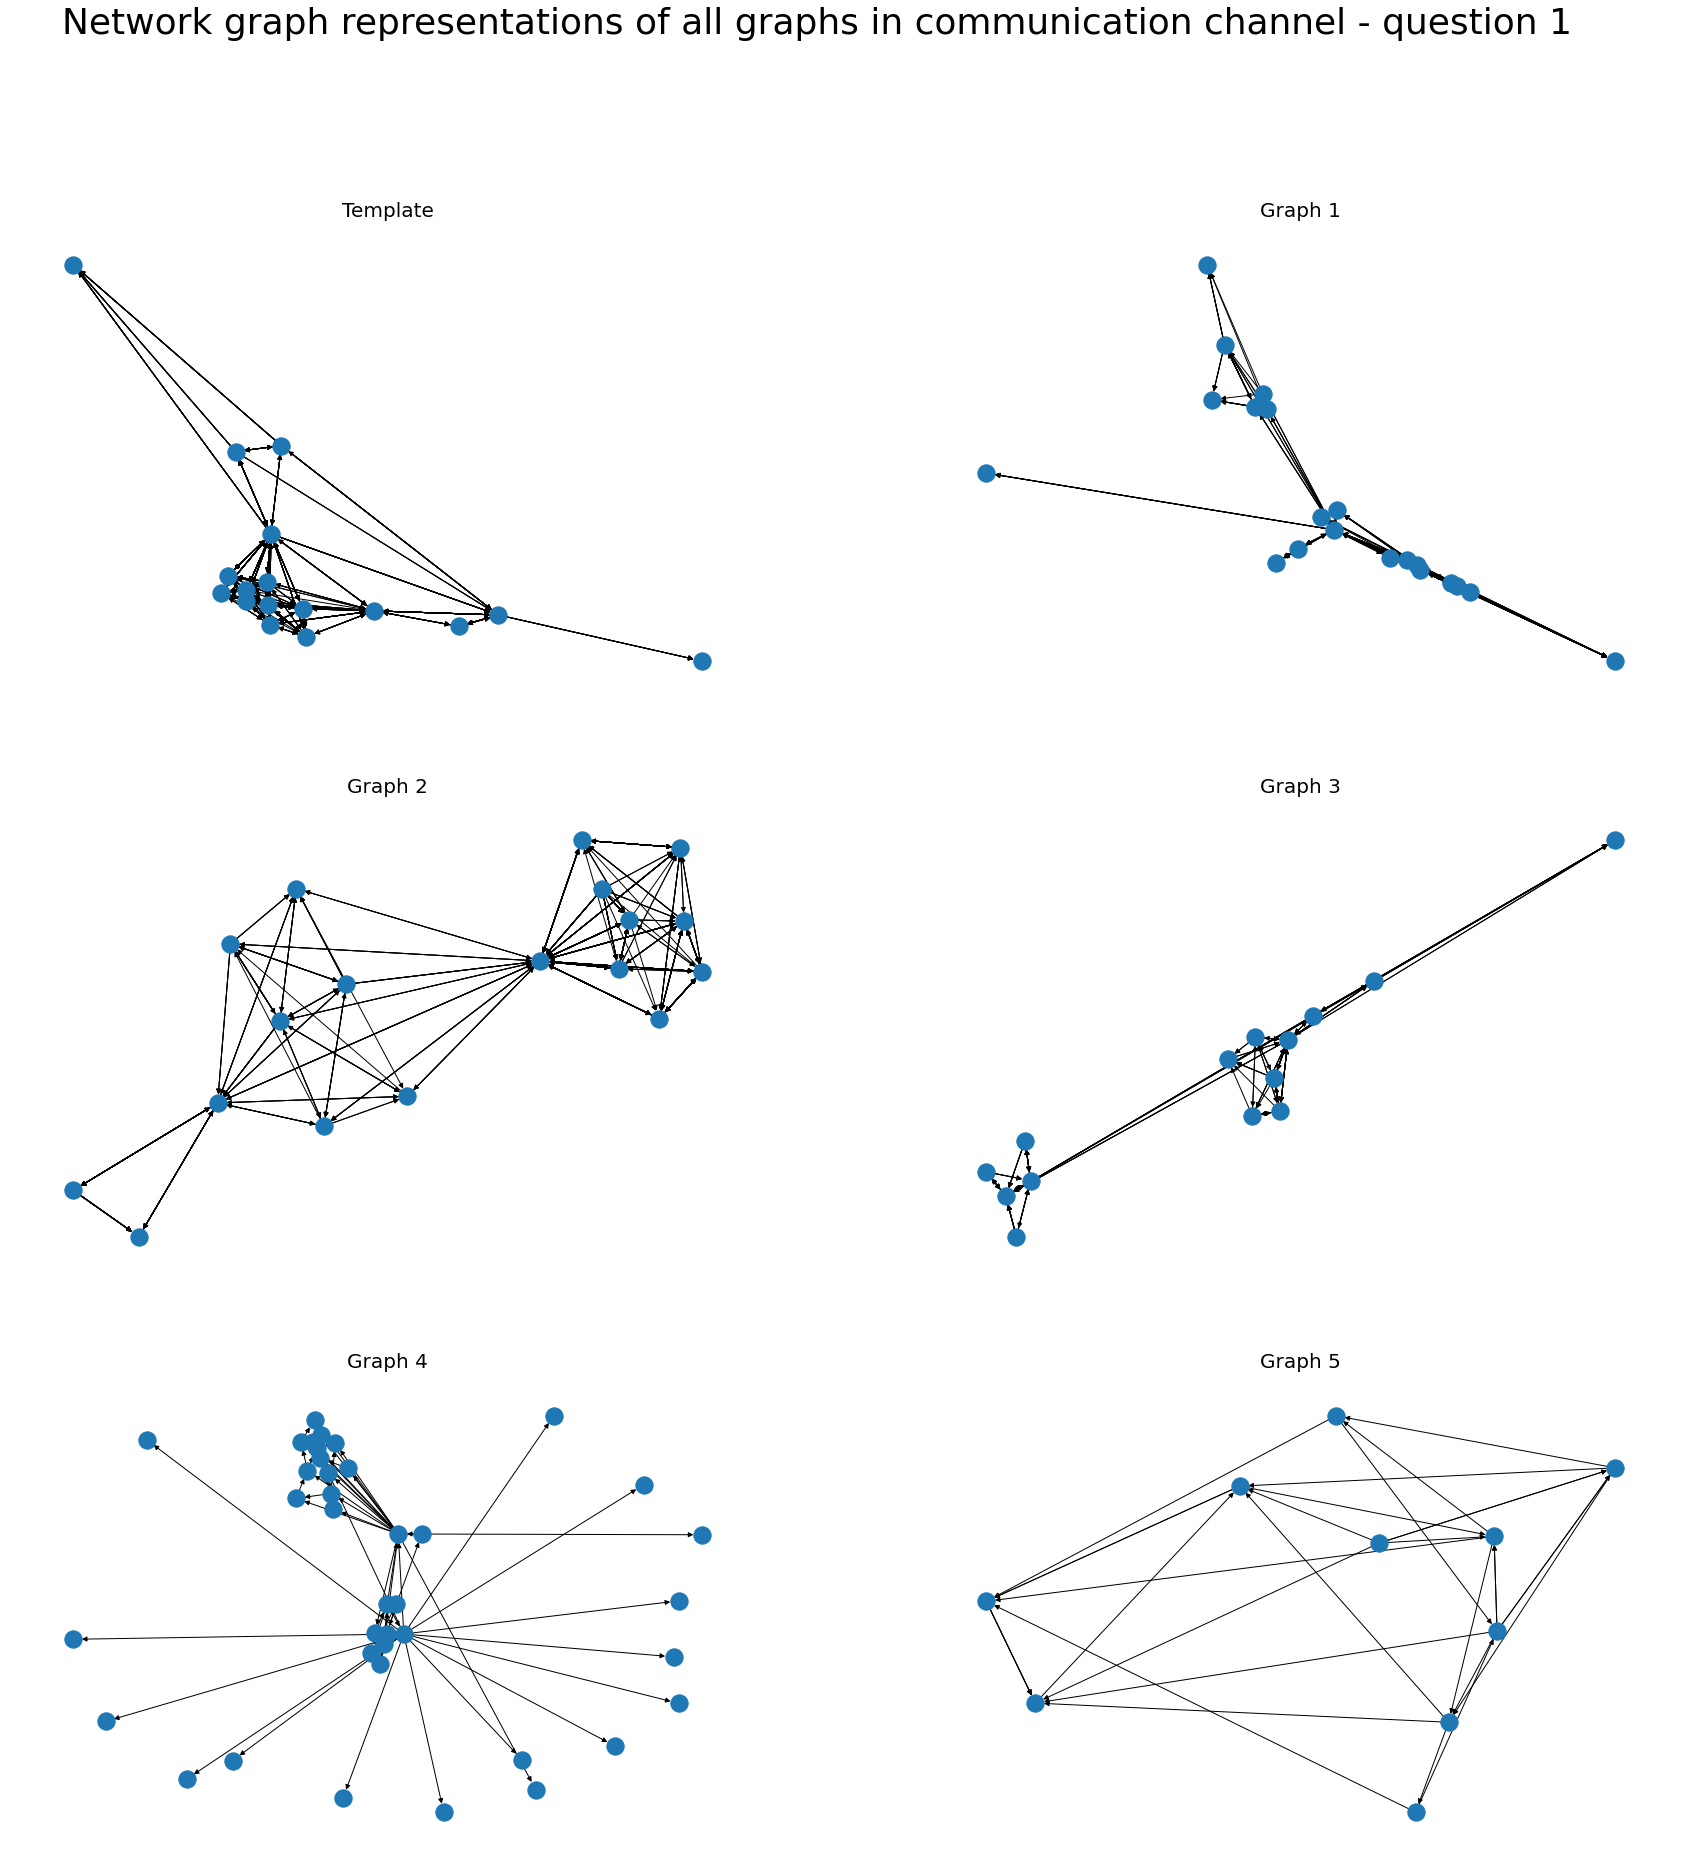

In [ ]:
# Setting the graph size
f = plt.figure(figsize=(30,30))

# adding a title for the whole graph
f.suptitle('Network graph representations of all graphs in communication channel - question 1', fontsize=36)
axs = list()
# Template subplot
axs.append(f.add_subplot(321))
nx.draw(templateG, with_labels=False, font_weight='bold', ax=axs[0])
axs[0].set_title('Template', fontsize = 20)

# Graph 1
axs.append(f.add_subplot(322))
nx.draw(graph1G, with_labels=False, font_weight='bold', ax=axs[1])
axs[1].set_title('Graph 1', fontsize = 20)

# Graph 2
axs.append(f.add_subplot(323))
nx.draw(graph2G, with_labels=False, font_weight='bold', ax=axs[2])
axs[2].set_title('Graph 2', fontsize = 20)

# Graph 3
axs.append(f.add_subplot(324))
nx.draw(graph3G, with_labels=False, font_weight='bold', ax=axs[3])
axs[3].set_title('Graph 3', fontsize = 20)

# Graph 4
axs.append(f.add_subplot(325))
nx.draw(graph4G, with_labels=False, font_weight='bold', ax=axs[4])
axs[4].set_title('Graph 4', fontsize = 20)

# Graph 5
axs.append(f.add_subplot(326))
nx.draw(graph5G, with_labels=False, font_weight='bold', ax=axs[5])
axs[5].set_title('Graph 5', fontsize = 20)


plt.show()

In [ ]:
graph1AdjMat = nx.adj_matrix(graph1G)

In [ ]:
print(graph1AdjMat.todense())

[[0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]


In [ ]:
import networkx as nx
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = plt.figure(figsize=(10, 10)) # in inches
    plt.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    '''
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)'''

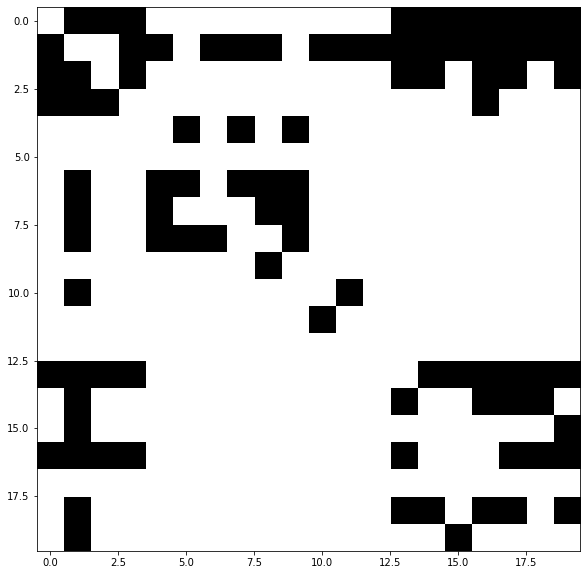

In [ ]:
#from scipy import io

#A = io.mmread("Caltech.mtx")
#G = nx.from_scipy_sparse_matrix(A)
draw_adjacency_matrix(graph1G)
#draw_adjacency_matrix(graph1G2)

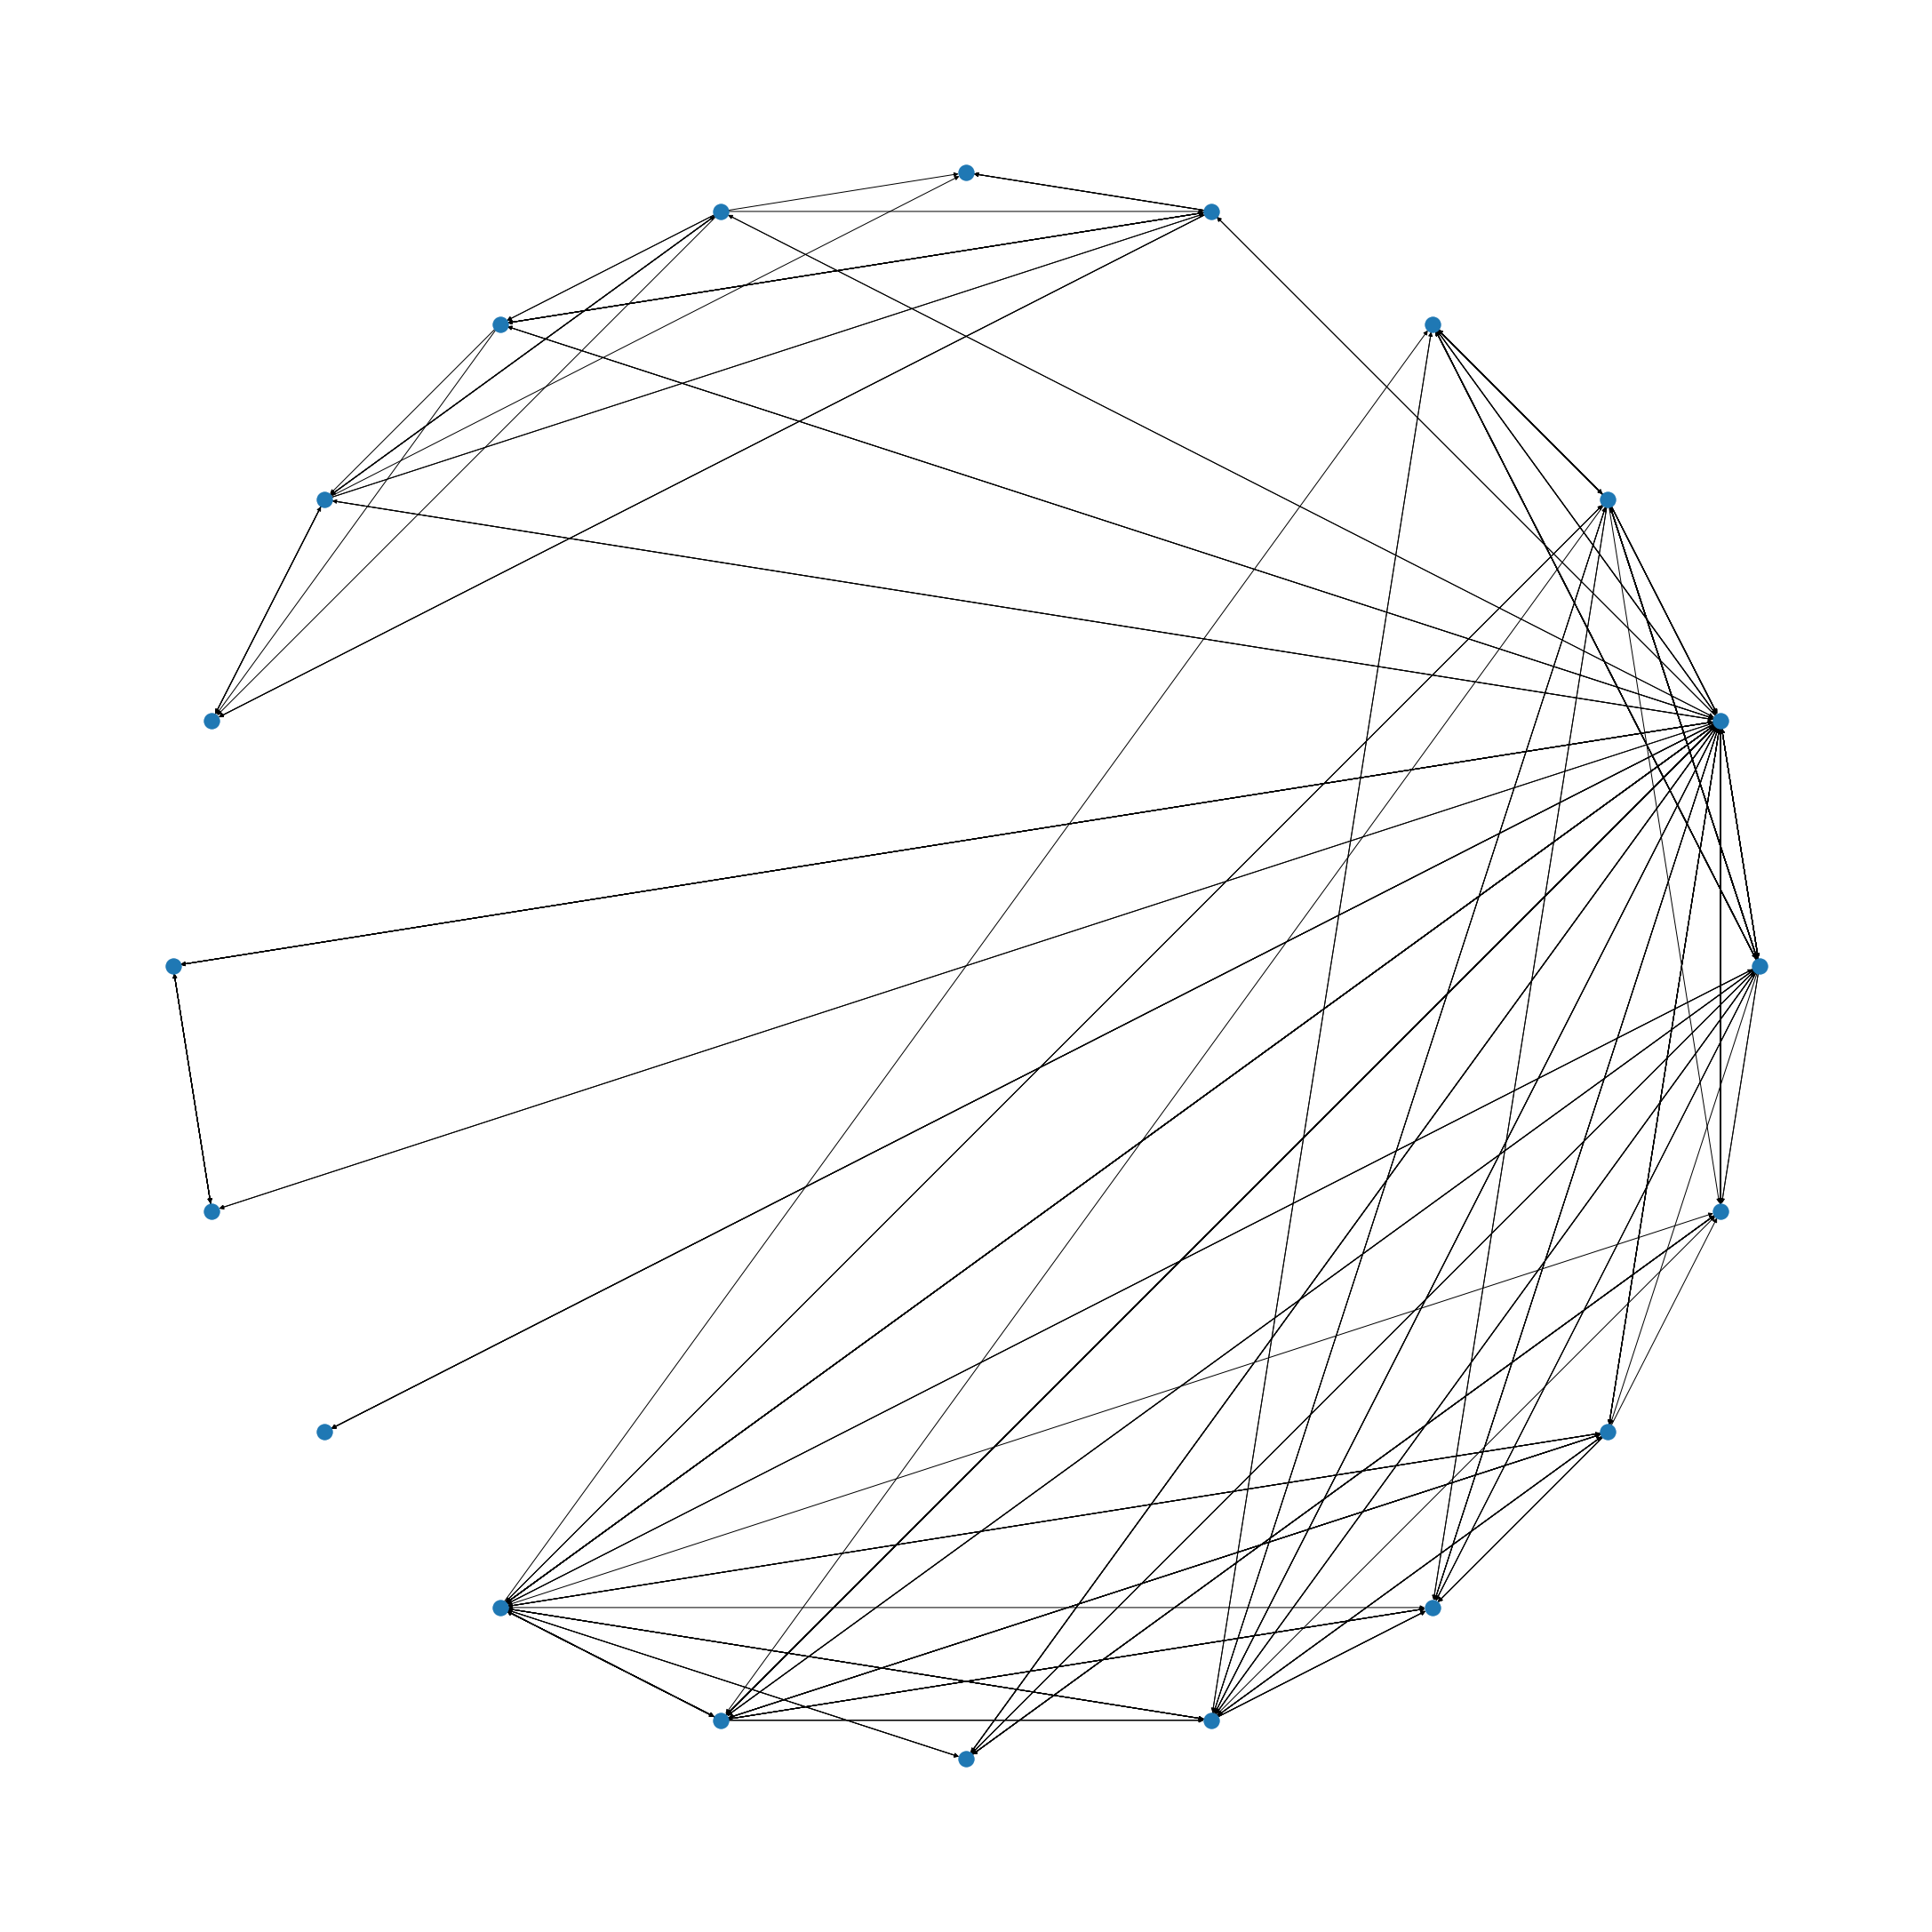

In [ ]:

graph1NodesTuple2 = [tuple([x, y, z]) for x, y, z in zip(dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Source"], 
                                                  dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Target"],
                                                  dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Time"])]
graph1G2 = nx.MultiDiGraph()

graph1G2.add_weighted_edges_from(graph1NodesTuple2, weight="Time")

nx.to_edgelist(graph1G2)


#adjacency_matrix_g1 = nx.to_numpy_matrix(graph1G2, dtype=np.bool, nodelist=None)
#figadj1 = px.density_heatmap(adjacency_matrix_g1)
#%matplotlib inline
#figadj1.show()
#figadj1.write_html("drive/My Drive/images/adjacencyheatmap1.html")
#print(adjacency_matrix_g1)
#figadj1 = plt.figure(figsize=(10, 10))
#plt.imshow(adjacency_matrix_g1, cmap="Greys", interpolation="none")
#plt.show()
figadj1 = plt.figure(figsize=(30, 30))
nx.draw_circular(graph1G2, with_labels=False, font_weight='bold')
plt.show()

In [ ]:
#adjacency_matrix_g1

matrix([[False,  True,  True,  True, False, False, False, False, False,
         False, False, False, False,  True,  True,  True,  True,  True,
          True,  True],
        [ True, False, False,  True,  True, False,  True,  True,  True,
         False,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True],
        [ True,  True, False,  True, False, False, False, False, False,
         False, False, False, False,  True,  True, False,  True,  True,
         False,  True],
        [ True,  True,  True, False, False, False, False, False, False,
         False, False, False, False, False, False, False,  True, False,
         False, False],
        [False, False, False, False, False,  True, False,  True, False,
          True, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, 

In [ ]:
import numpy as np
from collections import defaultdict

def assignmentArray_to_lists(assignment_array):
    by_attribute_value = defaultdict(list)
    for node_index, attribute_value in enumerate(assignment_array):
        by_attribute_value[attribute_value].append(node_index)
    return by_attribute_value.values()

# Load in array which maps node index to dorm number
# Convert this to a list of lists indicating dorm membership
dorm_assignment = np.genfromtxt("caltech_dorms_blanksInferred.txt", dtype="u4")
dorm_lists = assignmentArray_to_lists(dorm_assignment)

# Create a list of all nodes sorted by dorm, and plot
# adjacency matrix with this ordering
nodes_dorm_ordered = [node for dorm in dorm_lists for node in dorm]
draw_adjacency_matrix(G, nodes_dorm_ordered, [dorm_lists],["blue"])

In [ ]:
# px.density_mapbox(graph1AdjMat)
graph1AdjMat

<20x20 sparse matrix of type '<class 'numpy.longlong'>'
	with 126 stored elements in Compressed Sparse Row format>

In [ ]:
def hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5 ):
  def h_recur(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None, parsed = [] ):
    if(root not in parsed):
      parsed.append(root)
    if pos == None:
      pos = {root:(xcenter,vert_loc)}
    else:
      pos[root] = (xcenter, vert_loc)
      neighbors = G.neighbors(root)
    if parent != None:
      neighbors.remove(parent)
      if len(neighbors)!=0:
        dx = width/len(neighbors)
        nextx = xcenter - width/2 - dx/2
    for neighbor in neighbors:
      nextx += dx
      pos = h_recur(G,neighbor, width = dx, vert_gap =
      vert_gap, vert_loc = vert_loc-vert_gap, xcenter=nextx, pos=pos,
      parent = root, parsed = parsed)
    return pos
  return h_recur(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5)

SyntaxError: ignored

In [ ]:
pos = hierarchy_pos(templateG,-99)

NameError: ignored

#### test ordering dataframes based on time

In [ ]:
dfGraph5test = pd.read_csv('drive/My Drive/data/Q1-Graph5.csv')

In [ ]:
print(dfGraph5test[["Source", "Time"]])
dfGraph5test.sort_values(by='Time', ascending=False, na_position='first')
print(dfGraph5test["Time"])

     Source      Time
0    619322     96346
1    594308    105656
2    524153    307922
3    524153    449990
4    619322    634562
..      ...       ...
390  573137  31536000
391  573137  31536000
392  573137  31536000
393  573137  31536000
394  552988  31536000

[395 rows x 2 columns]
0         96346
1        105656
2        307922
3        449990
4        634562
         ...   
390    31536000
391    31536000
392    31536000
393    31536000
394    31536000
Name: Time, Length: 395, dtype: int64


In [ ]:
G = graph1G
#graph1G = nx.Graph()
#nx.G
#G = nx.random_geometric_graph(200, 0.125)
pos = nx.nx_pydot.graphviz_layout(G)
edge_x = []
edge_y = []
for edge in G.edges():
    
    # x0, y0 = G.nodes[edge[0]]['pos']
    # x1, y1 = G.nodes[edge[1]]['pos']
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Blues',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

NameError: ignored

In [ ]:
#G = graph1G
#graph1G = nx.Graph()
#nx.G
#G = nx.random_geometric_graph(200, 0.125)

graph1G2 = nx.MultiDiGraph()

graph1G2.add_weighted_edges_from(graph1NodesTuple2, weight="Time")
pos = nx.spring_layout(graph1G2)
edge_x = []
edge_y = []
G = graph1G2
for edge in G.edges():
    print(G.nodes[edge[0]], end=',')
    # x0, y0 = G.nodes[edge[0]]['pos']
    # x1, y1 = G.nodes[edge[1]]['pos']

(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 492777),(599956, 492777),(599956, 492777),(599956, 492777),(599956, 570411),(599956, 570411),(599956, 570411),(599956, 570411),(599956, 493044),(599956, 493044),(599956, 493044),(599956, 640464),(599956, 640464),(599956, 596193),(599956, 623295),(599956, 623295),(599956, 550361),(599956, 550361),(599956, 550361),(635665, 56809

In [ ]:
G = graph1G
pos = nx.nx_pydot.graphviz_layout(G)
print(nx.info(graph1G))
print(pos)

Name: 
Type: MultiDiGraph
Number of nodes: 20
Number of edges: 318
Average in degree:  15.9000
Average out degree:  15.9000
{599956: (200.07, 227.97), 635665: (162.99, 163.75), 490041: (140.82, 215.72), 589639: (131.21, 261.62), 533140: (182.08, 81.735), 591682: (117.09, 18.0), 568093: (129.72, 91.602), 616050: (212.05, 100.19), 632150: (153.58, 78.649), 464459: (198.84, 21.884), 512397: (75.05, 132.73), 550287: (61.056, 175.1), 559657: (260.61, 144.13), 623295: (194.58, 251.76), 492777: (155.7, 265.01), 570411: (256.58, 210.56), 550361: (174.13, 210.92), 493044: (108.06, 236.31), 596193: (129.98, 195.75), 640464: (217.82, 184.21)}


In [ ]:
pos[464459]

(198.84, 21.884)

In [ ]:
for edge in G.edges():
  print(edge[0], edge[1])

599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 492777
599956 492777
599956 492777
599956 492777
599956 570411
599956 570411
599956 570411
599956 570411
599956 493044
599956 493044
599956 493044
599956 640464
599956 640464
599956 596193
599956 623295
599956 623295
599956 550361
599956 550361
599956 550361
635665 568093
635665 512397
635665 512397
635665 512397
635665 512397
635665 512397
635665 550287
635665 550287
635665 559657
635665 559657
635665 559657
635665 559657
635665 559657
635665

In [ ]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [ ]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
#fig.show()


In [ ]:
fig.write_html("drive/My Drive/images/testGraph1.html")

In [ ]:
drawingTemplate = nx.draw_circular(templateG, with_labels=False, font_weight='bold', ax=axs[0])

# Question 2

In [ ]:
dfSeed1 = pd.read_csv('drive/My Drive/data/Q2-Seed1.csv')
dfSeed2 = pd .read_csv('drive/My Drive/data/Q2-Seed2.csv')
dfSeed3 = pd.read_csv('drive/My Drive/data/Q2-Seed3.csv') 

In [ ]:
dfSeed1

Source  eType  Target  ...  SourceLongitude  TargetLatitude  TargetLongitude
0  600971      4  579269  ...              NaN             NaN              NaN

[1 rows x 11 columns]

In [ ]:
dfSeed2

Source  eType  Target  ...  SourceLongitude  TargetLatitude  TargetLongitude
0  538771      4  473043  ...              NaN             NaN              NaN

[1 rows x 11 columns]

In [ ]:
dfSeed3

Source  eType  Target  ...  SourceLongitude  TargetLatitude  TargetLongitude
0  574136      2  657187  ...              NaN             NaN              NaN

[1 rows x 11 columns]

### Seed 1 Graph

In [ ]:
a = dfSeed1[:]

In [ ]:
int(dfSeed1["Source"])

600971

In [ ]:
dfSeed1[a[["Source", "eType", "Target", "Time", "Weight"]] == dfSeed1[["Source", "eType", "Target", "Time", "Weight"]]]

Source  eType  Target  ...  SourceLongitude  TargetLatitude  TargetLongitude
0  600971      4  579269  ...              NaN             NaN              NaN

[1 rows x 11 columns]

In [ ]:
dfSeed1_Lvl1 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed1["Source"])) & (dfBigGraph['Target'] == int(dfSeed1["Target"]))]  

In [ ]:
dfSeed1_Lvl1

Source  eType  Target       Time    Weight
251658  600971      4  579269 -685755382  0.166667

In [ ]:
dfSeed1_Lvl2 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed1["Source"])) | (dfBigGraph['Target'] == int(dfSeed1["Target"])) | 
                 (dfBigGraph['Source'] == int(dfSeed1["Target"])) | (dfBigGraph['Target'] == int(dfSeed1["Source"]))]  

In [ ]:
dfSeed1_Lvl2 = dfSeed1_Lvl2[["Source", "eType", "Target", "Time", "Weight"]]

In [ ]:
dfSeed1_Lvl2[dfSeed1_Lvl2["Source"] == 600971 &]

Source  eType  Target       Time    Weight
151203     600971      4  463021 -508376182  0.250000
251560     600971      4  607498 -541121782  0.333333
251616     600971      4  530665 -656897782  0.250000
251656     470085      4  579269 -660038400  0.166667
251657     484189      4  579269 -660038400  0.166667
...           ...    ...     ...        ...       ...
123747197  600971      6  499467   23587200  0.000000
123747198  600971      6  657173   15465600  5.000000
123747199  600971      6  509607    1641600 -1.000000
123747200  600971      6  616453   24019200  3.000000
123747201  600971      6  625756    2505600  5.000000

[3844 rows x 5 columns]

In [ ]:
1641600/(24*3600)

19.0

In [ ]:
dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 6]

Source  eType  Target      Time  Weight
122552070  600971      6  616453  19785600     1.0
122552071  600971      6  657173  25401600     1.0
122552072  600971      6  499467   6307200     1.0
122552073  600971      6  657173  26006400     0.0
122552074  600971      6  499467  23587200     0.0
122552075  600971      6  657173  15465600     5.0
122552076  600971      6  509607   1641600    -1.0
122552077  600971      6  616453  24019200     3.0
122552078  600971      6  625756   2505600     5.0
122850724  600971      6  616453  19785600     1.0
122850725  600971      6  657173  25401600     1.0
122850726  600971      6  499467   6307200     1.0
122850727  600971      6  657173  26006400     0.0
122850728  600971      6  499467  23587200     0.0
122850729  600971      6  657173  15465600     5.0
122850730  600971      6  509607   1641600    -1.0
122850731  600971      6  616453  24019200     3.0
122850732  600971      6  625756   2505600     5.0
123149704  600971      6  616453  19785600     1.0
123149705  600971      6  657173  25401600     1.0
123149706  600971      6  499467   6307200     1.0
123149707  600971      6  657173  26006400     0.0
123149708  600971      6  499467  23587200     0.0
123149709  600971      6  657173  15465600     5.0
123149710  600971      6  509607   1641600    -1.0
123149711  600971      6  616453  24019200     3.0
123149712  600971      6  625756   2505600     5.0
123448382  600971      6  616453  19785600     1.0
123448383  600971      6  657173  25401600     1.0
123448384  600971      6  499467   6307200     1.0
123448385  600971      6  657173  26006400     0.0
123448386  600971      6  499467  23587200     0.0
123448387  600971      6  657173  15465600     5.0
123448388  600971      6  509607   1641600    -1.0
123448389  600971      6  616453  24019200     3.0
123448390  600971      6  625756   2505600     5.0
123747193  600971      6  616453  19785600     1.0
123747194  600971      6  657173  25401600     1.0
123747195  600971      6  499467   6307200     1.0
123747196  600971      6  657173  26006400     0.0
123747197  600971      6  499467  23587200     0.0
123747198  600971      6  657173  15465600     5.0
123747199  600971      6  509607   1641600    -1.0
123747200  600971      6  616453  24019200     3.0
123747201  600971      6  625756   2505600     5.0

In [ ]:

#df3 = dfBigGraph[[(dfBigGraph['Source'] == x) & (dfBigGraph['Target'] == y) | 
#                 (dfBigGraph['Source'] == y) & (dfBigGraph['Target'] == x) for x, y in zip(df2["Source"], df2["Target"])]]

In [ ]:
fig = px.scatter(dfSeed1_Lvl2, x="Source", y="Target", color="eType",
                 size='eType', hover_data=['Time'])
fig.show()

In [ ]:
float(dfSeed1["Weight"])* 6 

1.000002

In [ ]:
Seed1_Lvl2G = nx.DiGraph()

In [ ]:
Seed1_Lvl2Tuple = [tuple([x, y]) for x, y in zip(dfSeed1_Lvl2["Source"], dfSeed1_Lvl2["Target"])]

In [ ]:
Seed1_Lvl2G.add_edges_from(Seed1_Lvl2Tuple)

In [ ]:
fig = plt.figure(figsize=(30,30))
nx.draw_circular(Seed1_Lvl2G)
#pos=nx.shell_layout(ego_net)

#nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')
plt.show()

In [ ]:
%matplotlib inline

In [ ]:
degree_centralitySeed1_Lvl2 = nx.degree_centrality(Seed1_Lvl2G)

In [ ]:
# degree_centralitySeed1_Lvl2 = nx.eigenvector_centrality(Seed1_Lvl2G)


In [ ]:
eigenvector_Seed1_Lvl2 = nx.eigenvector_centrality(Seed1_Lvl2G)

In [ ]:
eigenvector_Seed1_Lvl2[600971]

0.13782674940555453

In [ ]:
len({k: v for k, v in eigenvector_Seed1_Lvl2.items() if v >= st.mean(eigenvector_Seed1_Lvl2.values())})

2124

In [ ]:
print("centrality degree range for Level 2 of Seed 1: ",
      min(list(degree_centralitySeed1_Lvl2.values())), 
      max(list(degree_centralitySeed1_Lvl2.values())))

centrality degree range for Level 2 of Seed 1:  0.0002789400278940028 1.010320781032078


In [ ]:
import statistics as st

In [ ]:
st.mean(list(degree_centralitySeed1_Lvl2.values()))

0.000564258494797294

In [ ]:
type(degree_centralitySeed1_Lvl2)

dict

In [ ]:
print(len({k: v for k, v in degree_centralitySeed1_Lvl2.items() if v > min(degree_centralitySeed1_Lvl2.values())}))

44


In [ ]:
dfSeed1_Lvl3 = dfBigGraph[(dfBigGraph['Source'] == 611692) | (dfBigGraph['Target'] == 611692)]  

In [ ]:
dfSeed1_Lvl3

Source  eType  ...  TargetLatitude  TargetLongitude
151206     611692      4  ...             NaN              NaN
151547     611692      4  ...             NaN              NaN
162664     611692      4  ...             NaN              NaN
162670     611692      4  ...             NaN              NaN
162673     611692      4  ...             NaN              NaN
...           ...    ...  ...             ...              ...
120823513  611692      5  ...             NaN              NaN
120823514  611692      5  ...             NaN              NaN
120823515  611692      5  ...             NaN              NaN
120823516  611692      5  ...             NaN              NaN
120823517  611692      5  ...             NaN              NaN

[2498 rows x 11 columns]

In [ ]:
Seed1_Lvl3Tuple = [tuple([x, y]) for x, y in zip(dfSeed1_Lvl3["Source"], dfSeed1_Lvl3["Target"])]

In [ ]:
Seed1_Lvl2G.add_edges_from(Seed1_Lvl3Tuple)

In [ ]:
Seed1_Lvl2G.number_of_nodes()

4441

In [ ]:
degree_centralitySeed1_Lvl3 = nx.degree_centrality(Seed1_Lvl2G)

In [ ]:
print("centrality degree range for Level 2 of Seed 1: ",
      min(list(degree_centralitySeed1_Lvl3.values())), 
      max(list(degree_centralitySeed1_Lvl3.values())),
      " \nThe mean of all values:",
      st.mean(list(degree_centralitySeed1_Lvl3.values())))

centrality degree range for Level 2 of Seed 1:  0.00022522522522522523 0.5416666666666666  
The mean of all values: 0.0004595791468117521


In [ ]:
Seed1_Lvl3Dict = {k: v for k, v in degree_centralitySeed1_Lvl3.items() if v > min(degree_centralitySeed1_Lvl3.values())}

In [ ]:
## testing with the second level
Seed1_Lvl2Dict = {k: v for k, v in degree_centralitySeed1_Lvl2.items() if v > min(degree_centralitySeed1_Lvl2.values())}

In [ ]:
len(Seed1_Lvl2Dict)

44

In [ ]:
size = 0
for k1 in Seed1_Lvl3Dict.keys():
  # print(k, end=", ")
  if(dfBigGraph["Source"] == k1):
    size += 1
  #seed1Graph = 
print(size)

In [ ]:
def checkEdge(bigGraph):
  count = 0
  for pair in tqdm(itertools.product(list(Seed1_Lvl3Dict.keys()), repeat=2)):
    yield count
    count += (len(dfBigGraph[(dfBigGraph['Source'] == pair[0]) & (dfBigGraph['Target'] == pair[1])]))
    

In [ ]:
import itertools
#size = 0
#count = 0
#for pair in itertools.product(list(Seed1_Lvl3Dict.keys()), repeat=2):
    #print(*pair)
count = sum(checkEdge(dfBigGraph))
print(count)

In [ ]:
checkEdge(int(dfSeed1["Source"]), int(dfSeed1["Target"]), dfBigGraph, 0)

1

In [ ]:
pairs = list()
for pair in tqdm(itertools.product(list(Seed1_Lvl2Dict.keys()), repeat=2)):
  pairs.append(pair)

1936it [00:00, 1107195.60it/s]


In [ ]:
pairs

In [ ]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
dfSeed1Graph = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs)-1900)):
  dfSeed1Graph = dfSeed1Graph.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 36/36 [00:15<00:00,  2.31it/s]


In [ ]:
dfSeed1Graph

Source  eType  Target  ...  SourceLongitude  TargetLatitude  TargetLongitude
0   600971      4  579269  ...              NaN             NaN              NaN
1   600971      0  611692  ...              NaN             NaN              NaN
2   600971      0  573678  ...              NaN             NaN              NaN
3   600971      1  564804  ...         -41.5884       -30.84870         -12.8853
4   600971      0  626174  ...              NaN             NaN              NaN
5   600971      1  559941  ...         -41.5884       -24.79180        -110.5110
6   600971      1  542731  ...         -41.5884       -29.52990         -14.3046
7   600971      0  529765  ...              NaN             NaN              NaN
8   600971      1  470784  ...         -41.5884        29.58370         -41.4059
9   600971      1  554368  ...         -41.5884        -1.11593        -162.1040
10  600971      1  554368  ...         -41.5884        -1.11593        -162.1040
11  600971      1  554368  ...         -41.5884        -1.11593        -162.1040
12  600971      1  556329  ...         -41.5884        29.94150         -37.5082
13  600971      1  638591  ...         -41.5884        35.01160         -36.4452
14  600971      0  477333  ...              NaN             NaN              NaN
15  600971      1  547483  ...         -41.5884        30.08180         -40.8486
16  600971      1  630700  ...         -41.5884        40.25530         -37.3624
17  600971      1  584511  ...         -41.5884        28.01930         -40.4917
18  600971      1  527214  ...         -41.5884        25.12510         154.0820
19  600971      1  571938  ...         -41.5884         3.84353        -161.0070
20  600971      0  631490  ...              NaN             NaN              NaN
21  600971      0  533691  ...              NaN             NaN              NaN
22  600971      1  536173  ...         -41.5884        32.18400         -42.8728
23  600971      0  575811  ...              NaN             NaN              NaN
24  600971      0  558444  ...              NaN             NaN              NaN
25  600971      1  616825  ...         -41.5884        20.61980         154.9600
26  600971      1  490882  ...         -41.5884       -23.30220          92.1876
27  600971      1  591024  ...         -41.5884        25.46590         -42.1698
28  600971      1  495487  ...         -41.5884       -32.39140         -16.5490
29  600971      1  493846  ...         -41.5884        24.26050         154.3980
30  600971      1  481408  ...         -41.5884       -24.60310        -110.4110
31  600971      1  594696  ...         -41.5884        34.83630         -42.8385
32  600971      1  462691  ...         -41.5884         3.64592        -161.6930
33  600971      0  631159  ...              NaN             NaN              NaN
34  600971      1  468192  ...         -41.5884       -24.42950        -112.2740
35  600971      0  605385  ...              NaN             NaN              NaN
36  600971      1  621178  ...         -41.5884         4.18986        -161.9990

[37 rows x 11 columns]

In [ ]:
count2 = 0
for i in tqdm(range(len(pairs))):
  count2 = count2 + len(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])])

In [ ]:
# number of edges in seed1 graph
print(count2)

1914


In [ ]:
#dfSeed1Graph = dfBigGraph[dfBigGraph["Source"] == -1000]

In [ ]:
dfSeed1Graph = dfSeed1Graph.append(dfBigGraph[(dfBigGraph['Source'] == int(dfSeed1['Source'])) & (dfBigGraph['Target'] == int(dfSeed1['Target']))], ignore_index=True)

In [ ]:
dfSeed1Graph

Source  eType  Target  ...  SourceLongitude  TargetLatitude  TargetLongitude
0    600971      4  579269  ...              NaN             NaN              NaN
1    600971      0  611692  ...              NaN             NaN              NaN
2    600971      0  573678  ...              NaN             NaN              NaN
3    600971      1  564804  ...         -41.5884        -30.8487         -12.8853
4    600971      0  626174  ...              NaN             NaN              NaN
..      ...    ...     ...  ...              ...             ...              ...
493  583737      1  605385  ...         -40.1524        -19.7156          89.9960
494  583737      1  605385  ...         -40.1524        -19.7156          89.9960
495  583737      0  506539  ...              NaN             NaN              NaN
496  583737      1  506539  ...         -40.1524        -21.5812          88.2038
497  583737      1  506539  ...         -40.1524        -21.5812          88.2038

[498 rows x 11 columns]

In [ ]:
pairs[50][1]
print(len(pairs))

8281


In [ ]:

count = checkEdge(*pair, dfBigGraph, count)

In [ ]:
count

8579427

In [ ]:
def firstn(n):
  num = 0
  while num < n:
    yield num
    num += 1

sum_of_first_n = sum(firstn(1000000))
print(sum_of_first_n)

499999500000


In [ ]:
Seed1G = nx.DiGraph()

In [ ]:
Seed1Tuple = [tuple([x, y]) for x, y in zip(dfSeed1Graph["Source"], dfSeed1Graph["Target"])]

In [ ]:
Seed1G.add_edges_from(Seed1Tuple)

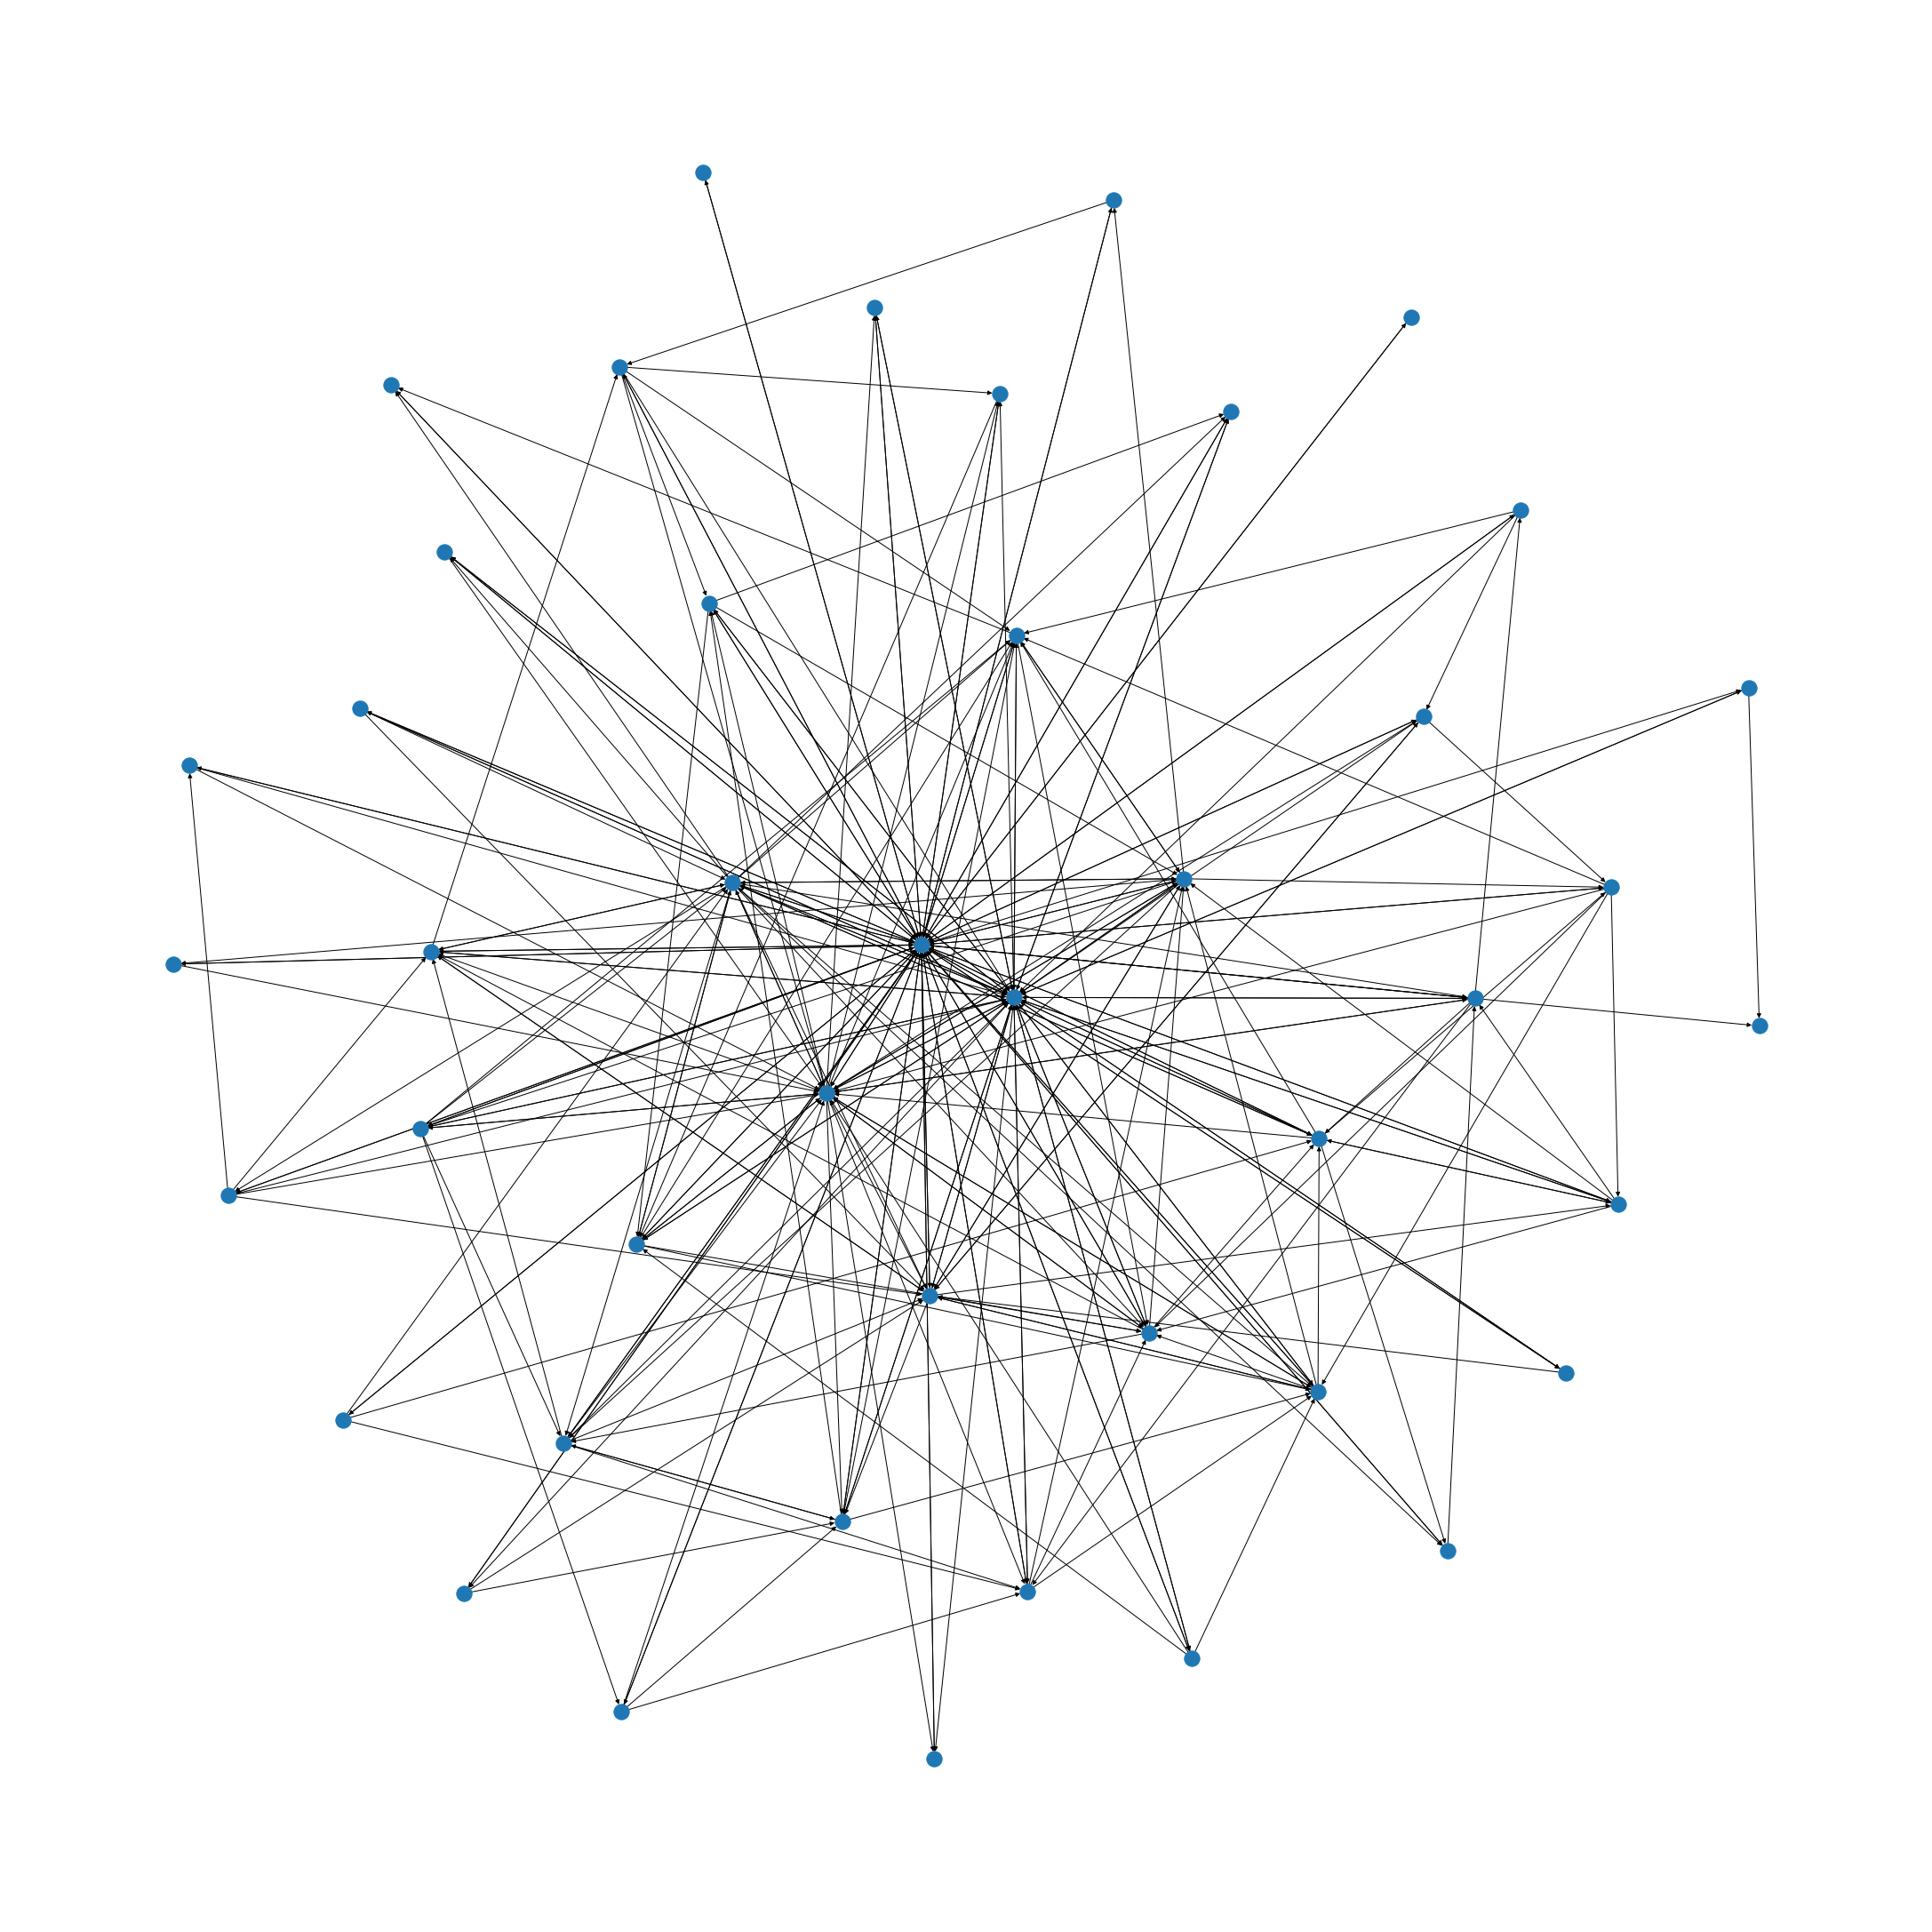

In [ ]:
fig = plt.figure(figsize=(30,30))
nx.draw_kamada_kawai(Seed1G)
#pos=nx.shell_layout(ego_net)

#nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')
plt.show()

In [ ]:
dfSeed1Graph.to_csv("drive/My Drive/data/Seed1-Graph1.csv")

### Seed 2 Graph

In [ ]:
dfSeed2_Lvl1 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed2["Source"])) & (dfBigGraph['Target'] == int(dfSeed2["Target"]))]  

In [ ]:
dfSeed2_Lvl1

Source  eType  Target  ...  SourceLongitude  TargetLatitude  TargetLongitude
4998  538771      4  473043  ...              NaN             NaN              NaN

[1 rows x 11 columns]

In [ ]:
dfSeed2_Lvl2 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed2["Source"])) | (dfBigGraph['Target'] == int(dfSeed2["Target"])) | 
                 (dfBigGraph['Source'] == int(dfSeed2["Target"])) | (dfBigGraph['Target'] == int(dfSeed2["Source"]))]  

In [ ]:
len(dfBigGraph[(dfBigGraph['Target'] == int(dfSeed2["Source"]))])

0

In [ ]:
dfSeed2_Lvl2 = dfSeed2_Lvl2[["Source", "eType", "Target", "Time", "Weight"]]

In [ ]:
dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] != 4]

Empty DataFrame
Columns: [Source, eType, Target, Time, Weight]
Index: []

In [ ]:
print(dfSeed2_Lvl2["Source"].drop_duplicates())

3607    538771
4996    539232
4997    566476
4999    491573
5000    585791
5001    565073
5002    591742
5003    544629
5004    652020
5005    652440
5006    546487
Name: Source, dtype: int64


In [ ]:
dfSeed2_Lvl3 = dfBigGraph[dfBigGraph["Source"] == -1000]
for nodeS in tqdm(list(dfSeed2_Lvl2["Source"].drop_duplicates())):
  #print(nodeS)
  dfSeed2_Lvl3 = dfSeed2_Lvl3.append(dfBigGraph[(dfBigGraph['Source'] == int(nodeS)) | (dfBigGraph['Target'] == int(nodeS))])  

100%|██████████| 11/11 [00:04<00:00,  2.48it/s]


In [ ]:
dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 4]

Source  eType  Target  ...  SourceLongitude  TargetLatitude  TargetLongitude
3607   538771      4  462146  ...              NaN             NaN              NaN
3632   538771      4  652563  ...              NaN             NaN              NaN
3674   538771      4  653816  ...              NaN             NaN              NaN
3682   538771      4  521370  ...              NaN             NaN              NaN
3697   538771      4  477902  ...              NaN             NaN              NaN
...       ...    ...     ...  ...              ...             ...              ...
5023   546487      4  565737  ...              NaN             NaN              NaN
5179   546487      4  633234  ...              NaN             NaN              NaN
36101  546487      4  472289  ...              NaN             NaN              NaN
36105  546487      4  642101  ...              NaN             NaN              NaN
81797  546487      4  495059  ...              NaN             NaN              NaN

[635 rows x 11 columns]

In [ ]:
dfSeed2_Lvl3

Source  eType  Target       Time    Weight
3607   538771      4  462146 -323424000  0.062500
3632   538771      4  652563 -591868800  0.090909
3674   538771      4  653816 -242121600  0.062500
3682   538771      4  521370 -400752000  0.055556
3697   538771      4  477902 -258710400  0.100000
...       ...    ...     ...        ...       ...
5023   546487      4  565737 -542707200  0.100000
5179   546487      4  633234 -641808000  0.166667
36101  546487      4  472289 -670665600  0.142857
36105  546487      4  642101 -641808000  0.166667
81797  546487      4  495059 -591868800  0.250000

[2769 rows x 5 columns]

In [ ]:
#finding the people:
dfSeed2_Lvl3_people = list()
if len(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 0]["Source"]) > 0:
  dfSeed2_Lvl3_people = dfSeed2_Lvl3_people + list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 0]["Source"].drop_duplicates())
if len(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 0]["Target"]) > 0:
  dfSeed2_Lvl3_people = dfSeed2_Lvl3_people + list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 0]["Target"].drop_duplicates())
if len(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 1]):
  dfSeed2_Lvl3_people = dfSeed2_Lvl3_people + list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 1]["Source"].drop_duplicates())
  '''  dfSeed2_Lvl3_people.append(list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 1]["Target"].drop_duplicates())[0])
  dfSeed2_Lvl3_people.append(list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 2]["Source"].drop_duplicates())[0])
  dfSeed2_Lvl3_people.append(list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 3]["Source"].drop_duplicates())[0])
  dfSeed2_Lvl3_people.append(list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 4]["Source"].drop_duplicates())[0])
  dfSeed2_Lvl3_people.append(list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 6]["Source"].drop_duplicates())[0])'''



In [ ]:
dfSeed2_Lvl3_people = sorted(list(dict.fromkeys(dfSeed2_Lvl3_people)))

In [ ]:
sum = 0
for i in tqdm(range(100)):
  sum += len(dfBigGraph[(dfBigGraph["Source"] == dfSeed2_Lvl3_people[i]) | (dfBigGraph["Target"] == dfSeed2_Lvl3_people[i])])
print(sum)

100%|██████████| 100/100 [00:41<00:00,  2.39it/s]

490895


In [ ]:
sorted(list(dict.fromkeys([1, 2] + [2, 4, 5, 3])))

[1, 2, 3, 4, 5]

In [ ]:
print(dfSeed2_Lvl2["Target"].drop_duplicates())

In [ ]:
Seed2_Lvl3G = nx.DiGraph()
#nx.MultiDiGraph() 
#DiGraph()

In [ ]:
Seed2_Lvl3Tuple = [tuple([x, y]) for x, y in zip(dfSeed2_Lvl3["Source"], dfSeed2_Lvl3["Target"])]

In [ ]:
Seed2_Lvl3G.add_edges_from(Seed2_Lvl3Tuple)
print()

In [ ]:
dfSeed2_Lvl3["eType"] = dfSeed2_Lvl3["eType"].astype(str)
fig = px.scatter(dfSeed2_Lvl3, x="Source", y="Target", color="eType",
                  hover_data=['Time'])
fig.show()

In [ ]:
fig = plt.figure(figsize=(30,30))
nx.draw_circular(Seed2_Lvl3G)
#pos=nx.shell_layout(ego_net)

#nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')
plt.show()

In [ ]:
degree_centralitySeed2_Lvl3 = nx.degree_centrality(Seed2_Lvl3G)


In [ ]:
#degree_centralitySeed2_Lvl3[652020]
{k: v for k, v in degree_centralitySeed2_Lvl3.items() if v == max(degree_centralitySeed2_Lvl3.values())}

{652020: 1.0071845532105972}

In [ ]:
betweenness_centralitySeed2_Lvl3 = nx.betweenness_centrality(Seed2_Lvl3G)

In [ ]:
print("centrality degree range for Level 2 of Seed 2: ",
      min(list(degree_centralitySeed2_Lvl3.values())), 
      max(list(degree_centralitySeed2_Lvl3.values())))
print(len([x for x in degree_centralitySeed2_Lvl3.values() if x != min(list(degree_centralitySeed2_Lvl3.values()))]))

centrality degree range for Level 2 of Seed 2:  0.000449034575662326 1.0071845532105972
260


In [ ]:
print("centrality degree range for Level 2 of Seed 2: ",
      min(list(betweenness_centralitySeed2_Lvl3.values())), 
      max(list(betweenness_centralitySeed2_Lvl3.values())))
print(len([x for x in betweenness_centralitySeed2_Lvl3.values() if x != min(list(betweenness_centralitySeed2_Lvl3.values()))]))

centrality degree range for Level 2 of Seed 2:  0.0 0.25371139381865376
1


In [ ]:
st.mean(list(degree_centralitySeed2_Lvl3.values()))

0.001059705475239008

In [ ]:
type(degree_centralitySeed2_Lvl2)

dict

In [ ]:
#degree_centralitySeed2_Lvl2
print(dfSeed2["Source"], dfSeed2["Target"])

0    538771
Name: Source, dtype: int64 0    473043
Name: Target, dtype: int64


In [ ]:
print("more than minimum: ", 
      len({k: v for k, v in degree_centralitySeed2_Lvl3.items() if v > min(degree_centralitySeed2_Lvl3.values())}))
print("more than mean: ",
      len({k: v for k, v in degree_centralitySeed2_Lvl3.items() if v > st.mean(list(degree_centralitySeed2_Lvl3.values()))}))

more than minimum:  260
more than mean:  96


In [ ]:
#Seed2_Lvl3Dict = {k: v for k, v in degree_centralitySeed2_Lvl3.items() if v > st.mean(list(degree_centralitySeed2_Lvl3.values()))}
Seed2_Lvl3Dict = {k: v for k, v in degree_centralitySeed2_Lvl3.items() if v > min(list(degree_centralitySeed2_Lvl3.values()))}

In [ ]:
len(Seed2_Lvl3Dict)

260

In [ ]:
pairs = list()
for pair in tqdm(itertools.product(list(Seed2_Lvl3Dict.keys()), repeat=2)):
  pairs.append(pair)

67600it [00:00, 1802006.75it/s]


In [ ]:
count2 = 0
for i in tqdm(range(len(pairs))):
  count2 = count2 + len(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])])

100%|██████████| 8281/8281 [52:12<00:00,  2.64it/s]


In [ ]:
# number of edges in seed1 graph
print(count2)

1914


In [ ]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
dfSeed1Graph = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfSeed1Graph = dfSeed1Graph.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 9216/9216 [1:08:10<00:00,  2.25it/s]


In [ ]:
dfSeed2Graph = dfSeed1Graph

In [ ]:
dfSeed2Graph[dfSeed2Graph["eType"] != 4]

Empty DataFrame
Columns: [Source, eType, Target, Time, Weight, SourceLocation, TargetLocation, SourceLatitude, SourceLongitude, TargetLatitude, TargetLongitude]
Index: []

In [ ]:
pairs[50][1]
print(len(pairs))

8281


In [ ]:
260**2

67600

In [ ]:
(55 * (67600/8281))/60

7.482993197278912

In [ ]:

count = checkEdge(*pair, dfBigGraph, count)

In [ ]:
count

8579427

In [ ]:
def firstn(n):
  num = 0
  while num < n:
    yield num
    num += 1

sum_of_first_n = sum(firstn(1000000))
print(sum_of_first_n)

499999500000


In [ ]:
Seed1G = nx.DiGraph()

In [ ]:
Seed1Tuple = [tuple([x, y]) for x, y in zip(dfSeed1Graph["Source"], dfSeed1Graph["Target"])]

In [ ]:
Seed1G.add_edges_from(Seed1Tuple)

In [ ]:
fig = plt.figure(figsize=(30,30))
nx.draw_kamada_kawai(Seed1G)
#pos=nx.shell_layout(ego_net)

#nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')
plt.show()

In [ ]:
dfSeed2Graph.to_csv("drive/My Drive/data/Seed2-Graph1.csv")

### Seed 3 Graph

In [ ]:
a= dfSeed3[:]

In [ ]:
dfSeed3_Lvl1 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed3["Source"])) & (dfBigGraph['Target'] == int(dfSeed3["Target"]))]  

In [ ]:
dfSeed3_Lvl1

Source  eType  ...  TargetLatitude  TargetLongitude
7068974   574136      2  ...             NaN              NaN
50155815  574136      2  ...             NaN              NaN
52622375  574136      2  ...             NaN              NaN

[3 rows x 11 columns]

In [ ]:
dfSeed3_seller = dfBigGraph[(dfBigGraph['Time'] == int(dfSeed3["Time"])) & (dfBigGraph['Target'] == int(dfSeed3["Target"]))]

In [ ]:
dfSeed3_seller

Source  eType  ...  TargetLatitude  TargetLongitude
7068974  574136      2  ...             NaN              NaN
7068975  620791      3  ...             NaN              NaN

[2 rows x 11 columns]

In [ ]:
dfSeed3_Lvl2 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed3["Source"])) | (dfBigGraph['Target'] == int(dfSeed3["Target"])) | 
                 (dfBigGraph['Source'] == int(dfSeed3["Target"])) | (dfBigGraph['Target'] == int(dfSeed3["Source"]))]  

In [ ]:
dfSeed3_Lvl2 = dfSeed3_Lvl2[["Source", "eType", "Target", "Time", "Weight"]]

In [ ]:
dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] != 13]

Source  eType  Target      Time  Weight
341874     557387      0  574136  29934736     1.0
341875     574136      0  539941  29934736     1.0
378499     635193      1  574136   9210880     1.0
378501     574136      3  617468   9210880     2.0
457164     621729      1  574136  17573550     1.0
...           ...    ...     ...       ...     ...
123368609  574136      6  499467  12096000     4.0
123667417  574136      6  657173   2160000     2.0
123667418  574136      6  561157  13305600     1.0
123667419  574136      6  499467  19008000     1.0
123667420  574136      6  499467  12096000     4.0

[3556 rows x 5 columns]

In [ ]:
#df3 = dfBigGraph[[(dfBigGraph['Source'] == x) & (dfBigGraph['Target'] == y) | 
#                 (dfBigGraph['Source'] == y) & (dfBigGraph['Target'] == x) for x, y in zip(df2["Source"], df2["Target"])]]

In [ ]:
dfSeed3_Lvl2["eType"] = dfSeed3_Lvl2["eType"].astype(str)
fig = px.scatter(dfSeed3_Lvl2, x="Source", y="Target", color="eType",
                 size='Time', hover_data=['Time'])
fig.show()

In [ ]:
Seed3_Lvl2G = nx.DiGraph()

In [ ]:
Seed3_Lvl2Tuple = [tuple([x, y]) for x, y in zip(dfSeed3_Lvl2["Source"], dfSeed3_Lvl2["Target"])]

In [ ]:
Seed3_Lvl2G.add_edges_from(Seed3_Lvl2Tuple)

In [ ]:
fig = plt.figure(figsize=(30,30))
nx.draw_circular(Seed1_Lvl2G)
#pos=nx.shell_layout(ego_net)

#nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')
plt.show()

In [ ]:
%matplotlib inline

In [ ]:
degree_centralitySeed3_Lvl2 = nx.degree_centrality(Seed3_Lvl2G)

In [ ]:
print("centrality degree range for Level 2 of Seed 1: ",
      min(list(degree_centralitySeed3_Lvl2.values())), 
      max(list(degree_centralitySeed3_Lvl2.values())))

centrality degree range for Level 2 of Seed 1:  0.0003081664098613251 1.0117103235747305


In [ ]:
st.mean(list(degree_centralitySeed1_Lvl2.values()))

0.000564258494797294

In [ ]:
type(degree_centralitySeed1_Lvl2)

dict

In [ ]:
print(len({k: v for k, v in degree_centralitySeed3_Lvl2.items() if v > min(degree_centralitySeed3_Lvl2.values())}))

53


In [ ]:
Seed3_Lvl2Dict = {k: v for k, v in degree_centralitySeed3_Lvl2.items() if v > min(degree_centralitySeed3_Lvl2.values())}

In [ ]:
dfSeed1_Lvl3 = dfBigGraph[(dfBigGraph['Source'] == 611692) | (dfBigGraph['Target'] == 611692)]  

In [ ]:
dfSeed1_Lvl3

In [ ]:
Seed1_Lvl3Tuple = [tuple([x, y]) for x, y in zip(dfSeed1_Lvl3["Source"], dfSeed1_Lvl3["Target"])]

In [ ]:
Seed1_Lvl2G.add_edges_from(Seed1_Lvl3Tuple)

In [ ]:
Seed1_Lvl2G.number_of_nodes()

4441

In [ ]:
degree_centralitySeed1_Lvl3 = nx.degree_centrality(Seed1_Lvl2G)

In [ ]:
print("centrality degree range for Level 2 of Seed 1: ",
      min(list(degree_centralitySeed1_Lvl3.values())), 
      max(list(degree_centralitySeed1_Lvl3.values())),
      " \nThe mean of all values:",
      st.mean(list(degree_centralitySeed1_Lvl3.values())))

centrality degree range for Level 2 of Seed 1:  0.00022522522522522523 0.5416666666666666  
The mean of all values: 0.0004595791468117521


In [ ]:
Seed3_Lvl3Dict = {k: v for k, v in degree_centralitySeed3_Lvl3.items() if v > min(degree_centralitySeed3_Lvl3.values())}

In [ ]:
## testing with the second level
Seed1_Lvl3Dict = {k: v for k, v in degree_centralitySeed1_Lvl2.items() if v > min(degree_centralitySeed1_Lvl2.values())}

In [ ]:
len(Seed3_Lvl2Dict)

53

In [ ]:
size = 0
for k1 in Seed1_Lvl3Dict.keys():
  # print(k, end=", ")
  if(dfBigGraph["Source"] == k1):
    size += 1
  #seed1Graph = 
print(size)

In [ ]:
def checkEdge(bigGraph):
  count = 0
  for pair in tqdm(itertools.product(list(Seed1_Lvl3Dict.keys()), repeat=2)):
    yield count
    count += (len(dfBigGraph[(dfBigGraph['Source'] == pair[0]) & (dfBigGraph['Target'] == pair[1])]))
    

In [ ]:
from tqdm import trange
from tqdm import tqdm

In [ ]:
import itertools
#size = 0
#count = 0
#for pair in itertools.product(list(Seed1_Lvl3Dict.keys()), repeat=2):
    #print(*pair)
count = sum(checkEdge(dfBigGraph))
print(count)

In [ ]:
checkEdge(int(dfSeed1["Source"]), int(dfSeed1["Target"]), dfBigGraph, 0)

1

In [ ]:
pairs = list()
for pair in tqdm(itertools.product(list(Seed3_Lvl2Dict.keys()), repeat=2)):
  pairs.append(pair)

2809it [00:00, 706978.69it/s]


In [ ]:
count2 = 0
for i in tqdm(range(len(pairs))):
  count2 = count2 + len(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])])

In [ ]:
# number of edges in seed1 graph
print(count2)

1914


In [ ]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
dfSeed3Graph = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfSeed3Graph = dfSeed3Graph.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 2809/2809 [18:24<00:00,  2.54it/s]


In [ ]:
#dfSeed1Graph = dfBigGraph[dfBigGraph["Source"] == -1000]

In [ ]:
dfSeed1Graph = dfSeed1Graph.append(dfBigGraph[(dfBigGraph['Source'] == int(dfSeed1['Source'])) & (dfBigGraph['Target'] == int(dfSeed1['Target']))], ignore_index=True)

In [ ]:
dfSeed3Graph

Source  eType  Target  ...  SourceLongitude  TargetLatitude  TargetLongitude
0    574136      1  546631  ...         -161.631        37.20320         -32.8121
1    574136      0  578302  ...              NaN             NaN              NaN
2    574136      0  508047  ...              NaN             NaN              NaN
3    574136      0  513854  ...              NaN             NaN              NaN
4    574136      1  620791  ...         -161.631         0.32756        -167.8510
..      ...    ...     ...  ...              ...             ...              ...
374  633599      1  574136  ...         -170.587        -1.60010        -161.6310
375  633599      0  602415  ...              NaN             NaN              NaN
376  633599      0  623468  ...              NaN             NaN              NaN
377  633599      0  623468  ...              NaN             NaN              NaN
378  633599      1  554701  ...         -170.587        19.26730         153.6710

[379 rows x 11 columns]

In [ ]:
dfSeed3Graph_s = dfSeed3Graph
#.astype({'Source': 'object', 'Target': 'object'}).dtypes

In [ ]:
dfSeed3Graph_s['Source'] = dfSeed3Graph_s['Source'].astype(str)
dfSeed3Graph_s['Target'] = dfSeed3Graph_s['Target'].astype(str)

In [ ]:
fig = px.scatter(dfSeed3Graph, x="Source", y="Target", color="Time",
                 size='eType', hover_data=['Time'])
fig.show()

In [ ]:
fig = px.scatter(dfSeed3Graph_s, x="Source", y="Target", color="Time",
                 size='eType', hover_data=['Time'])
fig.show()

In [ ]:
pairs[50][1]
print(len(pairs))

8281


In [ ]:

count = checkEdge(*pair, dfBigGraph, count)

In [ ]:
count

8579427

In [ ]:
def firstn(n):
  num = 0
  while num < n:
    yield num
    num += 1

sum_of_first_n = sum(firstn(1000000))
print(sum_of_first_n)

499999500000


In [ ]:
Seed1G = nx.DiGraph()

In [ ]:
Seed1Tuple = [tuple([x, y]) for x, y in zip(dfSeed1Graph["Source"], dfSeed1Graph["Target"])]

In [ ]:
Seed1G.add_edges_from(Seed1Tuple)

In [ ]:
fig = plt.figure(figsize=(30,30))
nx.draw_kamada_kawai(Seed1G)
#pos=nx.shell_layout(ego_net)

#nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')
plt.show()

In [ ]:
dfSeed3Graph.to_csv("drive/My Drive/data/Seed3-Graph1.csv")

### Seed 1 generation 2nd attempt

In [ ]:
dfSeed1_Lvl1 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed1["Source"])) & (dfBigGraph['Target'] == int(dfSeed1["Target"]))]  

In [ ]:
dfSeed1_Lvl1

Source  eType  Target       Time    Weight  SourceLocation
251658  600971      4  579269 -685755382  0.166667             NaN

In [ ]:
dfSeed1_Lvl2 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed1["Source"])) | (dfBigGraph['Target'] == int(dfSeed1["Target"])) | 
                 (dfBigGraph['Source'] == int(dfSeed1["Target"])) | (dfBigGraph['Target'] == int(dfSeed1["Source"]))]  

###### Visualizing the level 2

In [ ]:

dfSeed1_Lvl2G = nx.MultiDiGraph()
dfSeed1_Lvl2Tuple = [tuple([x, y]) for x, y in zip(dfSeed1_Lvl2["Source"], dfSeed1_Lvl2["Target"])]
dfSeed1_Lvl2G.add_edges_from(dfSeed1_Lvl2Tuple)
print()

In [ ]:
people = list()

people = people + list(dict.fromkeys(list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] != 5]["Source"]) + 
                                     list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] <= 1]["Target"])))

for node in tqdm(list(dict.fromkeys(list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 5]["Source"]) + 
                                    list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 5]["Target"])))):
  if(node not in list(dfCategory["NodeID"])):
    people = people + list([node])
#print(people)

100%|██████████| 23/23 [00:00<00:00, 30288.54it/s]


In [ ]:
items = [item for item in list(dict.fromkeys(list(dfSeed1_Lvl2["Source"]) + list(dfSeed1_Lvl2["Target"]))) if item not in people]

In [ ]:
print(len(people), people)
print(len(items), items)

3556 [600971, 470085, 484189, 540660, 611692, 609913, 509373, 478853, 531430, 588245, 464825, 561931, 581835, 484308, 560418, 570443, 552243, 595737, 626538, 635565, 620024, 504753, 496375, 610768, 567716, 639419, 640109, 505409, 524473, 640697, 513148, 614964, 475873, 465820, 533887, 601028, 476094, 512867, 579468, 535286, 571682, 606011, 573678, 468160, 561819, 619277, 462418, 460690, 507507, 576640, 529612, 504817, 586532, 501121, 564804, 572297, 514428, 468800, 603113, 635914, 509879, 505835, 636737, 468496, 465118, 647626, 523187, 465035, 464514, 642021, 547642, 504104, 489025, 655531, 547849, 578158, 465700, 648166, 580557, 540907, 611892, 575096, 588113, 587046, 617474, 484398, 508194, 553864, 519278, 619475, 526031, 480548, 632071, 614644, 629502, 638682, 622921, 476810, 620492, 537339, 651586, 613301, 612231, 601592, 512371, 555649, 481437, 512005, 602684, 570428, 488432, 559941, 463747, 611860, 493524, 516877, 601493, 482137, 610474, 603227, 622118, 484279, 587159, 464931, 48

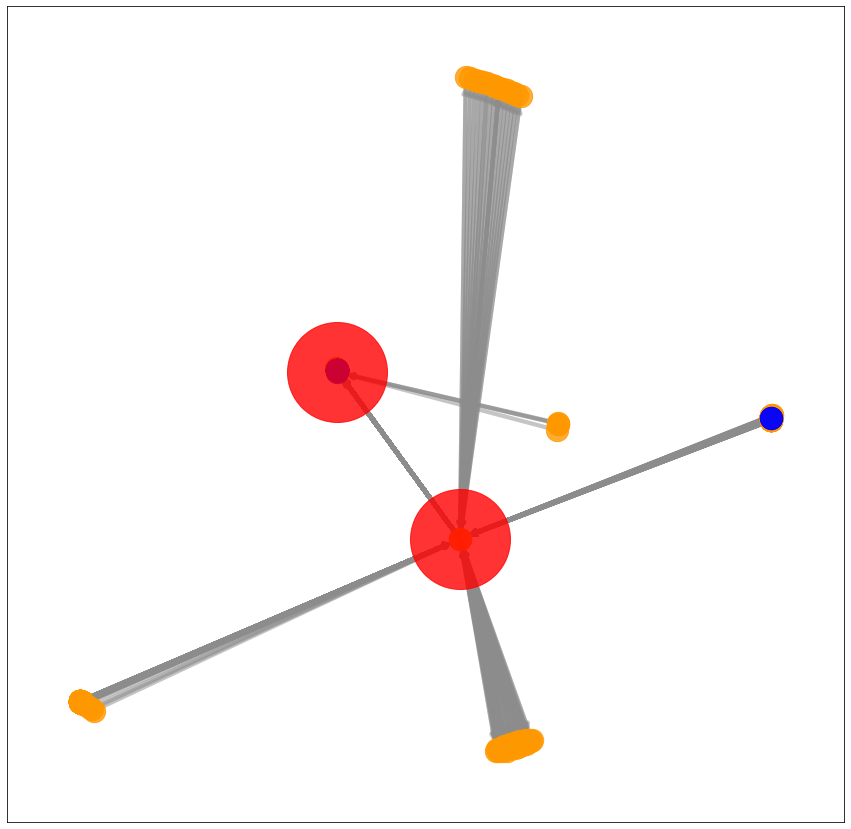

In [ ]:
fig = plt.figure(figsize=(15,15))
pos=nx.kamada_kawai_layout(dfSeed1_Lvl2G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(dfSeed1_Lvl2G,pos,
                       nodelist=people,
                       node_color='#FF9800',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(dfSeed1_Lvl2G,pos,
                       nodelist=items,
                       node_color='b',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(dfSeed1_Lvl2G,pos,
                       nodelist=list(dfSeed1_Lvl1["Source"]) + list(dfSeed1_Lvl1["Target"]),
                       node_color='r',
                       node_size=10000,
                   alpha=0.8)

# edges
# nx.draw_networkx_edges(dfSeed1_Lvl2G,pos,width=1.0,alpha=0.5)
# nx.draw_networkx_edges(dfSeed1_Lvl2G,pos,
#                        edgelist=graph2NodesTuple,
#                        width=2,alpha=0.5,edge_color='k')
nx.draw_networkx_edges(dfSeed1_Lvl2G,pos,
                       edgelist=dfSeed1_Lvl2Tuple,
                       width=4.2,alpha=0.5,edge_color='#8C8C8C')
fig.show()

In [ ]:
images_dir = 'drive/My Drive/images'
fig.savefig(f"{images_dir}/Seed1Level2.png")

#### checking the people connected by eType 4

In [ ]:
dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 4]

Source  eType  Target       Time    Weight
151203  600971      4  463021 -508376182  0.250000
251560  600971      4  607498 -541121782  0.333333
251616  600971      4  530665 -656897782  0.250000
251656  470085      4  579269 -660038400  0.166667
251657  484189      4  579269 -660038400  0.166667
251658  600971      4  579269 -685755382  0.166667
251659  540660      4  579269 -660038400  0.166667
251660  611692      4  579269 -660038400  0.166667
251661  609913      4  579269 -660038400  0.166667

In [ ]:
dfBigGraph[(dfBigGraph['eType'] == 4) & ((dfBigGraph['Target'] == 463021) | 
                 (dfBigGraph['Target'] == int(607498)) | (dfBigGraph['Target'] == int(530665)))]

Source  eType  Target       Time    Weight
151203  600971      4  463021 -508376182  0.250000
151204  561356      4  463021 -482659200  0.250000
151205  609913      4  463021 -482659200  0.250000
151206  611692      4  463021 -482659200  0.250000
251560  600971      4  607498 -541121782  0.333333
251561  611692      4  607498 -515404800  0.333333
251562  475588      4  607498 -515404800  0.333333
251616  600971      4  530665 -656897782  0.250000
251617  540660      4  530665 -631180800  0.250000
251618  611692      4  530665 -631180800  0.250000
251619  609913      4  530665 -631180800  0.250000

In [ ]:
dfSeed1_eT4People = list()
for target in dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 4]["Target"]:
  dfSeed1_eT4People += (list(dfBigGraph[(dfBigGraph['eType'] == 4) & (dfBigGraph['Target'] == target)]["Source"]))

In [ ]:
dfSeed1_eT4People =  list(dict.fromkeys(dfSeed1_eT4People))
print(dfSeed1_eT4People)

[600971, 561356, 609913, 611692, 475588, 540660, 470085, 484189]


#### checking the people connected by eType 0 and 1

In [ ]:
dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 0]

Source  eType  Target      Time  Weight
539052     478853      0  600971  16520421     1.0
765953     531430      0  600971  27765727     1.0
885777     561931      0  600971  28399738     1.0
1049489    581835      0  600971  31439805     1.0
1049490    600971      0  596866  31439805     1.0
...           ...    ...     ...       ...     ...
123596477  612711      0  600971   5124943     1.0
123596478  612711      0  600971   5571681     1.0
123596479  612711      0  600971   5466827     1.0
123596534  643411      0  600971   3294251     1.0
123596535  643411      0  600971   4140046     1.0

[1554 rows x 5 columns]

In [ ]:
dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 1]

Source  eType  Target      Time  Weight
470643     509373      1  600971  15163602     1.0
470644     600971      1  544636  15163602     1.0
539053     600971      1  498608  16520421     1.0
765954     600971      1  495711  27765727     1.0
811653     588245      1  600971    432045     1.0
...           ...    ...     ...       ...     ...
123596601  598006      1  600971   4896827     1.0
123596602  598006      1  600971   4021148     1.0
123596763  622306      1  600971  10144718     1.0
123596764  622306      1  600971   3941269     1.0
123596765  622306      1  600971   7667114     1.0

[2214 rows x 5 columns]

In [ ]:
dfSeed1_eT0People = list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 0]["Source"]) + list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 0]["Target"])
print(len(dfSeed1_eT0People))

3108


In [ ]:
len(list(dict.fromkeys(dfSeed1_eT0People)))

1540

In [ ]:
dfSeed1_eT1People = list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 1]["Source"]) + list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 1]["Target"])
print(len(dfSeed1_eT1People))

4428


In [ ]:
len(list(dict.fromkeys(dfSeed1_eT1People)))

2051

In [ ]:
print(len(list(dfSeed1_eT0People) + list(dfSeed1_eT1People)))

7536


In [ ]:
print(len(list(dict.fromkeys(
    list(dfSeed1_eT0People) + 
    list(dfSeed1_eT1People)
))))

3551


In [ ]:
Seed1_Lvl2G = nx.DiGraph()

In [ ]:
Seed1_Lvl2Tuple = [tuple([x, y]) for x, y in 
                   zip(dfSeed1_Lvl2[(dfSeed1_Lvl2["eType"] == 0) | (dfSeed1_Lvl2["eType"] == 1)]["Source"], 
                       dfSeed1_Lvl2[(dfSeed1_Lvl2["eType"] == 0) | (dfSeed1_Lvl2["eType"] == 1)]["Target"])]

In [ ]:
Seed1_Lvl2G.add_edges_from(Seed1_Lvl2Tuple)

In [ ]:
degree_centralitySeed1_Lvl2 = nx.degree_centrality(Seed1_Lvl2G)

In [ ]:
eigenvector_Seed1_Lvl2 = nx.eigenvector_centrality(Seed1_Lvl2G)

In [ ]:
degree_Seed1_Lvl2 = nx.degree(Seed1_Lvl2G)

In [ ]:
Seed1_Lvl2Dict = {k: v for k, v in degree_centralitySeed1_Lvl2.items() if v > min(degree_centralitySeed1_Lvl2.values())}

In [ ]:
nx.number_of_nodes(Seed1_Lvl2G)

3551

In [ ]:
len(Seed1_Lvl2Dict)

42

In [ ]:
Seed1_Lvl2Dict.keys()

dict_keys([600971, 573678, 564804, 626174, 559941, 542731, 529765, 470784, 554368, 556329, 638591, 477333, 547483, 630700, 584511, 527214, 571938, 631490, 533691, 536173, 575811, 558444, 616825, 490882, 591024, 495487, 493846, 481408, 594696, 462691, 631159, 468192, 605385, 621178, 506539, 564784, 521273, 529018, 466429, 469603, 532462, 583737])

In [ ]:
Seed1_Lvl2Dict.values()

dict_values([1.011549295774648, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409, 0.0005633802816901409])

In [ ]:
degree_Seed1_Lvl2

DiDegreeView({509373: 1, 600971: 3591, 544636: 1, 478853: 1, 498608: 1, 531430: 1, 495711: 1, 588245: 1, 464825: 1, 507346: 1, 561931: 1, 458365: 1, 581835: 1, 596866: 1, 484308: 1, 560418: 1, 532753: 1, 570443: 1, 552243: 1, 505857: 1, 595737: 1, 617516: 1, 626538: 1, 655639: 1, 635565: 1, 589033: 1, 620024: 1, 610477: 1, 504753: 1, 496375: 1, 657533: 1, 610768: 1, 479674: 1, 567716: 1, 639419: 1, 640109: 1, 505409: 1, 486926: 1, 524473: 1, 640697: 1, 493145: 1, 513148: 1, 539903: 1, 614964: 1, 475873: 1, 465820: 1, 481910: 1, 533887: 1, 597473: 1, 601028: 1, 514981: 1, 476094: 1, 460865: 1, 512867: 1, 593940: 1, 579468: 1, 645047: 1, 535286: 1, 501694: 1, 481994: 1, 571682: 1, 606011: 1, 526618: 1, 573678: 2, 512173: 1, 468160: 1, 473838: 1, 647959: 1, 561819: 1, 570256: 1, 619277: 1, 462418: 1, 629905: 1, 523586: 1, 460690: 1, 507507: 1, 492205: 1, 576640: 1, 568224: 1, 529612: 1, 504817: 1, 586532: 1, 501121: 1, 536589: 1, 564804: 2, 468865: 1, 616864: 1, 572297: 1, 514428: 1, 4688

We can check:
  - If there are above a minimum degree(find these based on graphs in Q1) in communication channel
  - Check how many different source and target roles they had
  - Check if they are in our other channel potential node list

#### checking the people connected by eType 2 and 3

In [ ]:
dfSeed1_eT2People = list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 2]["Source"])

In [ ]:
dfSeed1_eT3People = list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 3]["Source"])

In [ ]:
print(len(dfSeed1_eT2People), len(dfSeed1_eT3People))

0 0


#### checking the people connected by eType 5

First, we ignore the nodes connected via the demographic channel altogether and then after we found all of our interesting nodes(people) we will check for their demographic data and add the corresponding edges
(For comparison with the Template based on channel we should add the weights for our demographic channel network)

In [ ]:
dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 5]

In [ ]:
dfCategories = pd.read_csv('drive/My Drive/data/DemographicCategories.csv')

In [ ]:
dfCategories

In [ ]:
for id, category in zip(dfCategories["NodeID"], dfCategories["Category"]):
  print("Is category(", category, ") in the Sources of big graph?  ",  id in dfBigGraph["Source"]) 

In [ ]:
for id, category in zip(dfCategories["NodeID"], dfCategories["Category"]):
  print("Is category(", category, ") in the targets of big graph?  ",  id in dfBigGraph["Target"]) 

NodeID
Category


In [ ]:
dfSeed1_eT5People = list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 5]["Source"])

In [ ]:
dfCategories["NodeID"][0] in dfBigGraph["Target"]

True

#### checking the people connected by eType 6

- Check the same travels(target, time, weight, sourceLocation)
- Check different combinations(target, time)
- derive how to select the nodes
- Check in other channels(Template and graphs)

In [ ]:
dfSeed1_eT6 = dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 6].drop_duplicates()
#sorted()
print(dfSeed1_eT6)

           Source  eType  Target      Time  Weight  SourceLocation
122552070  600971      6  616453  19785600     1.0             4.0
122552071  600971      6  657173  25401600     1.0             5.0
122552072  600971      6  499467   6307200     1.0             4.0
122552073  600971      6  657173  26006400     0.0             4.0
122552074  600971      6  499467  23587200     0.0             4.0
122552075  600971      6  657173  15465600     5.0             4.0
122552076  600971      6  509607   1641600    -1.0             0.0
122552077  600971      6  616453  24019200     3.0             0.0
122552078  600971      6  625756   2505600     5.0             4.0


In [ ]:
list(dfSeed1_eT6People["Weight"])[0]

1.0

In [ ]:
dfBigGraph[(dfBigGraph['eType'] == 6) & 
           (dfBigGraph['Target'] == int(616453)) &
           (dfBigGraph['Time'] == int(19785600)) &  
           (dfBigGraph['Weight'] == list(dfSeed1_eT6["Weight"])[0])]

Source  eType  ...  TargetLatitude  TargetLongitude
122417656  523816      6  ...            22.0            156.0
122420307  619696      6  ...            22.0            156.0
122423507  517100      6  ...            22.0            156.0
122445124  620593      6  ...            22.0            156.0
122476571  627022      6  ...            22.0            156.0
...           ...    ...  ...             ...              ...
123797390  570988      6  ...            22.0            156.0
123821304  654304      6  ...            22.0            156.0
123865758  468539      6  ...            22.0            156.0
123875053  463212      6  ...            22.0            156.0
123885047  561561      6  ...            22.0            156.0

[75 rows x 11 columns]

In [ ]:
dfSeed1_eT6People = list()
for target, time, weight, sourceLoc in tqdm(zip(list(dfSeed1_eT6["Target"]), 
                                                list(dfSeed1_eT6["Time"]), 
                                                list(dfSeed1_eT6["Weight"]),
                                                list(dfSeed1_eT6["SourceLocation"]))):
  #print(target, time, weight)
  dfSeed1_eT6People += list(
      dfBigGraph[(dfBigGraph['eType'] == 6) & 
                 (dfBigGraph['Target'] == target) &
                 (dfBigGraph['Time'] == time) &  
                 (dfBigGraph['Weight'] == weight) &
                 (dfBigGraph["SourceLocation"] == sourceLoc)]["Source"])

9it [00:10,  1.15s/it]


In [ ]:
len(dfSeed1_eT6People)

1560

In [ ]:
len(list(dict.fromkeys(dfSeed1_eT6People)))

53

In [ ]:
dfSeed1_eT6People = list()
for target, time, weight, sourceLoc in tqdm(zip(list(dfSeed1_eT6["Target"]), 
                                                list(dfSeed1_eT6["Time"]), 
                                                list(dfSeed1_eT6["Weight"]),
                                                list(dfSeed1_eT6["SourceLocation"]))):

      print(len(dfBigGraph[(dfBigGraph['eType'] == 6) & 
                 (dfBigGraph['Target'] == target) &
                 (dfBigGraph['Time'] == time) &  
                 (dfBigGraph['Weight'] == weight) &
                 (dfBigGraph["SourceLocation"] == sourceLoc)].drop_duplicates()))

1it [00:01,  1.30s/it]

7


2it [00:02,  1.25s/it]

3


3it [00:03,  1.22s/it]

6


4it [00:04,  1.19s/it]

9


5it [00:05,  1.18s/it]

8


6it [00:06,  1.16s/it]

4


7it [00:08,  1.16s/it]

16


8it [00:09,  1.15s/it]

2


9it [00:10,  1.16s/it]

6


###### without weight

In [ ]:
dfSeed1_eT6People = list()
for target, time, sourceLoc in tqdm(zip(list(dfSeed1_eT6["Target"]), 
                                                list(dfSeed1_eT6["Time"]),
                                                list(dfSeed1_eT6["SourceLocation"]))):
  #print(target, time, weight)
  dfSeed1_eT6People += list(
      dfBigGraph[(dfBigGraph['eType'] == 6) & 
                 (dfBigGraph['Target'] == target) &
                 (dfBigGraph['Time'] == time) &
                 (dfBigGraph["SourceLocation"] == sourceLoc)]["Source"])

9it [00:08,  1.11it/s]


In [ ]:
len(dfSeed1_eT6People)

1560

In [ ]:
len(list(dict.fromkeys(dfSeed1_eT6People)))

302

In [ ]:
dfSeed1_eT6People = list()
for target, time, weight, sourceLoc in tqdm(zip(list(dfSeed1_eT6["Target"]), 
                                                list(dfSeed1_eT6["Time"]), 
                                                list(dfSeed1_eT6["Weight"]),
                                                list(dfSeed1_eT6["SourceLocation"]))):

      print(len(dfBigGraph[(dfBigGraph['eType'] == 6) & 
                 (dfBigGraph['Target'] == target) &
                 (dfBigGraph['Time'] == time) &  
                 (dfBigGraph['Weight'] == weight) &
                 (dfBigGraph["SourceLocation"] == sourceLoc)].drop_duplicates()))

1it [00:01,  1.16s/it]

7


2it [00:02,  1.14s/it]

3


3it [00:03,  1.12s/it]

6


4it [00:04,  1.11s/it]

9


5it [00:05,  1.10s/it]

8


6it [00:06,  1.09s/it]

4


7it [00:07,  1.08s/it]

16


8it [00:08,  1.08s/it]

2


9it [00:09,  1.08s/it]

6


##### in common with communication

In [ ]:
commonList016 = list()
for person in list(dict.fromkeys(dfSeed1_eT6People)):
  if(person in list(dict.fromkeys(list(dfSeed1_eT0People) + list(dfSeed1_eT1People)))):
    commonList016.append(person)

In [ ]:
print(commonList016, len(commonList016))

[597450, 600971, 460581, 552243, 589043, 647163, 501914, 643930, 474123, 565346, 479674, 537659, 513686, 573191, 603212] 15


In [ ]:
for person in commonList016:
  print(person in Seed1_Lvl2Dict.keys(), end=", ")

False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, 

#### Selecting the people for the Seed 1 Graph

In [ ]:
Seed1_People = list(dict.fromkeys(commonList016 + list(Seed1_Lvl2Dict.keys()) + list(dfSeed1_eT4People)))

In [ ]:
#dfSeed1_eT4People

In [ ]:
len(Seed1_People)

63

In [ ]:
pairs = list()
for pair in tqdm(itertools.product(Seed1_People, repeat=2)):
  pairs.append(pair)

3969it [00:00, 1039020.88it/s]


In [ ]:
pairs

In [ ]:
dfBigGraph_2 = dfBigGraph[["Source", "Target"]]

In [ ]:
dfBigGraph_2 = dfBigGraph_2[((dfBigGraph_2["Source"] > min(Seed1_People)) & 
                             (dfBigGraph_2["Source"] < max(Seed1_People))) & 
                            ((dfBigGraph_2["Target"] > min(Seed1_People)) & 
                             (dfBigGraph_2["Target"] < max(Seed1_People)))]

In [ ]:
len(dfBigGraph_2)

106898029

In [ ]:
print(min(Seed1_People), max(Seed1_People))

460581 647163


In [ ]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
dfSeed1Graph = dfBigGraph_2[dfBigGraph_2["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfSeed1Graph = dfSeed1Graph.append(dfBigGraph_2[(dfBigGraph_2['Source'] == pairs[i][0]) & (dfBigGraph_2['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 3969/3969 [22:15<00:00,  2.97it/s]


In [ ]:
# Creating an empty dfSeed1Graph2 file for our final graph based on seed1 file
dfSeed1Graph2 = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfSeed1Graph2 = dfSeed1Graph2.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) | (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

In [ ]:
dfSeed1Graph_nonduplicate = dfSeed1Graph.drop_duplicates()

In [ ]:
dfSeed1Graph2

Source  eType  Target       Time        Weight  SourceLocation
0         462278      0  597450   10024781      1.000000             NaN
1         597450      1  615252   10024781      1.000000             4.0
2         651860      0  597450   22205803      1.000000             NaN
3         597450      1  635193   22205803      1.000000             4.0
4         638069      1  597450   12624962      1.000000             5.0
...          ...    ...     ...        ...           ...             ...
31183422  552988      5  611692   31536000  57512.300000             NaN
31183423  484189      4  579269 -660038400      0.166667             NaN
31183424  484189      4  579269 -660038400      0.166667             NaN
31183425  484189      4  579269 -660038400      0.166667             NaN
31183426  484189      4  579269 -660038400      0.166667             NaN

[31183427 rows x 6 columns]

In [ ]:
Seed1G = nx.DiGraph()

In [ ]:
Seed1Tuple = [tuple([x, y]) for x, y in zip(dfSeed1Graph["Source"], dfSeed1Graph["Target"])]

In [ ]:
Seed1G.add_edges_from(Seed1Tuple)

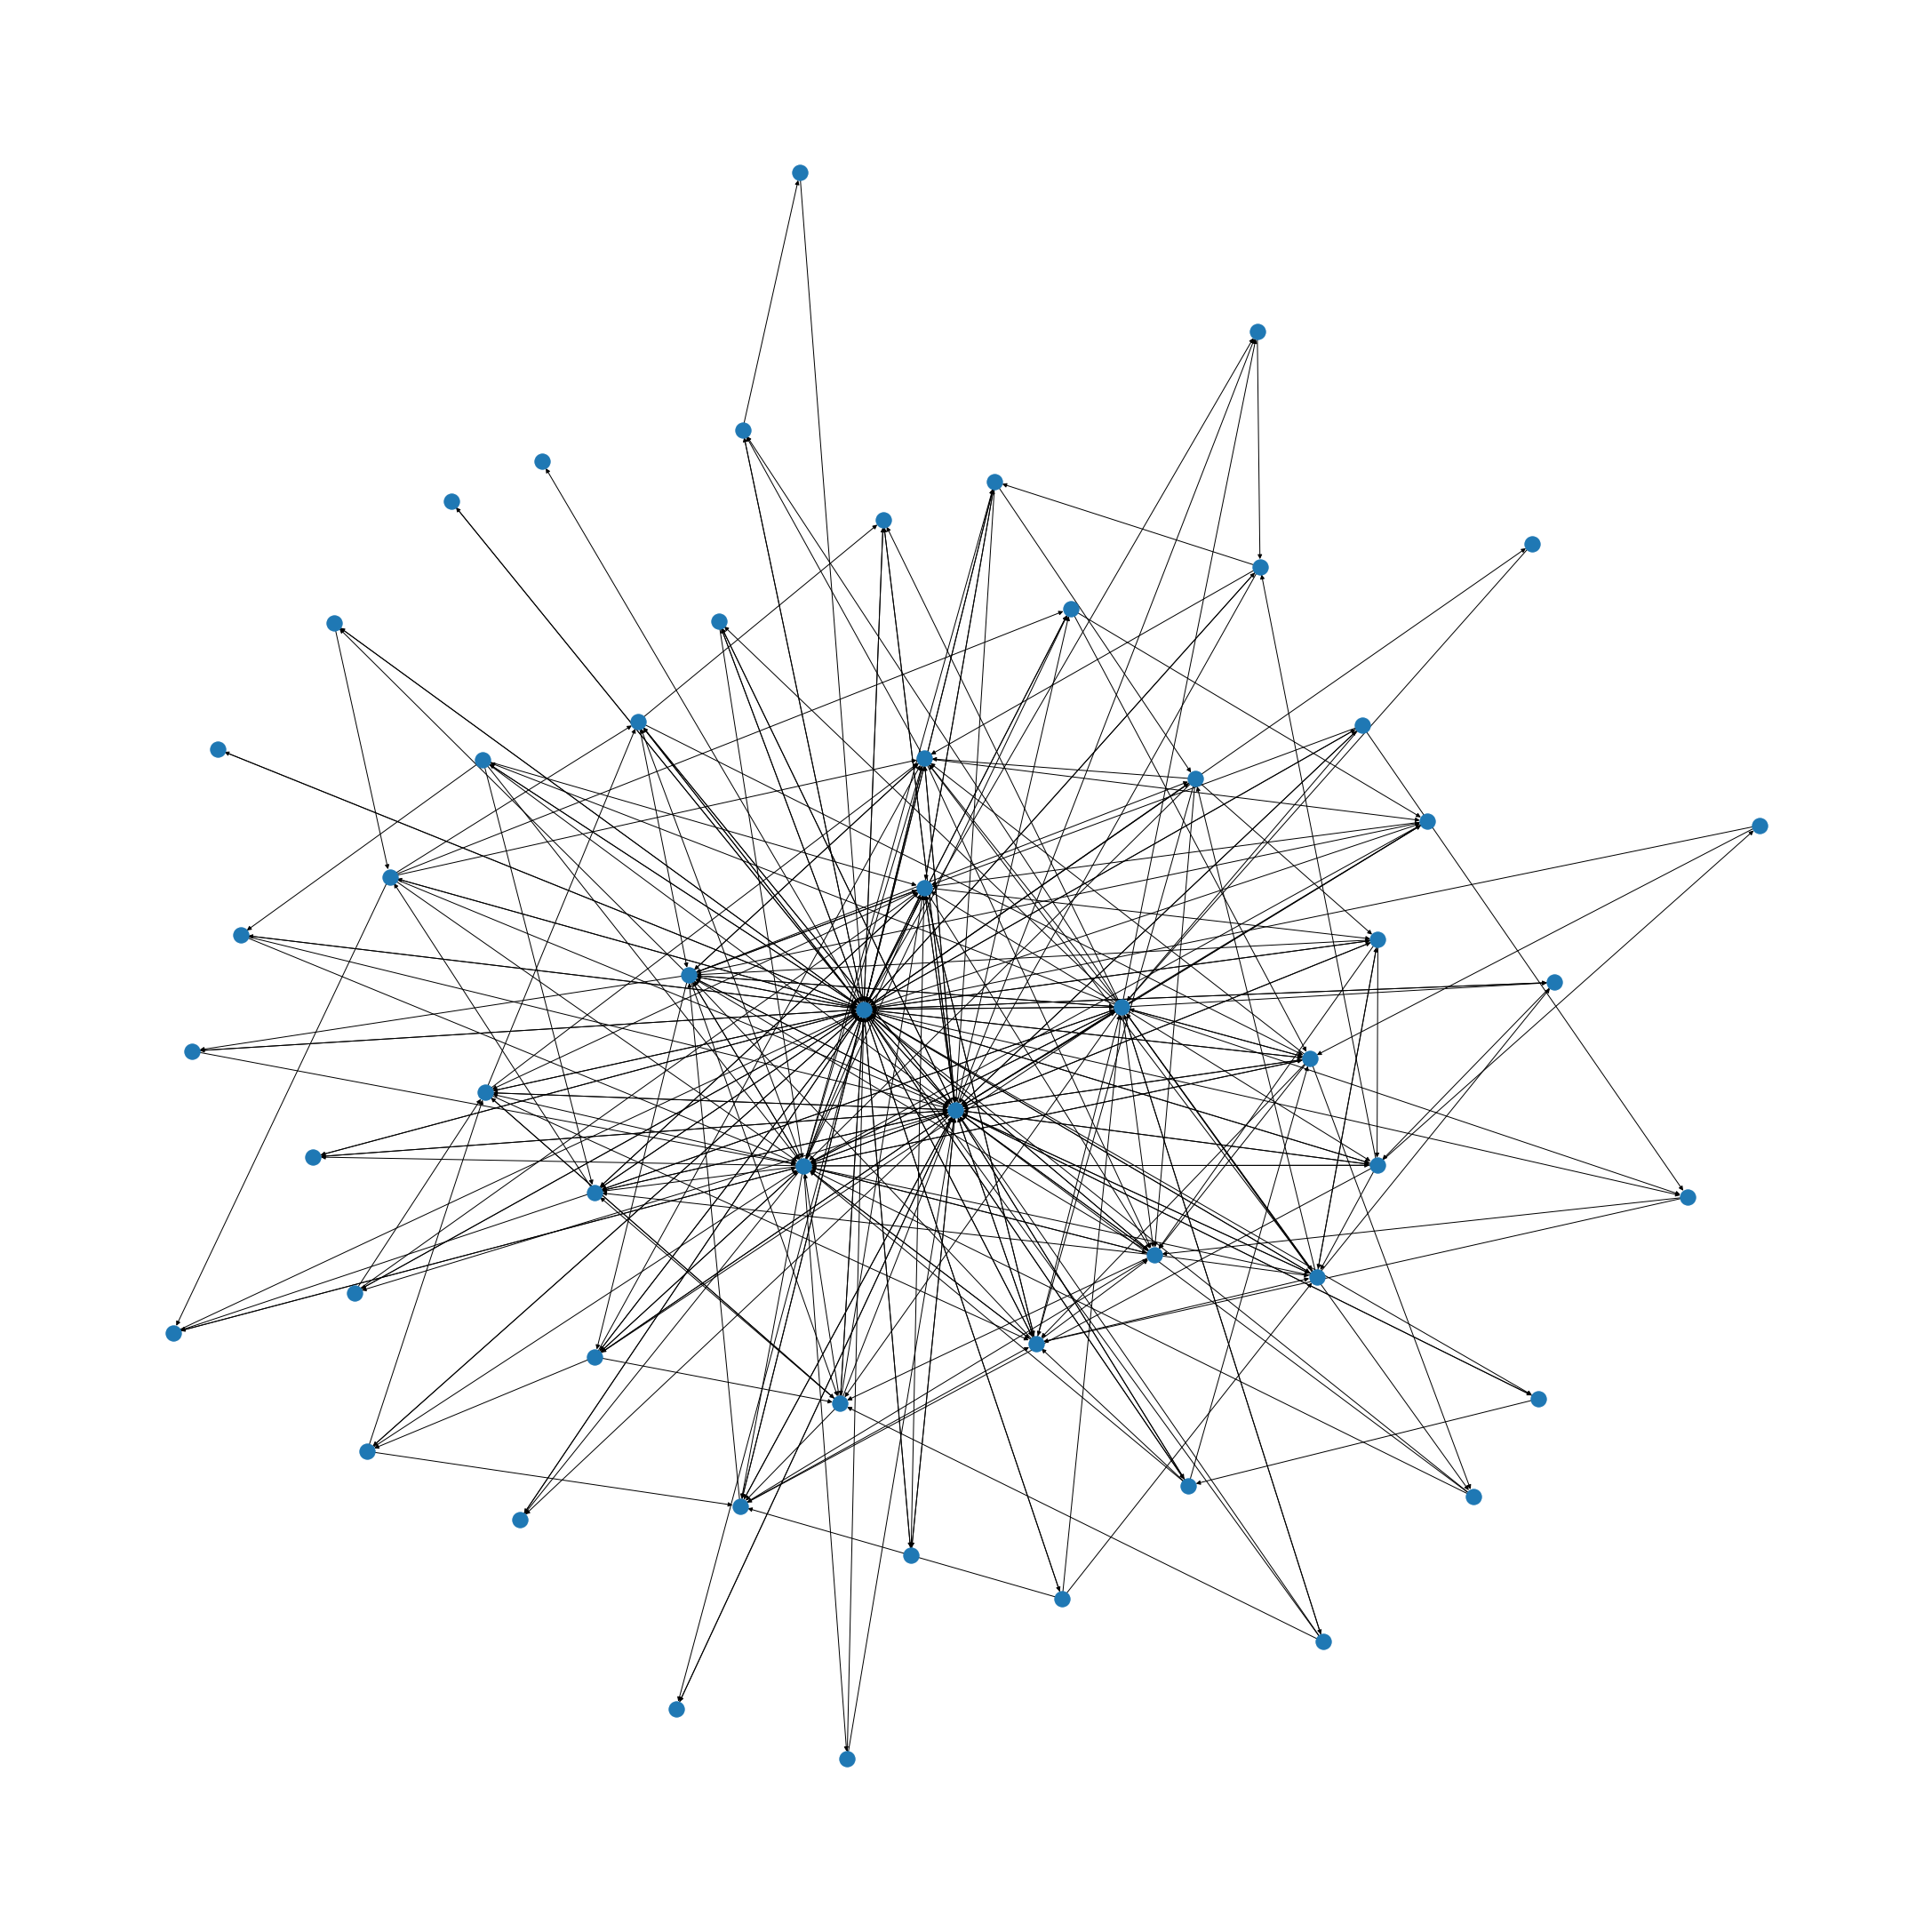

In [ ]:
fig = plt.figure(figsize=(30,30))
nx.draw_kamada_kawai(Seed1G)
#pos=nx.shell_layout(ego_net)

#nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')
plt.show()

In [ ]:
Template0G = nx.DiGraph()

In [ ]:
Template0Tuple = [tuple([x, y]) for x, y in zip(dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Source"], 
                                                dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Target"])]

In [ ]:
Template0G.add_edges_from(Template0Tuple)

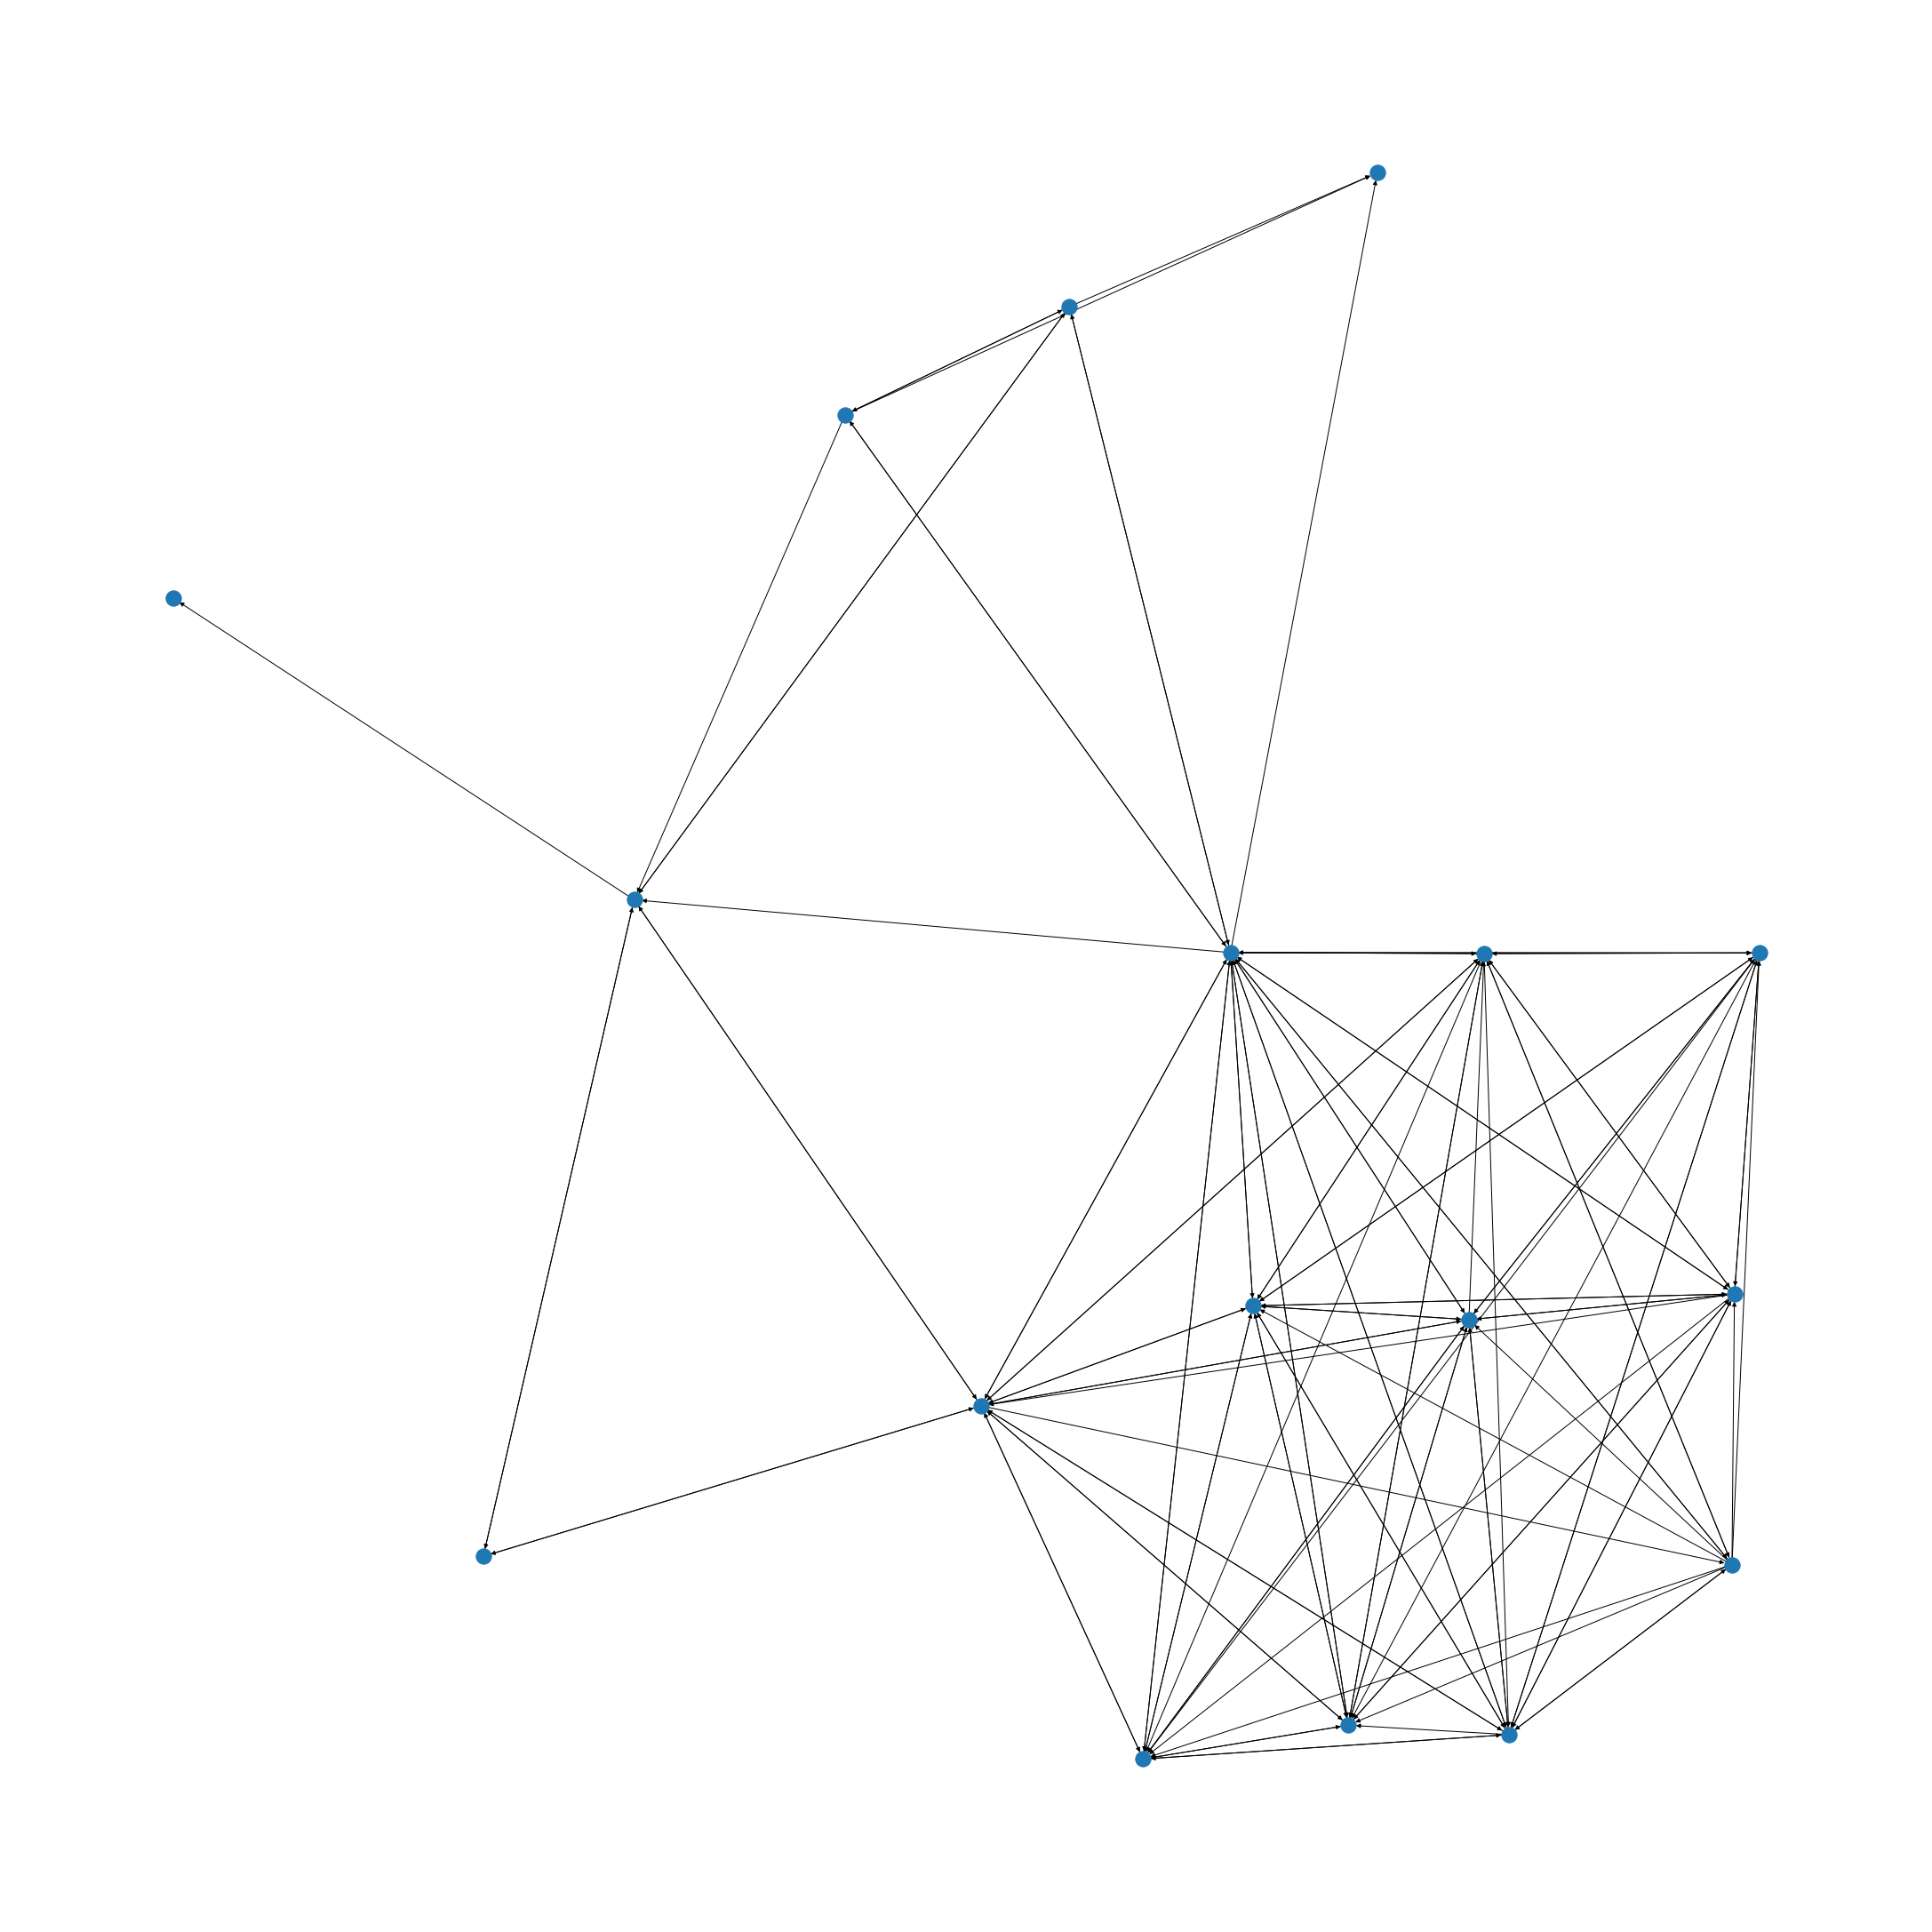

In [ ]:
fig = plt.figure(figsize=(30,30))
nx.draw_kamada_kawai(Template0G)


plt.show()

In [ ]:
#dfSeed1Graph.to_csv("drive/My Drive/data/Seed1-Graph2.csv")

In [ ]:
dfSeed1_2 = pd.read_csv('drive/My Drive/data/Seed1-Graph2.csv')

In [ ]:
dfSeed1_2 = dfSeed1_2[["Source", "Target"]]

In [ ]:
dfSeed1_2 = dfSeed1_2.drop_duplicates()

In [ ]:
dfSeed1Graph = dfBigGraph[dfBigGraph["Source"] == -1000]
for source, target in tqdm(zip(list(dfSeed1_2["Source"]), list(dfSeed1_2["Target"]))):
  dfSeed1Graph = dfSeed1Graph.append(dfBigGraph[(dfBigGraph["Source"] == source) & (dfBigGraph["Target"] == target)])

329it [02:11,  2.51it/s]


In [ ]:
dfSeed1Graph

Source  eType  Target      Time  Weight  SourceLocation
76795238   597450      1  600971   9598533     1.0             4.0
888951     597450      1  564784  17296408     1.0             4.0
76796664   600971      1  643930  22933478     1.0             0.0
4443744    600971      1  479674   4329388     1.0             0.0
76797099   600971      0  537659  27074883     1.0             NaN
...           ...    ...     ...       ...     ...             ...
116572366  583737      1  605385  17783110     1.0             0.0
4356313    583737      0  506539    853550     1.0             NaN
4365673    583737      1  506539  13055672     1.0             0.0
116572180  583737      1  506539  13146985     1.0             0.0
34562099   611692      1  554368   9880251     1.0             0.0

[553 rows x 6 columns]

In [ ]:
len(list(dict.fromkeys(list(dfSeed1Graph["Source"]) + list(dfSeed1Graph))))

60

#### adding additional channels

In [ ]:
dfSeed1GraphNotCommunication = dfBigGraph[dfBigGraph["Source"] == -1000]
for person in tqdm(list(dict.fromkeys(list(dfSeed1Graph["Source"]) + list(dfSeed1Graph["Target"])))):
  dfSeed1GraphNotCommunication = dfSeed1GraphNotCommunication.append(dfBigGraph[((dfBigGraph["Source"] == person) | 
                                                                                (dfBigGraph["Target"] == person)) &
                                                                                (dfBigGraph["eType"] > 1)])

100%|██████████| 55/55 [00:35<00:00,  1.57it/s]


In [ ]:
len(dfSeed1GraphNotCommunication)

5713

In [ ]:
len(dfSeed1GraphNotCommunication[dfSeed1GraphNotCommunication["eType"] == 5])


1124

In [ ]:
#dfSeed1GraphNotCommunication.to_csv("drive/My Drive/data/Seed1-Graph2NonCom.csv")

In [ ]:
for i in range(2,7):
  print("eType", i, ": ", len(dfSeed1GraphNotCommunication[dfSeed1GraphNotCommunication["eType"] == i]))

eType 2 :  1703
eType 3 :  1537
eType 4 :  204
eType 5 :  1124
eType 6 :  1145


### Seed 2 generation 2nd attempt

In [ ]:
dfSeed2_Lvl1 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed2["Source"])) & (dfBigGraph['Target'] == int(dfSeed2["Target"]))]  

In [ ]:
dfSeed2_Lvl1

Source  eType  Target       Time    Weight  SourceLocation
4998  538771      4  473043 -623491200  0.090909             NaN

In [ ]:
dfSeed2_Lvl2 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed2["Source"])) | (dfBigGraph['Target'] == int(dfSeed2["Target"])) | 
                 (dfBigGraph['Source'] == int(dfSeed2["Target"])) | (dfBigGraph['Target'] == int(dfSeed2["Source"]))]  

###### Visualizing the level 2

In [ ]:

dfSeed2_Lvl2G = nx.MultiDiGraph()
dfSeed2_Lvl2Tuple = [tuple([x, y]) for x, y in zip(dfSeed2_Lvl2["Source"], dfSeed2_Lvl2["Target"])]
dfSeed2_Lvl2G.add_edges_from(dfSeed2_Lvl2Tuple)
print()

In [ ]:
people = list()

people = people + list(dict.fromkeys(list(dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] != 5]["Source"]) + 
                                     list(dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] <= 1]["Target"])))

for node in tqdm(list(dict.fromkeys(list(dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] == 5]["Source"]) + 
                                    list(dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] == 5]["Target"])))):
  if(node not in list(dfCategory["NodeID"])):
    people = people + list([node])
#print(people)

0it [00:00, ?it/s]


In [ ]:
items = [item for item in list(dict.fromkeys(list(dfSeed2_Lvl2["Source"]) + list(dfSeed2_Lvl2["Target"]))) if item not in people]

In [ ]:
print(len(people), people)
print(len(items), items)

11 [538771, 539232, 566476, 491573, 585791, 565073, 591742, 544629, 652020, 652440, 546487]
58 [462146, 652563, 653816, 521370, 477902, 589499, 600158, 495860, 530130, 520589, 549279, 498205, 551513, 619226, 457185, 531391, 468528, 508586, 518313, 468104, 581631, 630210, 532186, 619717, 523620, 467921, 527009, 582996, 525510, 565132, 596945, 531519, 574425, 626137, 488848, 519936, 614131, 492492, 609834, 548600, 636371, 626501, 639332, 501439, 580394, 589232, 602969, 592696, 526501, 641263, 568239, 473333, 556294, 473043, 532197, 565737, 540328, 476766]


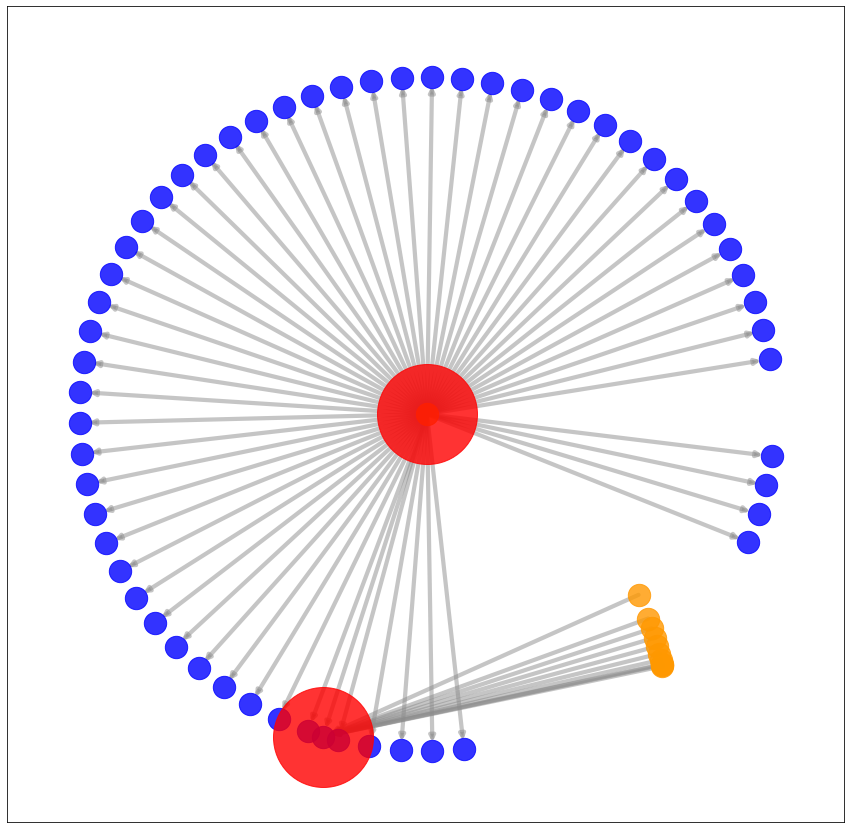

In [ ]:
fig = plt.figure(figsize=(15,15))
pos=nx.kamada_kawai_layout(dfSeed2_Lvl2G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(dfSeed2_Lvl2G,pos,
                       nodelist=people,
                       node_color='#FF9800',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(dfSeed2_Lvl2G,pos,
                       nodelist=items,
                       node_color='b',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(dfSeed2_Lvl2G,pos,
                       nodelist=list(dfSeed2_Lvl1["Source"]) + list(dfSeed2_Lvl1["Target"]),
                       node_color='r',
                       node_size=10000,
                   alpha=0.8)

# edges
# nx.draw_networkx_edges(dfSeed1_Lvl2G,pos,width=1.0,alpha=0.5)
# nx.draw_networkx_edges(dfSeed1_Lvl2G,pos,
#                        edgelist=graph2NodesTuple,
#                        width=2,alpha=0.5,edge_color='k')
nx.draw_networkx_edges(dfSeed2_Lvl2G,pos,
                       edgelist=dfSeed2_Lvl2Tuple,
                       width=4.2,alpha=0.5,edge_color='#8C8C8C')
fig.show()

In [ ]:
images_dir = 'drive/My Drive/images'
fig.savefig(f"{images_dir}/Seed2Level2.png")

#### checking the people connected by eType 4

- Check how many papers they wrote that were in the graph's target list
- Check how many data points are there
- We only need to find a way to select a bunch of people from the list of our authors

In [ ]:
dfSeed2_Lvl2[(dfSeed2_Lvl2["eType"] == 4) & (dfSeed2_Lvl2["Target"] == int(dfSeed2_Lvl1["Target"]))]

Source  eType  Target       Time    Weight  SourceLocation
4996  539232      4  473043 -623491200  0.090909             NaN
4997  566476      4  473043 -623491200  0.090909             NaN
4998  538771      4  473043 -623491200  0.090909             NaN
4999  491573      4  473043 -623491200  0.090909             NaN
5000  585791      4  473043 -623491200  0.090909             NaN
5001  565073      4  473043 -623491200  0.090909             NaN
5002  591742      4  473043 -623491200  0.090909             NaN
5003  544629      4  473043 -623491200  0.090909             NaN
5004  652020      4  473043 -623491200  0.090909             NaN
5005  652440      4  473043 -623491200  0.090909             NaN
5006  546487      4  473043 -623491200  0.090909             NaN

In [ ]:
dfSeed2_eT4People = list()
for target in dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] == 4]["Target"]:
  dfSeed2_eT4People += (list(dfBigGraph[(dfBigGraph['eType'] == 4) & (dfBigGraph['Target'] == target)]["Source"]))

In [ ]:
dfSeed2_eT4PeopleAll = dfSeed2_eT4People
len(dfSeed2_eT4People)

935

In [ ]:
dfSeed2_eT4People_Unq =  list(dict.fromkeys(dfSeed2_eT4People))
print(len(dfSeed2_eT4People_Unq))

133


In [ ]:
dfSeed2_eT4People.count(dfSeed2_eT4People_Unq[1])

7

In [ ]:
dfSeed2_eT4People_frequent = list()
for person in dfSeed2_eT4People_Unq:
  if(dfSeed2_eT4People.count(person) > 1):
    dfSeed2_eT4People_frequent.append(person)

In [ ]:
len(dfSeed2_eT4People_frequent)

72

let's find the people who wrote more than 1 paper with our seed Source!

#### checking the people connected by eType 0 and 1

In [ ]:
dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] == 0]

Empty DataFrame
Columns: [Source, eType, Target, Time, Weight, SourceLocation]
Index: []

In [ ]:
dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] == 1]

Empty DataFrame
Columns: [Source, eType, Target, Time, Weight, SourceLocation]
Index: []

In [ ]:
dfSeed2_eT0People = list(dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] == 0]["Source"]) + list(dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] == 0]["Target"])
print(len(dfSeed2_eT0People))

0


In [ ]:
len(list(dict.fromkeys(dfSeed2_eT0People)))

0

In [ ]:
dfSeed2_eT1People = list(dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] == 1]["Source"]) + list(dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] == 1]["Target"])
print(len(dfSeed2_eT1People))

0


In [ ]:
len(list(dict.fromkeys(dfSeed2_eT1People)))

0

In [ ]:
print(len(list(dfSeed2_eT0People) + list(dfSeed2_eT1People)))

0


In [ ]:
print(len(list(dict.fromkeys(
    list(dfSeed2_eT0People) + 
    list(dfSeed2_eT1People)
))))

0


#### checking the people connected by eType 2 and 3

In [ ]:
dfSeed2_eT2People = list(dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] == 2]["Source"])

In [ ]:
dfSeed2_eT3People = list(dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] == 3]["Source"])

In [ ]:
print(len(dfSeed2_eT2People), len(dfSeed2_eT3People))

0 0


#### checking the people connected by eType 5

In [ ]:
dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] == 5]

Empty DataFrame
Columns: [Source, eType, Target, Time, Weight, SourceLocation]
Index: []

In [ ]:
dfCategories = pd.read_csv('drive/My Drive/data/DemographicCategories.csv')

#### checking the people connected by eType 6

In [ ]:
dfSeed2_eT6 = dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] == 6].drop_duplicates()
#sorted()
print(dfSeed2_eT6)

Empty DataFrame
Columns: [Source, eType, Target, Time, Weight, SourceLocation]
Index: []


#### Selecting the people for the Seed 2 Graph

In [ ]:
Seed2_People = dfSeed2_eT4People_frequent

In [ ]:
len(Seed2_People)

72

In [ ]:
print(Seed2_People)

[618062, 465946, 518868, 512098, 636424, 652020, 516555, 585833, 464116, 644297, 538771, 476055, 634509, 566476, 531440, 546487, 555716, 585791, 565073, 591742, 502216, 531574, 605940, 542202, 467951, 521185, 626438, 532628, 578861, 482879, 518332, 498620, 520801, 545276, 552604, 565164, 479897, 579013, 544629, 593730, 543291, 587506, 461791, 491573, 466012, 531314, 584113, 541803, 632832, 516990, 482835, 539232, 553591, 577915, 605053, 608305, 555844, 506245, 652440, 642430, 458267, 601024, 531149, 581761, 573702, 572223, 640267, 483578, 645429, 515866, 587001, 526300]


In [ ]:
pairs = list()
for pair in tqdm(itertools.product(Seed2_People, repeat=2)):
  pairs.append(pair)

5184it [00:00, 818462.39it/s]


In [ ]:
len(pairs)

5184

In [ ]:
dfBigGraph_2 = dfBigGraph[["Source", "Target"]]

In [ ]:
dfBigGraph_2 = dfBigGraph_2[((dfBigGraph_2["Source"] > min(Seed2_People)) & 
                             (dfBigGraph_2["Source"] < max(Seed2_People))) & 
                            ((dfBigGraph_2["Target"] > min(Seed2_People)) & 
                             (dfBigGraph_2["Target"] < max(Seed2_People)))]

In [ ]:
len(dfBigGraph_2)

115603448

In [ ]:
print(min(Seed2_People), max(Seed2_People))

458267 652440


In [ ]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
dfSeed2Graph = dfBigGraph_2[dfBigGraph_2["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfSeed2Graph = dfSeed2Graph.append(dfBigGraph_2[(dfBigGraph_2['Source'] == pairs[i][0]) & (dfBigGraph_2['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 5184/5184 [29:42<00:00,  2.91it/s]


In [ ]:
dfSeed2Graph

Empty DataFrame
Columns: [Source, Target]
Index: []

In [ ]:
# Creating an empty dfSeed2Graph2 file for our final graph based on seed1 file
dfSeed2Graph2 = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfSeed2Graph2 = dfSeed2Graph2.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) | (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

In [ ]:
dfSeed2Graph_nonduplicate = dfSeed2Graph.drop_duplicates()

In [ ]:
dfSeed2Graph2

In [ ]:
Seed2G = nx.DiGraph()

In [ ]:
Seed2Tuple = [tuple([x, y]) for x, y in zip(dfSeed2Graph["Source"], dfSeed2Graph["Target"])]

In [ ]:
Seed2G.add_edges_from(Seed2Tuple)

In [ ]:
fig = plt.figure(figsize=(30,30))
nx.draw_kamada_kawai(Seed2G)
#pos=nx.shell_layout(ego_net)

#nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')
plt.show()

In [ ]:
dfSeed2Graph.to_csv("drive/My Drive/data/Seed2-Graph2.csv")

In [ ]:
dfSeed2_2 = pd.read_csv('drive/My Drive/data/Seed2-Graph2.csv')

In [ ]:
dfSeed2_2 = dfSeed2_2[["Source", "Target"]]

In [ ]:
dfSeed2_2 = dfSeed2_2.drop_duplicates()

In [ ]:
dfSeed2Graph = dfBigGraph[dfBigGraph["Source"] == -1000]
for source, target in tqdm(zip(list(dfSeed2_2["Source"]), list(dfSeed2_2["Target"]))):
  dfSeed2Graph = dfSeed2Graph.append(dfBigGraph[(dfBigGraph["Source"] == source) & (dfBigGraph["Target"] == target)])

329it [02:11,  2.51it/s]


In [ ]:
dfSeed2Graph

Source  eType  Target      Time  Weight  SourceLocation
76795238   597450      1  600971   9598533     1.0             4.0
888951     597450      1  564784  17296408     1.0             4.0
76796664   600971      1  643930  22933478     1.0             0.0
4443744    600971      1  479674   4329388     1.0             0.0
76797099   600971      0  537659  27074883     1.0             NaN
...           ...    ...     ...       ...     ...             ...
116572366  583737      1  605385  17783110     1.0             0.0
4356313    583737      0  506539    853550     1.0             NaN
4365673    583737      1  506539  13055672     1.0             0.0
116572180  583737      1  506539  13146985     1.0             0.0
34562099   611692      1  554368   9880251     1.0             0.0

[553 rows x 6 columns]

In [ ]:
len(list(dict.fromkeys(list(dfSeed2Graph["Source"]) + list(dfSeed2Graph))))

60

#### adding additional channels

In [ ]:
dfSeed2GraphNotCommunication = dfBigGraph[dfBigGraph["Source"] == -1000]
for person in tqdm(list(dict.fromkeys(list(dfSeed2Graph["Source"]) + list(dfSeed2Graph["Target"])))):
  dfSeed2GraphNotCommunication = dfSeed2GraphNotCommunication.append(dfBigGraph[((dfBigGraph["Source"] == person) | 
                                                                                (dfBigGraph["Target"] == person)) &
                                                                                (dfBigGraph["eType"] > 1)])

100%|██████████| 55/55 [00:35<00:00,  1.57it/s]


In [ ]:
len(dfSeed1GraphNotCommunication)

5713

In [ ]:
len(dfSeed1GraphNotCommunication[dfSeed1GraphNotCommunication["eType"] == 5])


1124

In [ ]:
#dfSeed1GraphNotCommunication.to_csv("drive/My Drive/data/Seed1-Graph2NonCom.csv")

In [ ]:
for i in range(2,7):
  print("eType", i, ": ", len(dfSeed1GraphNotCommunication[dfSeed1GraphNotCommunication["eType"] == i]))

eType 2 :  1703
eType 3 :  1537
eType 4 :  204
eType 5 :  1124
eType 6 :  1145


### Seed 3 generation 2nd attempt

In [ ]:
dfSeed3_Lvl1 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed3["Source"])) & (dfBigGraph['Target'] == int(dfSeed3["Target"]))]  

In [ ]:
dfSeed3_Lvl1

Source  eType  Target      Time  Weight  SourceLocation
7068974   574136      2  657187   1991785   633.0             NaN
50155815  574136      2  657187   6742286   546.0             NaN
52622375  574136      2  657187  22839875    82.0             NaN

In [ ]:
dfSeed3_Lvl2 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed3["Source"])) | (dfBigGraph['Target'] == int(dfSeed3["Source"])) | 
                          ((dfBigGraph['Target'] == int(dfSeed3_Lvl1.iloc[0:1]["Target"])) &
                           (dfBigGraph['eType'] == int(3)) &
                           (dfBigGraph['Time'] == int(dfSeed3_Lvl1.iloc[0:1]["Time"])) &
                           (dfBigGraph['Weight'] == int(dfSeed3_Lvl1.iloc[0:1]["Weight"]))
                            ) |
                          ((dfBigGraph['Target'] == int(dfSeed3_Lvl1.iloc[1:2]["Target"])) &
                           (dfBigGraph['eType'] == int(3)) &
                           (dfBigGraph['Time'] == int(dfSeed3_Lvl1.iloc[1:2]["Time"])) &
                           (dfBigGraph['Weight'] == int(dfSeed3_Lvl1.iloc[1:2]["Weight"]))
                            ) |
                          ((dfBigGraph['Target'] == int(dfSeed3_Lvl1.iloc[2:3]["Target"])) &
                           (dfBigGraph['eType'] == int(3)) &
                           (dfBigGraph['Time'] == int(dfSeed3_Lvl1.iloc[2:3]["Time"])) &
                           (dfBigGraph['Weight'] == int(dfSeed3_Lvl1.iloc[2:3]["Weight"]))
                            )]  

In [ ]:
dfSeed3_Lvl2

Source  eType  Target      Time  Weight  SourceLocation
341874     557387      0  574136  29934736     1.0             NaN
341875     574136      0  539941  29934736     1.0             NaN
378499     635193      1  574136   9210880     1.0             3.0
378501     574136      3  617468   9210880     2.0             NaN
457164     621729      1  574136  17573550     1.0             4.0
...           ...    ...     ...       ...     ...             ...
123368609  574136      6  499467  12096000     4.0             4.0
123667417  574136      6  657173   2160000     2.0             4.0
123667418  574136      6  561157  13305600     1.0             4.0
123667419  574136      6  499467  19008000     1.0             3.0
123667420  574136      6  499467  12096000     4.0             4.0

[3528 rows x 6 columns]

###### Visualizing the level 2

In [ ]:

dfSeed3_Lvl2G = nx.MultiDiGraph()
dfSeed3_Lvl2Tuple = [tuple([x, y]) for x, y in zip(dfSeed3_Lvl2["Source"], dfSeed3_Lvl2["Target"])]
dfSeed3_Lvl2G.add_edges_from(dfSeed3_Lvl2Tuple)
print()

In [ ]:
people = list()

people = people + list(dict.fromkeys(list(dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] != 5]["Source"]) + 
                                     list(dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] <= 1]["Target"])))

for node in tqdm(list(dict.fromkeys(list(dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] == 5]["Source"]) + 
                                    list(dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] == 5]["Target"])))):
  if(node not in list(dfCategory["NodeID"])):
    people = people + list([node])
#print(people)

100%|██████████| 22/22 [00:00<00:00, 36371.58it/s]


In [ ]:
items = [item for item in list(dict.fromkeys(list(dfSeed3_Lvl2["Source"]) + list(dfSeed3_Lvl2["Target"]))) if item not in people]

In [ ]:
print(len(people), people)
print(len(items), items)

3162 [557387, 574136, 635193, 621729, 630745, 639882, 569091, 527660, 553602, 493968, 585500, 466507, 582549, 459521, 608186, 485076, 558025, 481849, 516098, 581835, 466503, 548767, 491943, 492885, 504776, 575280, 546631, 587996, 542757, 490544, 629384, 611840, 549882, 652735, 579305, 616775, 468355, 584453, 622720, 657007, 469993, 508308, 572345, 615860, 648343, 508047, 506742, 531290, 518063, 654316, 506620, 535703, 518684, 593340, 470271, 530108, 513991, 613427, 601999, 467449, 500337, 566538, 543306, 485204, 619713, 487889, 642776, 542356, 497602, 525034, 612928, 569415, 642243, 531222, 600653, 552657, 536600, 609563, 490658, 562175, 547529, 633463, 564907, 486926, 653992, 572070, 587407, 493469, 585412, 511642, 539800, 469862, 501571, 458807, 557587, 525557, 529740, 511580, 597038, 636044, 559234, 593577, 478902, 584246, 535337, 566572, 582823, 620791, 458381, 601557, 647959, 580440, 545178, 579862, 628845, 634415, 631173, 600539, 631594, 608849, 541386, 522556, 588432, 583006, 49

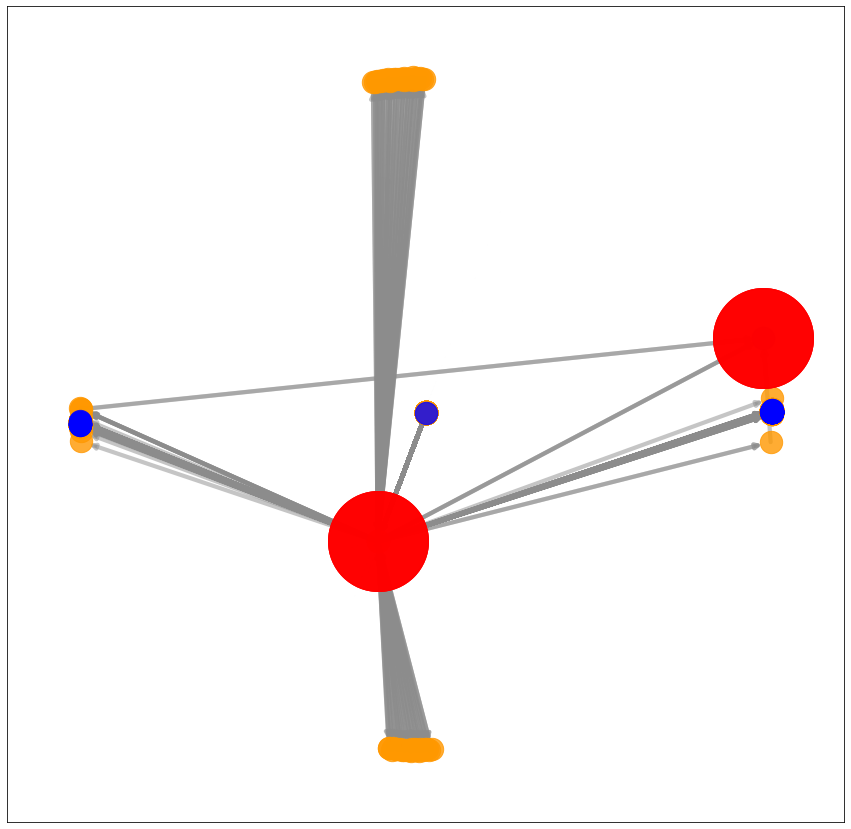

In [ ]:
fig = plt.figure(figsize=(15,15))
pos=nx.kamada_kawai_layout(dfSeed3_Lvl2G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(dfSeed3_Lvl2G,pos,
                       nodelist=people,
                       node_color='#FF9800',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(dfSeed3_Lvl2G,pos,
                       nodelist=items,
                       node_color='b',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(dfSeed3_Lvl2G,pos,
                       nodelist=list(dfSeed3_Lvl1["Source"]) + list(dfSeed3_Lvl1["Target"]),
                       node_color='r',
                       node_size=10000,
                   alpha=0.8)

# edges
# nx.draw_networkx_edges(dfSeed1_Lvl2G,pos,width=1.0,alpha=0.5)
# nx.draw_networkx_edges(dfSeed1_Lvl2G,pos,
#                        edgelist=graph2NodesTuple,
#                        width=2,alpha=0.5,edge_color='k')
nx.draw_networkx_edges(dfSeed3_Lvl2G,pos,
                       edgelist=dfSeed3_Lvl2Tuple,
                       width=4.2,alpha=0.5,edge_color='#8C8C8C')
fig.show()

In [ ]:
images_dir = 'drive/My Drive/images'
fig.savefig(f"{images_dir}/Seed3Level2.png")

#### checking the people connected by eType 4

In [ ]:
dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] == 4]

Empty DataFrame
Columns: [Source, eType, Target, Time, Weight, SourceLocation]
Index: []

In [ ]:
dfSeed3_eT4People = list()
for target in dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 4]["Target"]:
  dfSeed3_eT4People += (list(dfBigGraph[(dfBigGraph['eType'] == 4) & (dfBigGraph['Target'] == target)]["Source"]))

In [ ]:
dfSeed3_eT4People =  list(dict.fromkeys(dfSeed3_eT4People))
print(dfSeed3_eT4People)

#### checking the people connected by eType 0 and 1

In [ ]:
dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] == 0]

Source  eType  Target      Time  Weight  SourceLocation
341874     557387      0  574136  29934736     1.0             NaN
341875     574136      0  539941  29934736     1.0             NaN
499288     630745      0  574136  30248414     1.0             NaN
499289     574136      0  491705  30248414     1.0             NaN
511229     639882      0  574136    812170     1.0             NaN
...           ...    ...     ...       ...     ...             ...
116029025  574136      0  475760  19186332     1.0             NaN
116357631  470408      0  574136  26654884     1.0             NaN
116357632  574136      0  470878  26654884     1.0             NaN
116405858  547689      0  574136   8475538     1.0             NaN
116405859  574136      0  541148   8475538     1.0             NaN

[1423 rows x 6 columns]

In [ ]:
dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] == 1]

Source  eType  Target      Time  Weight  SourceLocation
378499     635193      1  574136   9210880     1.0             3.0
457164     621729      1  574136  17573550     1.0             4.0
511232     574136      1  509037    812170     1.0             4.0
640433     527660      1  574136  29578338     1.0             4.0
650438     553602      1  574136  18318465     1.0             2.0
...           ...    ...     ...       ...     ...             ...
120047872  564496      1  574136  13858739     1.0             0.0
120113726  574136      1  564152  18484291     1.0             4.0
120190290  574136      1  544197  14811872     1.0             4.0
120225512  526243      1  574136  31399723     1.0             4.0
120357065  593417      1  574136  19956046     1.0             0.0

[1954 rows x 6 columns]

In [ ]:
dfSeed3_eT0People = list(dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] == 0]["Source"]) + list(dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] == 0]["Target"])
print(len(dfSeed3_eT0People))

2846


In [ ]:
len(list(dict.fromkeys(dfSeed3_eT0People)))

1407

In [ ]:
dfSeed3_eT1People = list(dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] == 1]["Source"]) + list(dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] == 1]["Target"])
print(len(dfSeed3_eT1People))

3908


In [ ]:
len(list(dict.fromkeys(dfSeed3_eT1People)))

1810

In [ ]:
print(len(list(dfSeed3_eT0People) + list(dfSeed3_eT1People)))

6754


In [ ]:
print(len(list(dict.fromkeys(
    list(dfSeed3_eT0People) + 
    list(dfSeed3_eT1People)
))))

3161


In [ ]:
Seed3_Lvl2G = nx.DiGraph()

In [ ]:
Seed3_Lvl2Tuple = [tuple([x, y]) for x, y in 
                   zip(dfSeed3_Lvl2[(dfSeed3_Lvl2["eType"] == 0) | (dfSeed3_Lvl2["eType"] == 1)]["Source"], 
                       dfSeed3_Lvl2[(dfSeed3_Lvl2["eType"] == 0) | (dfSeed3_Lvl2["eType"] == 1)]["Target"])]

In [ ]:
Seed3_Lvl2G.add_edges_from(Seed3_Lvl2Tuple)

In [ ]:
degree_centralitySeed3_Lvl2 = nx.degree_centrality(Seed3_Lvl2G)

In [ ]:
eigenvector_Seed3_Lvl2 = nx.eigenvector_centrality(Seed3_Lvl2G)

In [ ]:
degree_Seed3_Lvl2 = nx.degree(Seed3_Lvl2G)

In [ ]:
dict(degree_Seed3_Lvl2)

In [ ]:
Seed3_Lvl2Dict = {k: v for k, v in degree_centralitySeed3_Lvl2.items() if v > min(degree_centralitySeed3_Lvl2.values())}

In [ ]:
len({k: v for k, v in dict(degree_Seed3_Lvl2).items() if v > min(dict(degree_Seed3_Lvl2).values())})

48

In [ ]:
len({k: v for k, v in eigenvector_Seed3_Lvl2.items() if v > min(eigenvector_Seed3_Lvl2.values())})

1344

In [ ]:
nx.number_of_nodes(Seed3_Lvl2G)

3161

In [ ]:
len(Seed3_Lvl2Dict)

48

In [ ]:
Seed3_Lvl2Dict.keys()

dict_keys([574136, 546631, 578302, 508047, 513854, 476051, 602415, 513818, 632071, 632676, 580873, 627357, 578978, 551521, 628357, 517607, 499938, 532543, 648724, 630758, 640651, 590909, 645478, 574574, 569693, 623295, 518033, 491003, 521580, 615735, 554701, 624608, 474506, 518238, 483880, 458409, 574683, 577715, 543132, 529752, 568085, 459109, 611786, 504522, 543451, 497954, 483019, 633599])

In [ ]:
Seed3_Lvl2Dict.values()

dict_values([1.014873417721519, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.0006329113924050633, 0.

In [ ]:
dfSeed3_eT01People = list(Seed3_Lvl2Dict.keys())

#### checking the people connected by eType 2 and 3

- Check if the buyers and sellers are all in the graphs
- frequency of buying and selling
- whether they were in our common list

In [ ]:
dfSeed3_Lvl2[(dfSeed3_Lvl2["eType"] == 3) & (dfSeed3_Lvl2["Source"] != int(dfSeed3["Source"]))]

Source  eType  Target      Time  Weight  SourceLocation
7068975   620791      3  657187   1991785   633.0             NaN
50155816  552765      3  657187   6742286   546.0             NaN
52622376  623468      3  657187  22839875    82.0             NaN

In [ ]:
dfSeed3_eT2People = list(dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] == 2]["Source"])

In [ ]:
dfSeed3_eT3People = list(dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] == 3]["Source"])

In [ ]:
print(len(dfSeed3_eT2People), len(dfSeed3_eT3People))

51 59


In [ ]:
len(list(dict.fromkeys(dfSeed3_eT3People)))

4

In [ ]:
dfSeed3_eT2People = list(dict.fromkeys(dfSeed3_eT2People))

In [ ]:
dfSeed3_eT3People = list(dict.fromkeys(dfSeed3_eT3People))


In [ ]:
dfSeed3_eT2People

[574136]

In [ ]:
dfSeed3_eT3People

[574136, 620791, 552765, 623468]

#### checking the people connected by eType 5

In [ ]:
dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] == 5]

In [ ]:
dfCategories = pd.read_csv('drive/My Drive/data/DemographicCategories.csv')

In [ ]:
dfCategories

In [ ]:
for id, category in zip(dfCategories["NodeID"], dfCategories["Category"]):
  print("Is category(", category, ") in the Sources of big graph?  ",  id in dfBigGraph["Source"]) 

In [ ]:
for id, category in zip(dfCategories["NodeID"], dfCategories["Category"]):
  print("Is category(", category, ") in the targets of big graph?  ",  id in dfBigGraph["Target"]) 

NodeID
Category


In [ ]:
dfSeed3_eT5People = list(dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] == 5]["Source"])

In [ ]:
dfCategories["NodeID"][0] in dfBigGraph["Target"]

True

#### checking the people connected by eType 6

In [ ]:
dfSeed3_eT6 = dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] == 6].drop_duplicates()
#sorted()
print(dfSeed3_eT6)

           Source  eType  Target      Time  Weight  SourceLocation
122472294  574136      6  657173   2160000     2.0             4.0
122472295  574136      6  561157  13305600     1.0             4.0
122472296  574136      6  499467  19008000     1.0             3.0
122472297  574136      6  499467  12096000     4.0             4.0


In [ ]:
dfSeed3_eT6People = list()
for target, time, weight, sourceLoc in tqdm(zip(list(dfSeed3_eT6["Target"]), 
                                                list(dfSeed3_eT6["Time"]), 
                                                list(dfSeed3_eT6["Weight"]),
                                                list(dfSeed3_eT6["SourceLocation"]))):
  #print(target, time, weight)
  dfSeed3_eT6People += list(
      dfBigGraph[(dfBigGraph['eType'] == 6) & 
                 (dfBigGraph['Target'] == target) &
                 (dfBigGraph['Time'] == time) &  
                 (dfBigGraph['Weight'] == weight) &
                 (dfBigGraph["SourceLocation"] == sourceLoc)]["Source"])

4it [00:06,  1.61s/it]


In [ ]:
len(dfSeed3_eT6People)

130

In [ ]:
len(list(dict.fromkeys(dfSeed3_eT6People)))

23

In [ ]:
dfSeed3_eT6People = list(dict.fromkeys(dfSeed3_eT6People))

In [ ]:
for target, time, weight, sourceLoc in tqdm(zip(list(dfSeed3_eT6["Target"]), 
                                                list(dfSeed3_eT6["Time"]), 
                                                list(dfSeed3_eT6["Weight"]),
                                                list(dfSeed3_eT6["SourceLocation"]))):

      print(len(dfBigGraph[(dfBigGraph['eType'] == 6) & 
                 (dfBigGraph['Target'] == target) &
                 (dfBigGraph['Time'] == time) &  
                 (dfBigGraph['Weight'] == weight) &
                 (dfBigGraph["SourceLocation"] == sourceLoc)].drop_duplicates()))

1it [00:01,  1.59s/it]

7


2it [00:02,  1.50s/it]

7


3it [00:04,  1.43s/it]

2


4it [00:05,  1.35s/it]

10


#### adding additional channels

In [ ]:
dfSeed3_People = list(dict.fromkeys(dfSeed3_eT01People + dfSeed3_eT3People + dfSeed3_eT4People + dfSeed3_eT6People))

In [ ]:
len(dfSeed3_People)

81

In [ ]:
#dfSeed1GraphNotCommunication.to_csv("drive/My Drive/data/Seed1-Graph2NonCom.csv")

In [ ]:
#for i in range(2,7):
#  print("eType", i, ": ", len(dfSeed1GraphNotCommunication[dfSeed1GraphNotCommunication["eType"] == i]))

#### Calculating the graph network

In [ ]:
pairs = list()
for pair in tqdm(itertools.product(dfSeed3_People, repeat=2)):
  pairs.append(pair)

6561it [00:00, 1189386.20it/s]


In [ ]:
len(pairs)

6561

In [ ]:
dfBigGraph_2 = dfBigGraph[["Source", "Target"]]

In [ ]:
dfBigGraph_2 = dfBigGraph_2[((dfBigGraph_2["Source"] > min(dfSeed3_People)) & 
                             (dfBigGraph_2["Source"] < max(dfSeed3_People))) & 
                            ((dfBigGraph_2["Target"] > min(dfSeed3_People)) & 
                             (dfBigGraph_2["Target"] < max(dfSeed3_People)))]

In [ ]:
len(dfBigGraph_2)

121310070

In [ ]:
print(min(dfSeed3_People), max(dfSeed3_People))

458409 657345


In [ ]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
dfSeed3Graph = dfBigGraph_2[dfBigGraph_2["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfSeed3Graph = dfSeed3Graph.append(dfBigGraph_2[(dfBigGraph_2['Source'] == pairs[i][0]) & (dfBigGraph_2['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 6561/6561 [40:10<00:00,  2.72it/s]


In [ ]:
pairs = list()
for pair in range(len(dfSeed3Graph.drop_duplicates())):
  pairs.append([list(dfSeed3Graph.drop_duplicates()["Source"])[pair], list(dfSeed3Graph.drop_duplicates()["Target"])[pair]])

In [ ]:
print(pairs)

[[574136, 546631], [574136, 578302], [574136, 508047], [574136, 513854], [574136, 476051], [574136, 602415], [574136, 513818], [574136, 632071], [574136, 632676], [574136, 580873], [574136, 627357], [574136, 578978], [574136, 551521], [574136, 628357], [574136, 517607], [574136, 499938], [574136, 532543], [574136, 648724], [574136, 630758], [574136, 640651], [574136, 590909], [574136, 645478], [574136, 574574], [574136, 569693], [574136, 623295], [574136, 518033], [574136, 491003], [574136, 521580], [574136, 615735], [574136, 554701], [574136, 624608], [574136, 474506], [574136, 518238], [574136, 483880], [574136, 574683], [574136, 577715], [574136, 543132], [574136, 529752], [574136, 568085], [574136, 459109], [574136, 611786], [574136, 504522], [574136, 543451], [574136, 497954], [574136, 483019], [574136, 633599], [574136, 620791], [574136, 552765], [574136, 623468], [546631, 574136], [546631, 578978], [546631, 517607], [546631, 532543], [546631, 623295], [546631, 497954], [546631, 

In [ ]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
dfSeed3Graph2 = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfSeed3Graph2 = dfSeed3Graph2.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

In [ ]:
dfSeed3Graph2.to_csv("drive/My Drive/data/Seed3-Graph2Com.csv")

In [ ]:
len(dfSeed3Graph.drop_duplicates())

401

In [ ]:
# dfSeed3Graph.to_csv("drive/My Drive/data/Seed3-Graph2.csv")


In [ ]:
dfSeed3GraphNotCommunication = dfBigGraph[dfBigGraph["Source"] == -1000]
for person in tqdm(list(dict.fromkeys(list(dfSeed3Graph["Source"]) + list(dfSeed3Graph["Target"])))):
  dfSeed3GraphNotCommunication = dfSeed3GraphNotCommunication.append(dfBigGraph[((dfBigGraph["Source"] == person) | 
                                                                                (dfBigGraph["Target"] == person)) &
                                                                                (dfBigGraph["eType"] > 1)])

In [ ]:
for i in range(0,7):
  print("eType", i, ": ", len(dfSeed3GraphNotCommunication[dfSeed3GraphNotCommunication["eType"] == i]))

eType 0 :  0
eType 1 :  0
eType 2 :  2198
eType 3 :  1787
eType 4 :  212
eType 5 :  1461
eType 6 :  1775


In [ ]:
dfSeed3GraphNotCommunication.to_csv("drive/My Drive/data/Seed3-Graph2NonCom.csv")


# Analyzing the Template and graph

In [ ]:
print(list(dfGraph1["Source"]))

[616050, 599956, 599956, 599956, 490041, 490041, 490041, 599956, 490041, 490041, 599956, 599956, 599956, 490041, 599956, 599956, 599956, 490041, 599956, 490041, 490041, 599956, 599956, 490041, 599956, 599956, 599956, 599956, 490041, 490041, 490041, 490041, 490041, 599956, 490041, 490041, 599956, 490041, 599956, 490041, 599956, 490041, 490041, 533140, 568093, 632150, 635665, 616050, 632150, 568093, 533140, 533140, 533140, 568093, 635665, 632150, 635665, 512397, 635665, 635665, 512397, 533140, 635665, 635665, 533140, 568093, 635665, 635665, 635665, 616050, 533140, 568093, 635665, 635665, 512397, 632150, 635665, 616050, 635665, 533140, 533140, 635665, 635665, 512397, 623295, 599956, 599956, 589639, 550287, 550361, 599956, 599956, 550287, 599956, 599956, 596193, 550361, 596193, 599956, 490041, 550361, 512397, 599956, 550287, 623295, 599956, 599956, 568093, 599956, 599956, 599956, 596193, 568093, 623295, 490041, 599956, 616050, 623295, 589639, 568093, 623295, 599956, 490041, 599956, 599956,

In [ ]:
print([(source in dfBigGraph["Source"]) for source in list(dfTemplate["Source"])])

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

In [ ]:
len(dfBigGraph[(dfBigGraph["Source"] == 616050) & (dfBigGraph["eType"] == 6)])

25

In [ ]:
len(dfGraph1[(dfGraph1["Source"] == 616050) & (dfGraph1["eType"] == 6)])

0

In [ ]:
print(list(dfTemplate["Source"]))

[0, 41, 37, 34, 41, 34, 27, 27, 41, 37, 41, 27, 37, 41, 34, 41, 41, 34, 41, 37, 37, 37, 34, 34, 41, 34, 34, 37, 34, 41, 40, 41, 37, 37, 37, 37, 34, 37, 34, 34, 37, 41, 34, 34, 41, 37, 34, 37, 65, 27, 41, 41, 27, 41, 41, 41, 37, 41, 34, 41, 37, 27, 41, 65, 65, 65, 65, 40, 40, 65, 40, 40, 41, 41, 67, 47, 39, 67, 41, 41, 67, 40, 67, 65, 41, 40, 65, 41, 41, 41, 39, 67, 40, 67, 47, 39, 47, 67, 41, 40, 67, 40, 41, 41, 47, 40, 65, 41, 39, 39, 41, 40, 40, 41, 65, 47, 65, 47, 39, 67, 39, 39, 41, 41, 41, 65, 40, 65, 41, 39, 67, 67, 40, 41, 47, 65, 40, 41, 47, 39, 41, 65, 40, 39, 40, 47, 41, 40, 39, 40, 47, 41, 39, 39, 67, 41, 39, 67, 39, 67, 41, 39, 40, 65, 47, 47, 47, 41, 39, 40, 65, 39, 40, 67, 39, 47, 47, 39, 39, 47, 67, 47, 39, 47, 47, 67, 39, 78, 67, 39, 67, 39, 80, 80, 27, 43, 47, 67, 34, 27, 27, 27, 41, 41, 57, 43, 58, 63, 41, 27, 77, 56, 63, 37, 58, 56, 63, 37, 56, 56, 34, 58, 57, 41, 47, 79, 56, 37, 56, 56, 41, 56, 27, 41, 41, 27, 41, 41, 41, 37, 37, 56, 47, 63, 63, 47, 47, 57, 34, 41, 

In [ ]:
dfCategory

NodeID                             Category
0   459381      Water and other public services
1   466907                          Electricity
2   473173                Household furnishings
3   503218                          Natural gas
4   503701                        Miscellaneous
5   510031                                Gifts
6   520660                           Healthcare
7   523927                          Restaurants
8   527449                              Alcohol
9   536346                     Home maintenance
10  537281                Housekeeping supplies
11  552988            Money income before taxes
12  567195      Personal insurance and pensions
13  571970                              Reading
14  575030                       Transportation
15  577992                            Education
16  580426                   Telephone services
17  589943               Lodging away from home
18  595298                            Groceries
19  595581                            Donations
20  606730                        Entertainment
21  616315                 Apparel and services
22  620120                       Personal taxes
23  621924                    Mortgage payments
24  630626                     Rented dwellings
25  632961  Personal care products and services
26  640784                              Tobacco
27  642329                 Household operations
28  644226                       Property taxes

## Graph 1

In [ ]:
people = list()

people = people + list(dict.fromkeys(list(dfGraph1[dfGraph1["eType"] != 5]["Source"]) + 
                                     list(dfGraph1[dfGraph1["eType"] <= 1]["Target"])))

for node in tqdm(list(dict.fromkeys(list(dfGraph1[dfGraph1["eType"] == 5]["Source"]) + 
                                    list(dfGraph1[dfGraph1["eType"] == 5]["Target"])))):
  if(node not in list(dfCategory["NodeID"])):
    people = people + list([node])
print(people)

100%|██████████| 73/73 [00:00<00:00, 31847.74it/s]

[616050, 599956, 490041, 533140, 568093, 632150, 635665, 512397, 623295, 589639, 550287, 550361, 596193, 464459, 629627, 599441, 534034, 585212, 538892, 542965, 492777, 572391, 570411, 640464, 649553, 570284, 643925, 591682, 559657, 493044, 608827, 589639, 530528, 635706, 490041, 554431, 599956, 566342, 548513, 599057, 568093, 464459, 635665, 474199, 475130, 596193, 576641, 550361, 463777, 654763, 529922, 599063, 622296, 512397, 493044, 592414, 575704, 654981, 575859, 640464, 505722, 517273, 492286, 636961, 570411, 623295, 492777, 629717, 502591, 569820, 591682, 632150, 616050, 533140]


In [ ]:
dfGraph1_extended = dfBigGraph[dfBigGraph["Source"] == -1000]
for person in tqdm(people):
  dfGraph1_extended = dfGraph1_extended.append(dfBigGraph[((dfBigGraph["Source"] == person) | 
                                                                                (dfBigGraph["Target"] == person)) &
                                                                                (dfBigGraph["eType"] > 1)])

100%|██████████| 74/74 [00:47<00:00,  1.56it/s]


In [ ]:
len(dfGraph1_extended)

5893

In [ ]:
for i in range(0,7):
  print("eType", i, ": ", len(dfGraph1_extended[dfGraph1_extended["eType"] == i]))

eType 0 :  0
eType 1 :  0
eType 2 :  1135
eType 3 :  1281
eType 4 :  2
eType 5 :  1410
eType 6 :  2065


In [ ]:
dfGraph1_extended2 = dfGraph1_extended.append(dfGraph1CommunicationExtended)

In [ ]:
for i in range(0,7):
  print("eType", i, ": ", len(dfGraph1_extended2[dfGraph1_extended2["eType"] == i]))

eType 0 :  841
eType 1 :  719
eType 2 :  1135
eType 3 :  1281
eType 4 :  2
eType 5 :  1410
eType 6 :  2065


In [ ]:
dfGraph1_extended2.to_csv("drive/My Drive/data/dfGraph1-extended2.csv")


In [ ]:
#pairs 
pairs = list()
for pair in tqdm(itertools.product(people, repeat=2)):
  pairs.append(pair)


5476it [00:00, 903576.41it/s]


In [ ]:
# Creating an empty dfSeed1Graph2 file for our final graph based on seed1 file
dfGraph1CommunicationExtended = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfGraph1CommunicationExtended = dfGraph1CommunicationExtended.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & 
                                                  (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 5476/5476 [34:32<00:00,  2.64it/s]


In [ ]:
dfGraph1CommunicationExtended

Source  eType  Target      Time  Weight  SourceLocation
0     616050      1  533140  10498974     1.0             2.0
1     616050      1  533140   6731066     1.0             2.0
2     616050      1  533140  10924087     1.0             2.0
3     616050      1  533140   7527116     1.0             2.0
4     616050      1  632150   3487438     1.0             2.0
...      ...    ...     ...       ...     ...             ...
1555  533140      1  591682   6064987     1.0             2.0
1556  533140      0  616050  11450444     1.0             NaN
1557  533140      0  616050   4333271     1.0             NaN
1558  533140      0  616050   4201266     1.0             NaN
1559  533140      1  616050   6977386     1.0             2.0

[1560 rows x 6 columns]

In [ ]:
dfGraph1[dfGraph1["eType"] <= 1]

Source  eType  Target  ...  SourceLongitude  TargetLatitude  TargetLongitude
1    599956      0  635665  ...              NaN             NaN              NaN
2    599956      0  490041  ...              NaN             NaN              NaN
3    599956      0  490041  ...              NaN             NaN              NaN
4    490041      0  599956  ...              NaN             NaN              NaN
5    490041      0  599956  ...              NaN             NaN              NaN
..      ...    ...     ...  ...              ...             ...              ...
353  635665      1  570411  ...         -37.8076         32.6654         -48.6701
355  640464      1  635665  ...         -34.5372         29.3296         -37.8076
356  570411      0  635665  ...              NaN             NaN              NaN
357  640464      1  570411  ...         -34.5372         32.6654         -48.6701
358  635665      1  570411  ...         -37.8076         32.6654         -48.6701

[318 rows x 11 columns]

## Graph 2

In [ ]:
people = list()

people = people + list(dict.fromkeys(list(dfGraph2[dfGraph2["eType"] != 5]["Source"]) + 
                                     list(dfGraph2[dfGraph2["eType"] <= 1]["Target"])))

for node in tqdm(list(dict.fromkeys(list(dfGraph2[dfGraph2["eType"] == 5]["Source"]) + 
                                    list(dfGraph2[dfGraph2["eType"] == 5]["Target"])))):
  if(node not in list(dfCategory["NodeID"])):
    people = people + list([node])
print(people)

100%|██████████| 71/71 [00:00<00:00, 23061.69it/s]

[563211, 541017, 572413, 505965, 629627, 515794, 585212, 599441, 582851, 527597, 534034, 644830, 488928, 602912, 477138, 544615, 534449, 639051, 572391, 542965, 635665, 538892, 464459, 568093, 604021, 533094, 606043, 595057, 634181, 548320, 505965, 572413, 515794, 563584, 629627, 534034, 599441, 585212, 536953, 515799, 656156, 552439, 546478, 488928, 602912, 533024, 499312, 464563, 546626, 544615, 533141, 471663, 501047, 534449, 472522, 477138, 475811, 590265, 653390, 573870, 645210, 639051, 582851, 541017, 563211, 527597]


In [ ]:
dfGraph2_extended = dfBigGraph[dfBigGraph["Source"] == -1000]
for person in tqdm(people):
  dfGraph2_extended = dfGraph2_extended.append(dfBigGraph[((dfBigGraph["Source"] == person) | 
                                                                                (dfBigGraph["Target"] == person)) &
                                                                                (dfBigGraph["eType"] > 1)])

100%|██████████| 66/66 [00:41<00:00,  1.60it/s]


In [ ]:
len(dfGraph2_extended)

3976

In [ ]:
for i in range(0,7):
  print("eType", i, ": ", len(dfGraph2_extended[dfGraph2_extended["eType"] == i]))

eType 0 :  0
eType 1 :  0
eType 2 :  451
eType 3 :  566
eType 4 :  8
eType 5 :  1281
eType 6 :  1670


In [ ]:
#pairs 
pairs = list()
for pair in tqdm(itertools.product(people, repeat=2)):
  pairs.append(pair)


4356it [00:00, 976503.91it/s]


In [ ]:
# Creating an empty dfSeed1Graph2 file for our final graph based on seed1 file
dfGraph2CommunicationExtended = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfGraph2CommunicationExtended = dfGraph2CommunicationExtended.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & 
                                                  (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 4356/4356 [27:28<00:00,  2.64it/s]


In [ ]:
dfGraph2CommunicationExtended

Source  eType  Target      Time  Weight  SourceLocation
0     563211      0  629627   8711294     1.0             NaN
1     563211      0  585212   4177530     1.0             NaN
2     563211      0  527597   9409176     1.0             NaN
3     563211      0  527597   7969021     1.0             NaN
4     563211      0  534034   8102282     1.0             NaN
...      ...    ...     ...       ...     ...             ...
1959  527597      1  582851   7261450     1.0             1.0
1960  527597      0  541017  11293594     1.0             NaN
1961  527597      0  541017   9879345     1.0             NaN
1962  527597      0  563211   3050236     1.0             NaN
1963  527597      1  563211   6384799     1.0             1.0

[1964 rows x 6 columns]

In [ ]:
dfGraph2_extended2 = dfGraph2_extended.append(dfGraph2CommunicationExtended)

In [ ]:
for i in range(0,7):
  print("eType", i, ": ", len(dfGraph2_extended2[dfGraph2_extended2["eType"] == i]))

eType 0 :  1114
eType 1 :  850
eType 2 :  451
eType 3 :  566
eType 4 :  8
eType 5 :  1281
eType 6 :  1670


In [ ]:
dfGraph2_extended2.to_csv("drive/My Drive/data/dfGraph2-extended2.csv")


## Graph 3

In [ ]:
people = list()

people = people + list(dict.fromkeys(list(dfGraph3[dfGraph3["eType"] != 5]["Source"]) + 
                                     list(dfGraph3[dfGraph3["eType"] <= 1]["Target"])))

for node in tqdm(list(dict.fromkeys(list(dfGraph3[dfGraph3["eType"] == 5]["Source"]) + 
                                    list(dfGraph3[dfGraph3["eType"] == 5]["Target"])))):
  if(node not in list(dfCategory["NodeID"])):
    people = people + list([node])
print(people)

100%|██████████| 55/55 [00:00<00:00, 28578.63it/s]

[614761, 538892, 500813, 493094, 536003, 521318, 542649, 572391, 541619, 544074, 493652, 516236, 607386, 629627, 585212, 534034, 599441, 542965, 635665, 568093, 464459, 570284, 643925, 649553, 598006, 612711, 643411, 610497, 578531, 657076, 478754, 575295, 568284, 508898, 538892, 572391, 542965, 536951, 466976, 607386, 628223, 516236, 492701, 584736, 520084, 529433, 493094, 604113, 493652, 544074, 541619, 614761, 500813]


In [ ]:
dfGraph3_extended = dfBigGraph[dfBigGraph["Source"] == -1000]
for person in tqdm(people):
  dfGraph3_extended = dfGraph3_extended.append(dfBigGraph[((dfBigGraph["Source"] == person) | 
                                                                                (dfBigGraph["Target"] == person)) &
                                                                                (dfBigGraph["eType"] > 1)])

100%|██████████| 53/53 [00:33<00:00,  1.59it/s]


In [ ]:
len(dfGraph3_extended)

3797

In [ ]:
for i in range(0,7):
  print("eType", i, ": ", len(dfGraph3_extended[dfGraph3_extended["eType"] == i]))

eType 0 :  0
eType 1 :  0
eType 2 :  745
eType 3 :  818
eType 4 :  2
eType 5 :  1024
eType 6 :  1208


In [ ]:
# dfGraph3_extended.to_csv("drive/My Drive/data/dfGraph3-extended.csv")


In [ ]:
#pairs 
pairs = list()
for pair in tqdm(itertools.product(people, repeat=2)):
  pairs.append(pair)


2809it [00:00, 671098.20it/s]


In [ ]:
# Creating an empty dfSeed1Graph2 file for our final graph based on seed1 file
dfGraph3CommunicationExtended = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfGraph3CommunicationExtended = dfGraph3CommunicationExtended.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & 
                                                  (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 2809/2809 [17:43<00:00,  2.64it/s]


In [ ]:
dfGraph3CommunicationExtended

Source  eType  Target      Time  Weight  SourceLocation
0    614761      0  538892   5552690     1.0             NaN
1    614761      1  538892   5568861     1.0             1.0
2    614761      1  500813   2220686     1.0             1.0
3    614761      1  500813   7532107     1.0             1.0
4    614761      1  500813   3346166     1.0             1.0
..      ...    ...     ...       ...     ...             ...
735  500813      0  536951  24734911     1.0             NaN
736  500813      0  614761   5822309     1.0             NaN
737  500813      0  614761   9670356     1.0             NaN
738  500813      0  614761   2380177     1.0             NaN
739  500813      1  614761   3117621     1.0             1.0

[740 rows x 6 columns]

In [ ]:
dfGraph3_extended2 = dfGraph3_extended.append(dfGraph3CommunicationExtended)

In [ ]:
for i in range(0,7):
  print("eType", i, ": ", len(dfGraph3_extended2[dfGraph3_extended2["eType"] == i]))

eType 0 :  433
eType 1 :  307
eType 2 :  745
eType 3 :  818
eType 4 :  2
eType 5 :  1024
eType 6 :  1208


In [ ]:
dfGraph3_extended2.to_csv("drive/My Drive/data/dfGraph3-extended2.csv")


## Graph 4

In [ ]:
people = list()

people = people + list(dict.fromkeys(list(dfGraph4[dfGraph4["eType"] != 5]["Source"]) + 
                                     list(dfGraph4[dfGraph4["eType"] <= 1]["Target"])))

for node in tqdm(list(dict.fromkeys(list(dfGraph4[dfGraph4["eType"] == 5]["Source"]) + 
                                    list(dfGraph4[dfGraph4["eType"] == 5]["Target"])))):
  if(node not in list(dfCategory["NodeID"])):
    people = people + list([node])
print(people)

100%|██████████| 54/54 [00:00<00:00, 33283.24it/s]

[636721, 628320, 546593, 536906, 483005, 601496, 580798, 492850, 639642, 557269, 579305, 584457, 516873, 569329, 544636, 464579, 482012, 566580, 657526, 588172, 585606, 655963, 541907, 611572, 580237, 571369, 596726, 537816, 558089, 459726, 578749, 571670, 500336, 623468, 477374, 611238, 521673, 516393, 645371, 464579, 482012, 492850, 536906, 546593, 569329, 580798, 588172, 636721, 657526, 557269, 655963, 639642, 585606, 571369, 516873, 566580, 477374, 584457, 544636, 483005, 579305, 601496, 628320, 541907]


In [ ]:
dfGraph4_extended = dfBigGraph[dfBigGraph["Source"] == -1000]
for person in tqdm(people):
  dfGraph4_extended = dfGraph4_extended.append(dfBigGraph[((dfBigGraph["Source"] == person) | 
                                                                                (dfBigGraph["Target"] == person)) &
                                                                                (dfBigGraph["eType"] > 1)])

100%|██████████| 64/64 [00:40<00:00,  1.59it/s]


In [ ]:
len(dfGraph4_extended)

10503

In [ ]:
for i in range(0,7):
  print("eType", i, ": ", len(dfGraph4_extended[dfGraph4_extended["eType"] == i]))

eType 0 :  0
eType 1 :  0
eType 2 :  4397
eType 3 :  4025
eType 4 :  0
eType 5 :  1271
eType 6 :  810


In [ ]:
# dfGraph4_extended.to_csv("drive/My Drive/data/dfGraph4-extended.csv")


In [ ]:
#pairs 
pairs = list()
for pair in tqdm(itertools.product(people, repeat=2)):
  pairs.append(pair)


4096it [00:00, 1073473.46it/s]


In [ ]:
# Creating an empty dfSeed1Graph2 file for our final graph based on seed1 file
dfGraph4CommunicationExtended = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfGraph4CommunicationExtended = dfGraph4CommunicationExtended.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & 
                                                  (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 4096/4096 [26:09<00:00,  2.61it/s]


In [ ]:
dfGraph4CommunicationExtended

Source  eType  Target      Time  Weight  SourceLocation
0     636721      0  546593   7373660     1.0             NaN
1     636721      1  536906  25235524     1.0             1.0
2     636721      1  580798  15145416     1.0             1.0
3     636721      0  492850  17810319     1.0             NaN
4     636721      1  557269   2336788     1.0             1.0
...      ...    ...     ...       ...     ...             ...
1030  628320      1  557269    186326     1.0             4.0
1031  628320      1  584457  12672587     1.0             4.0
1032  541907      0  628320  19810824     1.0             NaN
1033  541907      0  516393   6920627     1.0             NaN
1034  541907      0  628320  19810824     1.0             NaN

[1035 rows x 6 columns]

In [ ]:
dfGraph4_extended2 = dfGraph4_extended.append(dfGraph4CommunicationExtended)

In [ ]:
for i in range(0,7):
  print("eType", i, ": ", len(dfGraph4_extended2[dfGraph4_extended2["eType"] == i]))

eType 0 :  427
eType 1 :  608
eType 2 :  4397
eType 3 :  4025
eType 4 :  0
eType 5 :  1271
eType 6 :  810


In [ ]:
dfGraph4_extended2.to_csv("drive/My Drive/data/dfGraph4-extended2.csv")


## Graph 5

In [ ]:
people = list()

people = people + list(dict.fromkeys(list(dfGraph5[dfGraph5["eType"] != 5]["Source"]) + 
                                     list(dfGraph5[dfGraph5["eType"] <= 1]["Target"])))

for node in tqdm(list(dict.fromkeys(list(dfGraph5[dfGraph5["eType"] == 5]["Source"]) + 
                                    list(dfGraph5[dfGraph5["eType"] == 5]["Target"])))):
  if(node not in list(dfCategory["NodeID"])):
    people = people + list([node])
print(people)

100%|██████████| 39/39 [00:00<00:00, 30626.82it/s]

[619322, 594308, 524153, 483784, 549840, 477657, 631903, 573137, 561819, 530990, 483784, 561819, 530990, 619322, 631903, 524153, 549840, 477657, 594308, 573137]


In [ ]:
dfGraph5_extended = dfBigGraph[dfBigGraph["Source"] == -1000]
for person in tqdm(people):
  dfGraph5_extended = dfGraph5_extended.append(dfBigGraph[((dfBigGraph["Source"] == person) | 
                                                                                (dfBigGraph["Target"] == person)) &
                                                                                (dfBigGraph["eType"] > 1)])

100%|██████████| 20/20 [00:12<00:00,  1.59it/s]


In [ ]:
len(dfGraph5_extended)

4674

In [ ]:
for i in range(0,7):
  print("eType", i, ": ", len(dfGraph5_extended[dfGraph5_extended["eType"] == i]))

eType 0 :  0
eType 1 :  0
eType 2 :  2478
eType 3 :  1570
eType 4 :  0
eType 5 :  406
eType 6 :  220


In [ ]:
# dfGraph5_extended.to_csv("drive/My Drive/data/dfGraph5-extended.csv")


In [ ]:
#pairs 
pairs = list()
for pair in tqdm(itertools.product(people, repeat=2)):
  pairs.append(pair)


400it [00:00, 855980.41it/s]


In [ ]:
# Creating an empty dfSeed1Graph2 file for our final graph based on seed1 file
dfGraph5CommunicationExtended = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfGraph5CommunicationExtended = dfGraph5CommunicationExtended.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & 
                                                  (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 400/400 [02:33<00:00,  2.61it/s]


In [ ]:
dfGraph5CommunicationExtended

Source  eType  Target      Time  Weight  SourceLocation
0    619322      0  631903  20434873     1.0             NaN
1    619322      0  530990  28392298     1.0             NaN
2    619322      1  530990   8590844     1.0             3.0
3    619322      0  530990  28392298     1.0             NaN
4    619322      1  530990   8590844     1.0             3.0
..      ...    ...     ...       ...     ...             ...
119  594308      1  477657   2053209     1.0             2.0
120  573137      0  594308  13494250     1.0             NaN
121  573137      1  530990  12960538     1.0             4.0
122  573137      1  530990  12960538     1.0             4.0
123  573137      0  594308  13494250     1.0             NaN

[124 rows x 6 columns]

In [ ]:
dfGraph5_extended2 = dfGraph5_extended.append(dfGraph5CommunicationExtended)

In [ ]:
for i in range(0,7):
  print("eType", i, ": ", len(dfGraph5_extended2[dfGraph5_extended2["eType"] == i]))

eType 0 :  68
eType 1 :  56
eType 2 :  2478
eType 3 :  1570
eType 4 :  0
eType 5 :  406
eType 6 :  220


In [ ]:
dfGraph5_extended2.to_csv("drive/My Drive/data/dfGraph5-extended2.csv")


# Dunamic time warping

In [ ]:
pip install dtw-python


     |████████████████████████████████| 256kB 2.9MB/s 
  Created wheel for dtw-python: filename=dtw_python-1.0.5-cp36-cp36m-linux_x86_64.whl size=499300 sha256=337841fd91cba7bb417b1c08f21e095ee27516ee0111bba0f07e30820745744a
  Stored in directory: /root/.cache/pip/wheels/1d/9c/55/fc62587a4abd6d4fa52f4436a2aa93f322a8e6d2f18809d2fb
Successfully built dtw-python


In [ ]:
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [ ]:
alignment = dtw(np.array([1,2,4,0,9,9,9]), np.array([4, 0, 0, 1, 2, 4, 8]), keep_internals=True)

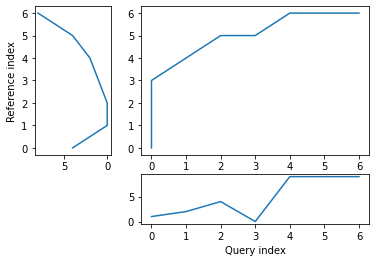

In [ ]:
alignment.plot(type='threeway')

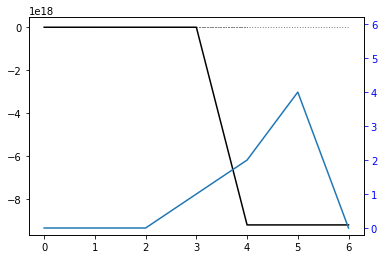

In [ ]:
dtw(np.array([1,2,4,0]), np.array([0, 0, 0, 1, 2, 4, 0]), keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(4, "c")).plot(type="twoway",offset=-2)

In [ ]:
rabinerJuangStepPattern(6, "c")

In [ ]:
np.array([1,2,4])

array([1, 2, 4])

In [ ]:
dfBigGraph[(dfBigGraph["Source"] == 554368) & (dfBigGraph["Target"] == 554368)]

Source  eType  Target      Time  Weight  SourceLocation
2927864    554368      1  554368   7804399     1.0             4.0
16465154   554368      1  554368  29039040     1.0             4.0
17386181   554368      0  554368  14356131     1.0             NaN
21841189   554368      0  554368  26886659     1.0             NaN
23977986   554368      1  554368   2352347     1.0             4.0
26905097   554368      1  554368  15302217     1.0             4.0
29867306   554368      0  554368  25073293     1.0             NaN
33808632   554368      1  554368  25941059     1.0             4.0
37078017   554368      1  554368  27058804     1.0             4.0
40311031   554368      1  554368  12448778     1.0             4.0
41614673   554368      1  554368  19618960     1.0             4.0
51377995   554368      0  554368   2627104     1.0             NaN
52260287   554368      1  554368   7890511     1.0             4.0
59551549   554368      1  554368  12271154     1.0             4.0
62037942   554368      1  554368  25149961     1.0             4.0
62619646   554368      1  554368  12964814     1.0             4.0
67048505   554368      1  554368   3817237     1.0             4.0
68017997   554368      0  554368   2004449     1.0             NaN
76243999   554368      1  554368  20231056     1.0             4.0
80189901   554368      1  554368  22771843     1.0             4.0
82683480   554368      0  554368   8126220     1.0             NaN
86820346   554368      1  554368  15986674     1.0             4.0
96204927   554368      1  554368  14603055     1.0             4.0
96319945   554368      1  554368   2976558     1.0             4.0
102218822  554368      1  554368  16418404     1.0             4.0
102828001  554368      1  554368   6225025     1.0             4.0
107917759  554368      1  554368  18679785     1.0             4.0
108078385  554368      1  554368  17632114     1.0             4.0
117565326  554368      1  554368  25891841     1.0             4.0
119882107  554368      1  554368  16417434     1.0             4.0

# Question 3

In [ ]:
# Sources which are similar to template.
# 487668:S:644830,585212
# 482264:S:595104,570284
# 657187:S:550287,512397

### Procurement Seed 1 

In [146]:
dfProcPair1Source1 = 644830
dfProcPair1Source2 = 585212
dfProcPairItem = 487668
dfProcSeed1_eT3People = [dfProcPair1Source1, dfProcPair1Source2]

In [27]:
# dfProcSeed1_Lvl1 = dfBigGraph[((dfBigGraph['Source'] == int(dfProcPair1Source1)) & 
#                               (dfBigGraph['Target'] == int(dfProcPair1Source1))) |
#                               ((dfBigGraph['Source'] == int(dfProcPair1Source2)) & 
#                               (dfBigGraph['Target'] == int(dfProcPair1Source2)))]  
# There is no communication between this pair of nodes

In [28]:
dfProcSeed1_Lvl1 = dfBigGraph[((dfBigGraph["Source"] == dfProcPair1Source1) | 
                               (dfBigGraph["Source"] == dfProcPair1Source2)) &
                               (dfBigGraph["Target"] == dfProcPairItem)]


In [29]:
dfProcSeed1_Lvl1

Source  eType  Target      Time  Weight  SourceLocation
103916830  644830      2  487668  14271326   495.0             NaN
106510014  644830      2  487668  14896448    52.0             NaN
122998952  644830      2  487668  13302589   958.0             NaN
122998953  585212      3  487668  13302589   958.0             NaN
122998954  644830      2  487668  14314933   213.0             NaN
122998955  585212      3  487668  14314933   213.0             NaN
122998956  644830      2  487668  15936004   276.0             NaN
122998957  585212      3  487668  15936004   276.0             NaN
122998958  644830      2  487668  16227037   245.0             NaN
122998959  585212      3  487668  16227037   245.0             NaN
122998960  644830      2  487668  17764060   213.0             NaN
122998961  585212      3  487668  17764060   213.0             NaN
122998962  644830      2  487668  18425192   581.0             NaN
122998963  585212      3  487668  18425192   581.0             NaN
122998964  644830      2  487668  20170502   209.0             NaN
122998965  585212      3  487668  20170502   209.0             NaN

In [76]:
dfProcSeed1_Lvl2 = dfBigGraph[((dfBigGraph['Source'] == int(dfProcPair1Source1)) | 
                              (dfBigGraph['Target'] == int(dfProcPair1Source1))) |
                              ((dfBigGraph['Source'] == int(dfProcPair1Source2)) | 
                              (dfBigGraph['Target'] == int(dfProcPair1Source2)))]  

In [77]:
# dfProcSeed1_Lvl2[dfProcSeed1_Lvl1["eType"] == 6]
dfProcSeed1_Lvl2

Source  eType  Target      Time  Weight  SourceLocation
299947     489873      1  644830   7552725     1.0             3.0
331767     578812      1  644830  11588719     1.0             2.0
331768     644830      1  634257  11588719     1.0             0.0
415080     585212      1  592700  16370690     1.0             4.0
463078     515079      1  585212   5487483     1.0             0.0
...           ...    ...     ...       ...     ...             ...
123895208  585212      6  509607  17518156     5.0             2.0
123895239  585212      6  625756   4350218     4.0             4.0
123895243  585212      6  657173   4523018     3.0             3.0
123895247  585212      6  499467   6855818     3.0             1.0
123895251  585212      6  509607   6337418     1.0             2.0

[11407 rows x 6 columns]

#### checking the people connected by eType 0 and 1

In [78]:
dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 0]

Source  eType  Target      Time  Weight  SourceLocation
557392     546801      0  585212  28545575     1.0             NaN
557393     585212      0  502611  28545575     1.0             NaN
578002     575672      0  644830  10260042     1.0             NaN
578003     644830      0  586427  10260042     1.0             NaN
824217     648367      0  585212  15412854     1.0             NaN
...           ...    ...     ...       ...     ...             ...
122999285  644830      0  488928  10976634     1.0             NaN
122999286  644830      0  585212   4940501     1.0             NaN
122999287  644830      0  585212   6015112     1.0             NaN
122999288  644830      0  585212   6821216     1.0             NaN
122999289  644830      0  585212  11489905     1.0             NaN

[4567 rows x 6 columns]

In [79]:
dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 1]

Source  eType  Target      Time  Weight  SourceLocation
299947     489873      1  644830   7552725     1.0             3.0
331767     578812      1  644830  11588719     1.0             2.0
331768     644830      1  634257  11588719     1.0             0.0
415080     585212      1  592700  16370690     1.0             4.0
463078     515079      1  585212   5487483     1.0             0.0
...           ...    ...     ...       ...     ...             ...
122999223  582851      1  585212  10332671     1.0             1.0
122999259  527597      1  585212   4954955     1.0             1.0
122999260  527597      1  585212   5005411     1.0             1.0
122999261  527597      1  585212   7574087     1.0             1.0
122999262  527597      1  585212   6751549     1.0             1.0

[6602 rows x 6 columns]

In [80]:
dfProcSeed1_eT0People = list(dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 0]["Source"]) + list(dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 0]["Target"])
print(len(dfProcSeed1_eT0People))

9134


In [81]:
len(list(dict.fromkeys(dfProcSeed1_eT0People)))

4372

In [82]:
dfProcSeed1_eT1People = list(dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 1]["Source"]) + list(dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 1]["Target"])
print(len(dfProcSeed1_eT1People))

13204


In [83]:
len(list(dict.fromkeys(dfProcSeed1_eT1People)))

5945

In [84]:
print(len(list(dfProcSeed1_eT0People) + list(dfProcSeed1_eT1People)))

22338


In [85]:
print(len(list(dict.fromkeys(
    list(dfProcSeed1_eT0People) + 
    list(dfProcSeed1_eT1People)
))))

9958


In [86]:
ProcSeed1_Lvl2G = nx.DiGraph()

In [87]:
ProcSeed1_Lvl2Tuple = [tuple([x, y]) for x, y in 
                   zip(dfProcSeed1_Lvl2[(dfProcSeed1_Lvl2["eType"] == 0) | (dfProcSeed1_Lvl2["eType"] == 1)]["Source"], 
                       dfProcSeed1_Lvl2[(dfProcSeed1_Lvl2["eType"] == 0) | (dfProcSeed1_Lvl2["eType"] == 1)]["Target"])]

In [88]:
ProcSeed1_Lvl2G.add_edges_from(ProcSeed1_Lvl2Tuple)

In [89]:
degree_centralityProcSeed1_Lvl2 = nx.degree_centrality(ProcSeed1_Lvl2G)

In [90]:
eigenvector_ProcSeed1_Lvl2 = nx.eigenvector_centrality(ProcSeed1_Lvl2G)

In [91]:
degree_ProcSeed1_Lvl2 = nx.degree(ProcSeed1_Lvl2G)

In [92]:
print(len(dict(degree_ProcSeed1_Lvl2)), dict(degree_ProcSeed1_Lvl2))

9958 {489873: 2, 644830: 3467, 578812: 1, 634257: 1, 585212: 7041, 592700: 1, 515079: 1, 546801: 1, 502611: 1, 575672: 1, 586427: 2, 490740: 2, 611733: 1, 512061: 1, 496541: 1, 598450: 2, 648367: 1, 626172: 2, 591482: 1, 465041: 1, 477792: 1, 592099: 1, 533199: 2, 618268: 1, 517792: 1, 591327: 1, 593386: 1, 490124: 1, 505535: 1, 608508: 1, 626959: 1, 488068: 1, 510624: 2, 598684: 1, 544052: 1, 502919: 1, 497239: 1, 568815: 1, 509362: 3, 466446: 1, 564977: 1, 614531: 1, 504295: 2, 598315: 1, 568494: 1, 584453: 1, 539795: 1, 484459: 1, 615401: 1, 476725: 1, 630608: 1, 497417: 1, 643389: 1, 568434: 1, 535859: 1, 569371: 1, 485932: 1, 579364: 1, 581836: 2, 591345: 1, 630083: 1, 627362: 1, 468904: 1, 472005: 1, 632735: 2, 570047: 2, 654637: 1, 483535: 2, 512887: 1, 648343: 1, 618876: 2, 540882: 1, 639658: 1, 458449: 1, 558377: 1, 587586: 1, 545432: 1, 611269: 1, 548064: 2, 561132: 2, 657080: 1, 647131: 1, 476061: 1, 607640: 1, 521948: 1, 615265: 1, 585049: 1, 500529: 1, 460608: 1, 650055: 1

In [96]:
len({k: v for k, v in dict(degree_centralityProcSeed1_Lvl2).items() if v > st.mean(dict(degree_centralityProcSeed1_Lvl2).values())})

25

In [95]:
len({k: v for k, v in eigenvector_ProcSeed1_Lvl2.items() if v > st.mean(eigenvector_ProcSeed1_Lvl2.values())})

5690

In [97]:
ProcSeed1_Lvl2Dict = {k: v for k, v in degree_centralityProcSeed1_Lvl2.items() if v > st.mean(degree_centralityProcSeed1_Lvl2.values())}

In [98]:
nx.number_of_nodes(ProcSeed1_Lvl2G)

9958

In [99]:
len(ProcSeed1_Lvl2Dict)

25

In [100]:
ProcSeed1_Lvl2Dict.keys()

dict_keys([644830, 585212, 509362, 462278, 551022, 545018, 494254, 581145, 570191, 572992, 614387, 469276, 518460, 462691, 567506, 590206, 494412, 468900, 488673, 554368, 478080, 594292, 516863, 478093, 488928])

In [101]:
ProcSeed1_Lvl2Dict.values()

dict_values([0.3481972481671186, 0.7071407050316361, 0.00030129557095510696, 0.00040172742794014263, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696, 0.00030129557095510696])

In [102]:
dfProcSeed1_eT01People = list(ProcSeed1_Lvl2Dict.keys())

In [103]:
len(dfProcSeed1_eT01People)

25

In [104]:
print(dfProcPair1Source1 in dfProcSeed1_eT01People, dfProcPair1Source2 in dfProcSeed1_eT01People)

True True


#### checking the people connected by eType 6

In [105]:
dfProcSeed1_eT6 = dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 6].drop_duplicates()
#sorted()
print(dfProcSeed1_eT6)

           Source  eType  Target      Time  Weight  SourceLocation
122685728  585212      6  509607  18057600    -1.0             5.0
122685729  585212      6  616453  28684800     0.0             4.0
122685730  585212      6  509607  19094400    -1.0             2.0
122699956  585212      6  625756  13501606     1.0             4.0
122699960  585212      6  657173  13501606     3.0             3.0
122699964  585212      6  499467  16784806     3.0             1.0
122699968  585212      6  509607  17044006     5.0             2.0
122998656  585212      6  625756  16832347     5.0             4.0
122998660  585212      6  657173  16486747     5.0             3.0
122998664  585212      6  499467  18733147     5.0             1.0
122998668  585212      6  509607  18214747     3.0             2.0
123297668  585212      6  625756  23646474     5.0             4.0
123297672  585212      6  657173  16486747     4.0             3.0
123297676  585212      6  499467  25633674     1.0            

In [ ]:
dfProcSeed1_eT6People = list()
for target, time, weight, sourceLoc in tqdm(zip(list(dfProcSeed1_eT6["Target"]), 
                                                list(dfProcSeed1_eT6["Time"]), 
                                                list(dfProcSeed1_eT6["Weight"]),
                                                list(dfProcSeed1_eT6["SourceLocation"]))):
  #print(target, time, weight)
  dfProcSeed1_eT6People += list(
      dfBigGraph[(dfBigGraph['eType'] == 6) & 
                 (dfBigGraph['Target'] == target) &
                 (dfBigGraph['Time'] == time) &  
                 (dfBigGraph['Weight'] == weight) &
                 (dfBigGraph["SourceLocation"] == sourceLoc)]["Source"])

In [107]:
len(dfProcSeed1_eT6People)

283

In [108]:
len(list(dict.fromkeys(dfProcSeed1_eT6People)))

43

In [110]:
dfProcSeed1_eT6People = list(dict.fromkeys(dfProcSeed1_eT6People))

In [115]:
dfProcSeed1_eT6PeopleShare = list()
for target, time, sourceLoc in tqdm(zip(list(dfProcSeed1_eT6["Target"]), 
                                                list(dfProcSeed1_eT6["Time"]),
                                                list(dfProcSeed1_eT6["SourceLocation"]))):
  #print(target, time, weight)
  dfProcSeed1_eT6PeopleShare += list(
      dfBigGraph[(dfBigGraph['eType'] == 6) & 
                 (dfBigGraph['Target'] == target) &
                 (dfBigGraph['Time'] == time) &
                 (dfBigGraph["SourceLocation"] == sourceLoc)]["Source"])


0it [00:00, ?it/s]
1it [00:01,  1.01s/it]
2it [00:01,  1.03it/s]
3it [00:02,  1.07it/s]
4it [00:03,  1.09it/s]
5it [00:04,  1.12it/s]
6it [00:05,  1.13it/s]
7it [00:06,  1.14it/s]
8it [00:07,  1.15it/s]
9it [00:07,  1.15it/s]
10it [00:08,  1.15it/s]
11it [00:09,  1.15it/s]
12it [00:10,  1.15it/s]
13it [00:11,  1.15it/s]
14it [00:12,  1.15it/s]
15it [00:13,  1.15it/s]
16it [00:13,  1.16it/s]
17it [00:14,  1.16it/s]
18it [00:15,  1.16it/s]
19it [00:16,  1.16it/s]
20it [00:17,  1.16it/s]
21it [00:18,  1.16it/s]
22it [00:19,  1.16it/s]
23it [00:19,  1.15it/s]


In [116]:
len(dfProcSeed1_eT6PeopleShare)

590

In [117]:
len(list(dict.fromkeys(dfProcSeed1_eT6PeopleShare)))

102

In [118]:
dfProcSeed1_eT6PeopleShare = list(dict.fromkeys(dfProcSeed1_eT6PeopleShare))

In [120]:
print(dfProcSeed1_eT6PeopleShare)

[475195, 574889, 518314, 550474, 569775, 498027, 501111, 583598, 505404, 643353, 512759, 491352, 613772, 477102, 569998, 461129, 579110, 492212, 469138, 572724, 514271, 638684, 482646, 611846, 535029, 463277, 561612, 604870, 595190, 496486, 645755, 496041, 592770, 585212, 522187, 544085, 565019, 644179, 586365, 601268, 529049, 535347, 574525, 464175, 477422, 491923, 579271, 570859, 522181, 595111, 615069, 646548, 492936, 538340, 513299, 465345, 570939, 532750, 468754, 550645, 618814, 573603, 535478, 507656, 538540, 465111, 607160, 507330, 560899, 618893, 457634, 582592, 502823, 624755, 518223, 633472, 607147, 597418, 531158, 606484, 477306, 480366, 635458, 465373, 561603, 567214, 528352, 612840, 558922, 578601, 535275, 636142, 480557, 513918, 560455, 603824, 606698, 523968, 509364, 626959, 599441, 534034]


#### checking the people connected by eType 5

In [131]:
dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 5].head()

Source  eType  Target      Time   Weight  SourceLocation
120361036  552988      5  585212  31536000  7023.93             NaN
120361037  585212      5  567195  31536000   313.91             NaN
120361038  585212      5  527449  31536000    91.47             NaN
120361039  585212      5  459381  31536000   213.36             NaN
120361040  585212      5  595298  31536000  1168.03             NaN

In [132]:
dfCategory = pd.read_csv('drive/My Drive/data/DemographicCategories.csv')

In [137]:
people = list()

# people = people + list(dict.fromkeys(list(dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] != 5]["Source"]) + 
#                                      list(dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] <= 1]["Target"])))

for node in tqdm(list(dict.fromkeys(list(dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 5]["Source"]) + 
                                    list(dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 5]["Target"])))):
  if(node not in list(dfCategory["NodeID"])):
    people = people + list([node])
    
print(people)



100%|██████████| 26/26 [00:00<00:00, 42088.73it/s]

[585212, 644830]


In [138]:
print(len(people))

2


In [139]:
dfProcSeed1_Lvl2_eT5People = people

In [140]:
print(dfProcSeed1_Lvl2_eT5People)

[585212, 644830]


In [ ]:
dfCategories["NodeID"][0] in dfBigGraph["Target"]

True

#### checking the people connected by eType 4

In [141]:
dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 4]

Empty DataFrame
Columns: [Source, eType, Target, Time, Weight, SourceLocation]
Index: []

In [143]:
dfProcSeed1_eT4People = list()
for target in dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 4]["Target"]:
  dfProcSeed1_eT4People += (list(dfBigGraph[(dfBigGraph['eType'] == 4) & (dfBigGraph['Target'] == target)]["Source"]))

In [144]:
dfProcSeed1_eT4People =  list(dict.fromkeys(dfProcSeed1_eT4People))
print(dfProcSeed1_eT4People)

[]


#### adding additional channels

In [147]:
dfProcSeed1_People = list(dict.fromkeys(dfProcSeed1_eT01People + dfProcSeed1_eT3People + dfProcSeed1_eT4People + dfProcSeed1_eT6People))

In [174]:
len(dfProcSeed1_eT01People)

25

In [ ]:
#dfSeed1GraphNotCommunication.to_csv("drive/My Drive/data/Seed1-Graph2NonCom.csv")

In [ ]:
#for i in range(2,7):
#  print("eType", i, ": ", len(dfSeed1GraphNotCommunication[dfSeed1GraphNotCommunication["eType"] == i]))

#### Calculating the graph network

In [193]:
pairs = list()
for pair in tqdm(itertools.product(dfProcSeed1_People, repeat=2)):
  pairs.append(pair)

4489it [00:00, 1557210.38it/s]


In [194]:
len(pairs)

4489

In [195]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
tqdm._instances.clear()
dfProcSeed1Graph2 = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfProcSeed1Graph2 = dfProcSeed1Graph2.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 4489/4489 [27:51<00:00,  2.69it/s]


In [196]:
print(len(dfProcSeed1Graph2), dfProcSeed1Graph2)

696      Source  eType  Target      Time  Weight  SourceLocation
0    644830      0  585212  23330170     1.0             NaN
1    644830      0  585212   4940501     1.0             NaN
2    644830      0  585212   6015112     1.0             NaN
3    644830      0  585212   6821216     1.0             NaN
4    644830      0  585212  11489905     1.0             NaN
..      ...    ...     ...       ...     ...             ...
691  509364      1  594292  22326054     1.0             4.0
692  509364      0  516863  17636846     1.0             NaN
693  509364      0  516863  22399700     1.0             NaN
694  534034      0  585212   5906427     1.0             NaN
695  534034      0  462691  25707882     1.0             NaN

[696 rows x 6 columns]


In [197]:
dfProcGraph1_eT01People = list(list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 0]["Source"]) + 
                               list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 0]["Target"]) +
                               list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 1]["Source"]) + 
                               list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 1]["Target"]))
print(len(dfProcGraph1_eT01People))

1392


In [198]:
len(list(dict.fromkeys(dfProcGraph1_eT01People)))

65

In [199]:
dfProcGraph1_eT01People = list(dict.fromkeys(dfProcGraph1_eT01People))

In [200]:
dfProcSeed1Graph2.to_csv("drive/My Drive/data/ProcSeed1-GraphCom.csv")

In [170]:
len(dfProcSeed1Graph2.drop_duplicates())

696

#### only the communication people

In [175]:
pairs = list()
for pair in tqdm(itertools.product(dfProcSeed1_eT01People, repeat=2)):
  pairs.append(pair)



625it [00:00, 969109.06it/s]


In [176]:
len(pairs)

625

In [ ]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
dfProcSeed1Graph2 = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfProcSeed1Graph2 = dfProcSeed1Graph2.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

In [178]:
print(len(dfProcSeed1Graph2), dfProcSeed1Graph2)

467      Source  eType  Target      Time  Weight  SourceLocation
0    644830      0  585212  23330170     1.0             NaN
1    644830      0  585212   4940501     1.0             NaN
2    644830      0  585212   6015112     1.0             NaN
3    644830      0  585212   6821216     1.0             NaN
4    644830      0  585212  11489905     1.0             NaN
..      ...    ...     ...       ...     ...             ...
462  488928      0  585212   6002958     1.0             NaN
463  488928      0  585212   6359006     1.0             NaN
464  488928      0  585212   6703224     1.0             NaN
465  488928      0  585212   7127283     1.0             NaN
466  488928      0  570191  15072503     1.0             NaN

[467 rows x 6 columns]


In [179]:
dfProcGraph1_eT01People = list(list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 0]["Source"]) + 
                               list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 0]["Target"]) +
                               list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 1]["Source"]) + 
                               list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 1]["Target"]))
print(len(dfProcGraph1_eT01People))

934


In [180]:
len(list(dict.fromkeys(dfProcGraph1_eT01People)))

25

In [ ]:
dfProcGraph1_eT01People = list(dict.fromkeys(dfProcGraph1_eT01People))

In [182]:
dfProcSeed1Graph2.to_csv("drive/My Drive/data/ProcSeed1-GraphCom2.csv")

In [190]:
tqdm._instances.clear()

In [191]:
dfProcSeed1Graph2GraphNotCommunication = dfBigGraph[dfBigGraph["Source"] == -1000]
for person in tqdm(list(dict.fromkeys(list(dfProcSeed1Graph2["Source"]) + list(dfProcSeed1Graph2["Target"])))):
  dfProcSeed1Graph2GraphNotCommunication = dfProcSeed1Graph2GraphNotCommunication.append(dfBigGraph[((dfBigGraph["Source"] == person) | 
                                                                                (dfBigGraph["Target"] == person)) &
                                                                                (dfBigGraph["eType"] > 1)])

365it [2:42:47, 26.76s/it]
100%|██████████| 25/25 [00:16<00:00,  1.56it/s]


In [187]:
for i in range(0,7):
  print("eType", i, ": ", len(dfProcSeed1Graph2GraphNotCommunication[dfProcSeed1Graph2GraphNotCommunication["eType"] == i]))

eType 0 :  0
eType 1 :  0
eType 2 :  2145
eType 3 :  2717
eType 4 :  0
eType 5 :  500
eType 6 :  545


In [189]:
dfProcSeed1Graph2GraphNotCommunication.to_csv("drive/My Drive/data/dfProcSeed1-Graph2NonCom2.csv")


### Procurement Seed 2 

In [201]:
dfProcPair2Source1 = 595104
dfProcPair2Source2 = 570284
dfProcPair2Item = 482264
dfProcSeed2_eT3People = [dfProcPair2Source1, dfProcPair2Source2]

In [ ]:
# dfProcSeed1_Lvl1 = dfBigGraph[((dfBigGraph['Source'] == int(dfProcPair1Source1)) & 
#                               (dfBigGraph['Target'] == int(dfProcPair1Source1))) |
#                               ((dfBigGraph['Source'] == int(dfProcPair1Source2)) & 
#                               (dfBigGraph['Target'] == int(dfProcPair1Source2)))]  
# There is no communication between this pair of nodes

In [202]:
dfProcSeed2_Lvl1 = dfBigGraph[((dfBigGraph["Source"] == dfProcPair2Source1) | 
                               (dfBigGraph["Source"] == dfProcPair2Source2)) &
                               (dfBigGraph["Target"] == dfProcPair2Item)]


In [203]:
dfProcSeed2_Lvl1

Source  eType  Target      Time  Weight  SourceLocation
122401210  595104      2  482264  10728949   298.0             NaN
122401211  570284      3  482264  10728949   298.0             NaN
122401212  595104      2  482264  12833338   109.0             NaN
122401213  570284      3  482264  12833338   109.0             NaN
122401214  595104      2  482264  12984768   116.0             NaN
122401215  570284      3  482264  12984768   116.0             NaN
122401216  595104      2  482264  14838769   319.0             NaN
122401217  570284      3  482264  14838769   319.0             NaN
122401218  595104      2  482264  15685418   623.0             NaN
122401219  570284      3  482264  15685418   623.0             NaN
122401220  595104      2  482264  16460993   333.0             NaN
122401221  570284      3  482264  16460993   333.0             NaN
122401233  595104      2  482264  16488049   648.0             NaN
122401234  570284      3  482264  16488049   648.0             NaN
122401235  595104      2  482264  18505321   759.0             NaN
122401236  570284      3  482264  18505321   759.0             NaN
122401237  595104      2  482264  20858864   334.0             NaN
122401238  570284      3  482264  20858864   334.0             NaN

In [204]:
dfProcSeed2_Lvl2 = dfBigGraph[((dfBigGraph['Source'] == int(dfProcPair2Source1)) | 
                              (dfBigGraph['Target'] == int(dfProcPair2Source1))) |
                              ((dfBigGraph['Source'] == int(dfProcPair2Source2)) | 
                              (dfBigGraph['Target'] == int(dfProcPair2Source2)))]  

In [205]:
# dfProcSeed1_Lvl2[dfProcSeed1_Lvl1["eType"] == 6]
dfProcSeed2_Lvl2

Source  eType  Target      Time   Weight  SourceLocation
278589     457529      1  595104  23168164      1.0             1.0
278591     595104      3  513034  23168164     67.0             NaN
319350     565261      1  595104  29560739      1.0             0.0
319352     595104      3  596301  29560739  13586.0             NaN
319353     595104      1  646853  29560739      1.0             4.0
...           ...    ...     ...       ...      ...             ...
123895179  570284      6  561157  28663756      6.0             3.0
123895182  570284      6  616453  28231756      2.0             0.0
123895216  570284      6  509607  14977418      6.0             5.0
123895219  570284      6  625756  16273418      1.0             4.0
123895224  570284      6  616453  17915018      4.0             0.0

[13447 rows x 6 columns]

#### checking the people connected by eType 0 and 1

In [206]:
dfProcSeed2_Lvl2[dfProcSeed2_Lvl2["eType"] == 0]

Source  eType  Target      Time  Weight  SourceLocation
385589     629563      0  595104    180970     1.0             NaN
385590     595104      0  513999    180970     1.0             NaN
429946     595104      0  521154  29934726     1.0             NaN
443710     620625      0  595104   1489353     1.0             NaN
456060     457689      0  595104  10482241     1.0             NaN
...           ...    ...     ...       ...     ...             ...
122401651  595104      0  570284  18787629     1.0             NaN
122401652  595104      0  570284  19520139     1.0             NaN
122401653  595104      0  570284  21026318     1.0             NaN
122401654  595104      0  570284  21443821     1.0             NaN
122401655  595104      0  570284  22233404     1.0             NaN

[5275 rows x 6 columns]

In [207]:
dfProcSeed2_Lvl2[dfProcSeed2_Lvl2["eType"] == 1]

Source  eType  Target      Time  Weight  SourceLocation
278589     457529      1  595104  23168164     1.0             1.0
319350     565261      1  595104  29560739     1.0             0.0
319353     595104      1  646853  29560739     1.0             4.0
339418     585001      1  595104  11899227     1.0             1.0
339419     595104      1  557387  11899227     1.0             4.0
...           ...    ...     ...       ...     ...             ...
122401298  649553      1  570284   4809685     1.0             5.0
122401299  649553      1  570284   7180621     1.0             5.0
122401300  649553      1  570284   5487004     1.0             5.0
122401625  593266      1  570284  10514139     1.0             5.0
122401626  593266      1  570284   1785522     1.0             5.0

[7649 rows x 6 columns]

In [208]:
dfProcSeed2_eT0People = list(dfProcSeed2_Lvl2[dfProcSeed2_Lvl2["eType"] == 0]["Source"]) + list(dfProcSeed2_Lvl2[dfProcSeed2_Lvl2["eType"] == 0]["Target"])
print(len(dfProcSeed2_eT0People))

10550


In [209]:
len(list(dict.fromkeys(dfProcSeed2_eT0People)))

4930

In [210]:
dfProcSeed2_eT1People = list(dfProcSeed2_Lvl2[dfProcSeed2_Lvl2["eType"] == 1]["Source"]) + list(dfProcSeed2_Lvl2[dfProcSeed2_Lvl2["eType"] == 1]["Target"])
print(len(dfProcSeed2_eT1People))

15298


In [211]:
len(list(dict.fromkeys(dfProcSeed2_eT1People)))

6695

In [212]:
print(len(list(dfProcSeed2_eT0People) + list(dfProcSeed2_eT1People)))

25848


In [213]:
print(len(list(dict.fromkeys(
    list(dfProcSeed2_eT0People) + 
    list(dfProcSeed2_eT1People)
))))

10954


In [214]:
ProcSeed2_Lvl2G = nx.DiGraph()

In [215]:
ProcSeed2_Lvl2Tuple = [tuple([x, y]) for x, y in 
                   zip(dfProcSeed2_Lvl2[(dfProcSeed2_Lvl2["eType"] == 0) | (dfProcSeed2_Lvl2["eType"] == 1)]["Source"], 
                       dfProcSeed2_Lvl2[(dfProcSeed2_Lvl2["eType"] == 0) | (dfProcSeed2_Lvl2["eType"] == 1)]["Target"])]

In [216]:
ProcSeed2_Lvl2G.add_edges_from(ProcSeed2_Lvl2Tuple)

In [217]:
degree_centralityProcSeed2_Lvl2 = nx.degree_centrality(ProcSeed2_Lvl2G)

In [218]:
eigenvector_ProcSeed2_Lvl2 = nx.eigenvector_centrality(ProcSeed2_Lvl2G)

In [219]:
degree_ProcSeed2_Lvl2 = nx.degree(ProcSeed2_Lvl2G)

In [220]:
print(len(dict(degree_ProcSeed2_Lvl2)), dict(degree_ProcSeed2_Lvl2))

10954 {457529: 1, 595104: 10676, 565261: 1, 646853: 1, 585001: 1, 557387: 2, 629563: 1, 513999: 1, 499400: 1, 647424: 2, 592700: 1, 485973: 1, 521154: 1, 620625: 2, 457689: 1, 621729: 2, 527555: 1, 585830: 1, 525306: 1, 610617: 1, 589596: 1, 648536: 1, 517198: 1, 627966: 1, 499776: 1, 588805: 1, 531206: 1, 491763: 1, 532773: 2, 512382: 1, 622045: 1, 594649: 1, 584024: 1, 511104: 1, 608605: 1, 583613: 1, 598542: 1, 531369: 1, 647463: 1, 634417: 1, 520816: 1, 624002: 1, 462508: 1, 520105: 1, 539994: 1, 549477: 1, 499759: 1, 653377: 1, 466356: 1, 494406: 1, 479763: 2, 468318: 1, 542487: 1, 481455: 1, 637351: 1, 461870: 1, 605052: 1, 505751: 1, 537865: 1, 563610: 1, 578156: 1, 567390: 1, 482234: 1, 540723: 1, 538877: 1, 638123: 1, 459219: 1, 608657: 1, 574384: 1, 607296: 1, 505926: 1, 573835: 1, 591631: 1, 466493: 1, 559522: 1, 618470: 1, 542675: 1, 495036: 1, 619748: 1, 479964: 1, 656138: 1, 628558: 1, 587365: 1, 555775: 1, 491240: 1, 509938: 1, 598874: 1, 640575: 1, 520354: 1, 656878: 1,

In [221]:
len({k: v for k, v in dict(degree_centralityProcSeed2_Lvl2).items() if v > st.mean(dict(degree_centralityProcSeed2_Lvl2).values())})

17

In [222]:
len({k: v for k, v in eigenvector_ProcSeed2_Lvl2.items() if v > st.mean(eigenvector_ProcSeed2_Lvl2.values())})

4435

In [224]:
ProcSeed2_Lvl2Dict = {k: v for k, v in degree_centralityProcSeed2_Lvl2.items() if v > st.mean(degree_centralityProcSeed2_Lvl2.values())}

In [225]:
nx.number_of_nodes(ProcSeed2_Lvl2G)

10954

In [226]:
len(ProcSeed2_Lvl2Dict)

17

In [227]:
ProcSeed2_Lvl2Dict.keys()

dict_keys([595104, 570284, 554368, 571162, 627442, 513131, 562221, 592583, 514670, 488673, 564757, 475958, 517785, 523773, 506614, 472776, 546999])

In [228]:
ProcSeed2_Lvl2Dict.values()

dict_values([0.9747101250798869, 0.09066009312517119, 0.0002738975623116954, 0.0002738975623116954, 0.0002738975623116954, 0.0002738975623116954, 0.0002738975623116954, 0.0002738975623116954, 0.0002738975623116954, 0.00036519674974892725, 0.0002738975623116954, 0.0002738975623116954, 0.0002738975623116954, 0.0002738975623116954, 0.0002738975623116954, 0.0002738975623116954, 0.00036519674974892725])

In [229]:
dfProcSeed2_eT01People = list(ProcSeed2_Lvl2Dict.keys())

In [230]:
len(dfProcSeed2_eT01People)

17

In [231]:
print(dfProcPair2Source1 in dfProcSeed2_eT01People, dfProcPair2Source2 in dfProcSeed2_eT01People)

True True


#### checking the people connected by eType 6

In [232]:
dfProcSeed2_eT6 = dfProcSeed2_Lvl2[dfProcSeed2_Lvl2["eType"] == 6].drop_duplicates()
#sorted()
print(dfProcSeed2_eT6)

           Source  eType  Target      Time  Weight  SourceLocation
122699932  570284      6  509607  26375206     2.0             5.0
122699935  570284      6  625756  25338406     3.0             4.0
122699938  570284      6  561157  28189606     1.0             3.0
122699941  570284      6  616453  28362406     3.0             0.0
122998632  570284      6  509607  26681947     1.0             5.0
122998635  570284      6  625756  25338406     1.0             4.0
122998638  570284      6  561157  30224347     2.0             3.0
122998641  570284      6  616453  29446747     5.0             0.0
123297653  570284      6  509607  26375206     4.0             5.0
123596362  570284      6  509607  24948556     1.0             5.0
123596365  570284      6  625756  26503756     4.0             4.0
123596368  570284      6  561157  28663756     6.0             3.0
123596371  570284      6  616453  28231756     2.0             0.0
123895216  570284      6  509607  14977418     6.0            

In [233]:
dfProcSeed2_eT6People = list()
for target, time, weight, sourceLoc in tqdm(zip(list(dfProcSeed2_eT6["Target"]), 
                                                list(dfProcSeed2_eT6["Time"]), 
                                                list(dfProcSeed2_eT6["Weight"]),
                                                list(dfProcSeed2_eT6["SourceLocation"]))):
  #print(target, time, weight)
  dfProcSeed2_eT6People += list(
      dfBigGraph[(dfBigGraph['eType'] == 6) & 
                 (dfBigGraph['Target'] == target) &
                 (dfBigGraph['Time'] == time) &  
                 (dfBigGraph['Weight'] == weight) &
                 (dfBigGraph["SourceLocation"] == sourceLoc)]["Source"])

16it [00:18,  1.18s/it]


In [236]:
len(dfProcSeed2_eT6People)

54

In [237]:
len(list(dict.fromkeys(dfProcSeed2_eT6People)))

2

In [238]:
dfProcSeed2_eT6People = list(dict.fromkeys(dfProcSeed2_eT6People))

In [239]:
dfProcSeed2_eT6PeopleShare = list()
for target, time, sourceLoc in tqdm(zip(list(dfProcSeed2_eT6["Target"]), 
                                        list(dfProcSeed2_eT6["Time"]),
                                        list(dfProcSeed2_eT6["SourceLocation"]))):
  #print(target, time, weight)
  dfProcSeed2_eT6PeopleShare += list(
      dfBigGraph[(dfBigGraph['eType'] == 6) & 
                 (dfBigGraph['Target'] == target) &
                 (dfBigGraph['Time'] == time) &
                 (dfBigGraph["SourceLocation"] == sourceLoc)]["Source"])

16it [00:13,  1.15it/s]


In [241]:
len(dfProcSeed2_eT6PeopleShare)

73

In [242]:
len(list(dict.fromkeys(dfProcSeed2_eT6PeopleShare)))

2

In [243]:
dfProcSeed2_eT6PeopleShare = list(dict.fromkeys(dfProcSeed2_eT6PeopleShare))

In [244]:
print(dfProcSeed2_eT6PeopleShare)

[570284, 649553]


#### checking the people connected by eType 5

In [245]:
dfProcSeed2_Lvl2[dfProcSeed2_Lvl2["eType"] == 5].head()

Source  eType  Target      Time   Weight  SourceLocation
120359437  552988      5  570284  31536000  5332.43             NaN
120359438  570284      5  527449  31536000   184.70             NaN
120359439  570284      5  459381  31536000   227.80             NaN
120359440  570284      5  595298  31536000   997.95             NaN
120359441  570284      5  577992  31536000  2014.79             NaN

In [246]:
dfCategory = pd.read_csv('drive/My Drive/data/DemographicCategories.csv')

In [247]:
people = list()

# people = people + list(dict.fromkeys(list(dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] != 5]["Source"]) + 
#                                      list(dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] <= 1]["Target"])))

for node in tqdm(list(dict.fromkeys(list(dfProcSeed2_Lvl2[dfProcSeed2_Lvl2["eType"] == 5]["Source"]) + 
                                    list(dfProcSeed2_Lvl2[dfProcSeed2_Lvl2["eType"] == 5]["Target"])))):
  if(node not in list(dfCategory["NodeID"])):
    people = people + list([node])
    
print(people)

100%|██████████| 26/26 [00:00<00:00, 29593.46it/s]

[570284, 595104]


In [251]:
print(len(people))

2


In [249]:
dfProcSeed1_Lvl2_eT5People = people

In [250]:
print(dfProcSeed1_Lvl2_eT5People)

[570284, 595104]


In [252]:
dfCategories["NodeID"][0] in dfBigGraph["Target"]

True

#### checking the people connected by eType 4

In [253]:
dfProcSeed2_Lvl2[dfProcSeed2_Lvl2["eType"] == 4]

Empty DataFrame
Columns: [Source, eType, Target, Time, Weight, SourceLocation]
Index: []

In [257]:
dfProcSeed2_eT4People = list()
for target in dfProcSeed2_Lvl2[dfProcSeed2_Lvl2["eType"] == 4]["Target"]:
  dfProcSeed2_eT4People += (list(dfBigGraph[(dfBigGraph['eType'] == 4) & (dfBigGraph['Target'] == target)]["Source"]))

In [258]:
dfProcSeed2_eT4People =  list(dict.fromkeys(dfProcSeed2_eT4People))
print(dfProcSeed2_eT4People)

[]


#### adding additional channels

In [259]:
dfProcSeed2_People = list(dict.fromkeys(dfProcSeed2_eT01People + dfProcSeed2_eT3People + dfProcSeed2_eT4People + dfProcSeed2_eT6People))

In [261]:
len(dfProcSeed2_eT01People)

17

In [ ]:
#dfSeed1GraphNotCommunication.to_csv("drive/My Drive/data/Seed1-Graph2NonCom.csv")

In [ ]:
#for i in range(2,7):
#  print("eType", i, ": ", len(dfSeed1GraphNotCommunication[dfSeed1GraphNotCommunication["eType"] == i]))

#### Calculating the graph network

In [262]:
pairs = list()
for pair in tqdm(itertools.product(dfProcSeed2_People, repeat=2)):
  pairs.append(pair)

324it [00:00, 747911.12it/s]


In [263]:
len(pairs)

324

In [264]:
# Creating an empty dfProcSeed2Graph2 file for our final graph based on seed1 file
tqdm._instances.clear()
dfProcSeed2Graph2 = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfProcSeed2Graph2 = dfProcSeed2Graph2.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 324/324 [02:02<00:00,  2.65it/s]


In [266]:
print(len(dfProcSeed2Graph2), dfProcSeed2Graph2)

270      Source  eType  Target      Time  Weight  SourceLocation
0    595104      0  570284   4127705     1.0             NaN
1    595104      0  570284   4449397     1.0             NaN
2    595104      0  570284   5279726     1.0             NaN
3    595104      0  570284   5336740     1.0             NaN
4    595104      0  570284   5392604     1.0             NaN
..      ...    ...     ...       ...     ...             ...
265  649553      1  546999  25413436     1.0             5.0
266  649553      1  546999  25715603     1.0             5.0
267  649553      1  546999  24842318     1.0             5.0
268  649553      1  546999  26211328     1.0             5.0
269  649553      1  546999  25831228     1.0             5.0

[270 rows x 6 columns]


In [267]:
dfProcGraph2_eT01People = list(list(dfProcSeed2Graph2[dfProcSeed2Graph2["eType"] == 0]["Source"]) + 
                               list(dfProcSeed2Graph2[dfProcSeed2Graph2["eType"] == 0]["Target"]) +
                               list(dfProcSeed2Graph2[dfProcSeed2Graph2["eType"] == 1]["Source"]) + 
                               list(dfProcSeed2Graph2[dfProcSeed2Graph2["eType"] == 1]["Target"]))
print(len(dfProcGraph2_eT01People))

540


In [268]:
len(list(dict.fromkeys(dfProcGraph2_eT01People)))

18

In [269]:
dfProcGraph2_eT01People = list(dict.fromkeys(dfProcGraph2_eT01People))

In [271]:
len(dfProcSeed2Graph2.drop_duplicates())

270

In [272]:
dfProcSeed2Graph2 = dfProcSeed2Graph2.drop_duplicates()

In [273]:
dfProcSeed2Graph2.to_csv("drive/My Drive/data/ProcSeed2-GraphCom.csv")

#### only the communication people
NOT Necessary

In [ ]:
pairs = list()
for pair in tqdm(itertools.product(dfProcSeed1_eT01People, repeat=2)):
  pairs.append(pair)



625it [00:00, 969109.06it/s]


In [ ]:
len(pairs)

625

In [ ]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
dfProcSeed1Graph2 = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfProcSeed1Graph2 = dfProcSeed1Graph2.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

In [ ]:
print(len(dfProcSeed1Graph2), dfProcSeed1Graph2)

467      Source  eType  Target      Time  Weight  SourceLocation
0    644830      0  585212  23330170     1.0             NaN
1    644830      0  585212   4940501     1.0             NaN
2    644830      0  585212   6015112     1.0             NaN
3    644830      0  585212   6821216     1.0             NaN
4    644830      0  585212  11489905     1.0             NaN
..      ...    ...     ...       ...     ...             ...
462  488928      0  585212   6002958     1.0             NaN
463  488928      0  585212   6359006     1.0             NaN
464  488928      0  585212   6703224     1.0             NaN
465  488928      0  585212   7127283     1.0             NaN
466  488928      0  570191  15072503     1.0             NaN

[467 rows x 6 columns]


In [ ]:
dfProcGraph1_eT01People = list(list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 0]["Source"]) + 
                               list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 0]["Target"]) +
                               list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 1]["Source"]) + 
                               list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 1]["Target"]))
print(len(dfProcGraph1_eT01People))

934


In [ ]:
len(list(dict.fromkeys(dfProcGraph1_eT01People)))

25

In [ ]:
dfProcGraph1_eT01People = list(dict.fromkeys(dfProcGraph1_eT01People))

In [ ]:
dfProcSeed1Graph2.to_csv("drive/My Drive/data/ProcSeed1-GraphCom2.csv")

In [ ]:
tqdm._instances.clear()

In [ ]:
dfProcSeed1Graph2GraphNotCommunication = dfBigGraph[dfBigGraph["Source"] == -1000]
for person in tqdm(list(dict.fromkeys(list(dfProcSeed1Graph2["Source"]) + list(dfProcSeed1Graph2["Target"])))):
  dfProcSeed1Graph2GraphNotCommunication = dfProcSeed1Graph2GraphNotCommunication.append(dfBigGraph[((dfBigGraph["Source"] == person) | 
                                                                                (dfBigGraph["Target"] == person)) &
                                                                                (dfBigGraph["eType"] > 1)])

365it [2:42:47, 26.76s/it]
100%|██████████| 25/25 [00:16<00:00,  1.56it/s]


In [ ]:
for i in range(0,7):
  print("eType", i, ": ", len(dfProcSeed1Graph2GraphNotCommunication[dfProcSeed1Graph2GraphNotCommunication["eType"] == i]))

eType 0 :  0
eType 1 :  0
eType 2 :  2145
eType 3 :  2717
eType 4 :  0
eType 5 :  500
eType 6 :  545


In [ ]:
dfProcSeed1Graph2GraphNotCommunication.to_csv("drive/My Drive/data/dfProcSeed1-Graph2NonCom2.csv")


### Procurement Seed 3 

In [274]:
dfProcPair3Source1 = 550287
dfProcPair3Source2 = 512397
dfProcPair3Item = 657187
dfProcSeed3_eT3People = [dfProcPair3Source1, dfProcPair3Source2]

In [ ]:
# dfProcSeed1_Lvl1 = dfBigGraph[((dfBigGraph['Source'] == int(dfProcPair1Source1)) & 
#                               (dfBigGraph['Target'] == int(dfProcPair1Source1))) |
#                               ((dfBigGraph['Source'] == int(dfProcPair1Source2)) & 
#                               (dfBigGraph['Target'] == int(dfProcPair1Source2)))]  
# There is no communication between this pair of nodes

In [276]:
dfProcSeed3_Lvl1 = dfBigGraph[((dfBigGraph["Source"] == dfProcPair3Source1) | 
                               (dfBigGraph["Source"] == dfProcPair3Source2)) &
                               (dfBigGraph["Target"] == dfProcPair3Item)]


In [277]:
dfProcSeed3_Lvl1

Source  eType  Target      Time  Weight  SourceLocation
36227444   550287      2  657187  12279748   704.0             NaN
37886047   550287      2  657187  21168438   196.0             NaN
42909121   550287      2  657187   6137749   205.0             NaN
57587808   550287      2  657187  14031909   839.0             NaN
91993453   550287      2  657187  13142151    17.0             NaN
122700187  550287      2  657187  10250285   170.0             NaN
122700188  512397      3  657187  10250285   170.0             NaN
122700189  550287      2  657187  12459732   314.0             NaN
122700190  512397      3  657187  12459732   314.0             NaN
122700191  550287      2  657187  14490022   445.0             NaN
122700192  512397      3  657187  14490022   445.0             NaN
122700193  550287      2  657187  16267662   792.0             NaN
122700194  512397      3  657187  16267662   792.0             NaN
122700195  550287      2  657187  16758558   331.0             NaN
122700196  512397      3  657187  16758558   331.0             NaN
122700197  550287      2  657187  17614335   430.0             NaN
122700198  512397      3  657187  17614335   430.0             NaN
122700199  550287      2  657187  17671007   122.0             NaN
122700200  512397      3  657187  17671007   122.0             NaN

In [283]:
dfProcSeed3_Lvl2 = dfBigGraph[((dfBigGraph['Source'] == int(dfProcPair3Source1)) | 
                              (dfBigGraph['Target'] == int(dfProcPair3Source1))) |
                              ((dfBigGraph['Source'] == int(dfProcPair3Source2)) | 
                              (dfBigGraph['Target'] == int(dfProcPair3Source2)))]  

In [284]:
# dfProcSeed1_Lvl2[dfProcSeed1_Lvl1["eType"] == 6]
dfProcSeed3_Lvl2

Source  eType  Target      Time  Weight  SourceLocation
280204     609500      1  550287  10985425     1.0             4.0
280206     550287      3  627982  10985425    32.0             NaN
295638     575848      0  550287   3026911     1.0             NaN
295639     550287      1  551023   3026911     1.0             0.0
311931     528343      0  550287  20496177     1.0             NaN
...           ...    ...     ...       ...     ...             ...
123803956  512397      6  616453  10454400     2.0             4.0
123803957  512397      6  616453  16070400     3.0             4.0
123803958  512397      6  509607   5097600    -1.0             0.0
123803959  512397      6  616453  10713600     0.0             4.0
123803960  512397      6  561157   5443200     2.0             3.0

[5799 rows x 6 columns]

#### checking the people connected by eType 0 and 1

In [285]:
dfProcSeed3_Lvl2[dfProcSeed3_Lvl2["eType"] == 0]

Source  eType  Target      Time  Weight  SourceLocation
295638     575848      0  550287   3026911     1.0             NaN
311931     528343      0  550287  20496177     1.0             NaN
398246     654453      0  550287  12556251     1.0             NaN
431671     623468      0  550287  10737368     1.0             NaN
431674     550287      0  568920  10737368     1.0             NaN
...           ...    ...     ...       ...     ...             ...
122700185  512397      0  550287  18060533     1.0             NaN
122700186  512397      0  550287  20234879     1.0             NaN
122700307  550287      0  512397   8408133     1.0             NaN
122700308  550287      0  512397   8684963     1.0             NaN
122700309  550287      0  512397   8890301     1.0             NaN

[2249 rows x 6 columns]

In [286]:
dfProcSeed3_Lvl2[dfProcSeed3_Lvl2["eType"] == 1]

Source  eType  Target      Time  Weight  SourceLocation
280204     609500      1  550287  10985425     1.0             4.0
295639     550287      1  551023   3026911     1.0             0.0
311932     550287      1  539933  20496177     1.0             0.0
398247     550287      1  602193  12556251     1.0             0.0
567377     528822      1  550287  22312495     1.0             2.0
...           ...    ...     ...       ...     ...             ...
120138268  512397      1  569133  20985082     1.0             2.0
120151045  534946      1  512397  24432551     1.0             3.0
120215297  515446      1  550287  21454806     1.0             5.0
120249805  504211      1  512397  30654051     1.0             2.0
120325961  550287      1  503642  28871940     1.0             0.0

[3284 rows x 6 columns]

In [287]:
dfProcSeed3_eT0People = list(dfProcSeed3_Lvl2[dfProcSeed3_Lvl2["eType"] == 0]["Source"]) + list(dfProcSeed3_Lvl2[dfProcSeed3_Lvl2["eType"] == 0]["Target"])
print(len(dfProcSeed3_eT0People))

4498


In [288]:
len(list(dict.fromkeys(dfProcSeed3_eT0People)))

2177

In [289]:
dfProcSeed3_eT1People = list(dfProcSeed3_Lvl2[dfProcSeed3_Lvl2["eType"] == 1]["Source"]) + list(dfProcSeed3_Lvl2[dfProcSeed3_Lvl2["eType"] == 1]["Target"])
print(len(dfProcSeed3_eT1People))

6568


In [290]:
len(list(dict.fromkeys(dfProcSeed3_eT1People)))

3041

In [291]:
print(len(list(dfProcSeed3_eT0People) + list(dfProcSeed3_eT1People)))

11066


In [292]:
print(len(list(dict.fromkeys(
    list(dfProcSeed3_eT0People) + 
    list(dfProcSeed3_eT1People)
))))

5080


In [293]:
ProcSeed3_Lvl2G = nx.DiGraph()

In [294]:
ProcSeed3_Lvl2Tuple = [tuple([x, y]) for x, y in 
                   zip(dfProcSeed3_Lvl2[(dfProcSeed3_Lvl2["eType"] == 0) | (dfProcSeed3_Lvl2["eType"] == 1)]["Source"], 
                       dfProcSeed3_Lvl2[(dfProcSeed3_Lvl2["eType"] == 0) | (dfProcSeed3_Lvl2["eType"] == 1)]["Target"])]

In [295]:
ProcSeed3_Lvl2G.add_edges_from(ProcSeed3_Lvl2Tuple)

In [296]:
degree_centralityProcSeed3_Lvl2 = nx.degree_centrality(ProcSeed3_Lvl2G)

In [297]:
eigenvector_ProcSeed3_Lvl2 = nx.eigenvector_centrality(ProcSeed3_Lvl2G)

In [298]:
degree_ProcSeed3_Lvl2 = nx.degree(ProcSeed3_Lvl2G)

In [299]:
print(len(dict(degree_ProcSeed3_Lvl2)), dict(degree_ProcSeed3_Lvl2))

5080 {609500: 1, 550287: 4349, 575848: 1, 551023: 1, 528343: 1, 539933: 1, 654453: 1, 602193: 1, 623468: 1, 568920: 1, 478853: 1, 512397: 915, 498757: 1, 528822: 1, 491325: 1, 474526: 1, 464124: 1, 601366: 1, 563246: 1, 626401: 1, 514076: 1, 485963: 1, 611084: 1, 572196: 1, 546218: 1, 573132: 1, 553413: 1, 459521: 1, 589380: 1, 602415: 1, 461030: 1, 496553: 1, 617435: 1, 581835: 1, 634863: 1, 598924: 1, 641422: 1, 548767: 1, 629805: 2, 567115: 1, 516536: 1, 470886: 1, 560055: 1, 478354: 1, 609830: 1, 548428: 1, 464948: 1, 598042: 1, 559758: 1, 625199: 1, 640254: 2, 624873: 1, 490958: 1, 554534: 1, 458881: 2, 611840: 1, 644948: 1, 549882: 1, 516415: 1, 589783: 2, 618474: 1, 579305: 1, 485657: 1, 504295: 1, 627644: 1, 540134: 1, 631903: 1, 587000: 1, 584056: 1, 623594: 1, 619440: 1, 493786: 1, 636253: 1, 537750: 1, 501902: 2, 655756: 1, 616610: 1, 476581: 1, 601496: 1, 643618: 1, 468922: 1, 484459: 1, 587034: 1, 497417: 1, 547434: 1, 655796: 2, 611953: 1, 639892: 1, 653894: 1, 519817: 1,

In [302]:
len({k: v for k, v in dict(degree_centralityProcSeed3_Lvl2).items() if v > min(dict(degree_centralityProcSeed3_Lvl2).values())})

180

In [301]:
len({k: v for k, v in eigenvector_ProcSeed3_Lvl2.items() if v > st.mean(eigenvector_ProcSeed3_Lvl2.values())})

1739

In [303]:
ProcSeed3_Lvl2Dict = {k: v for k, v in degree_centralityProcSeed3_Lvl2.items() if v > min(degree_centralityProcSeed3_Lvl2.values())}

In [304]:
nx.number_of_nodes(ProcSeed3_Lvl2G)

5080

In [305]:
len(ProcSeed3_Lvl2Dict)

180

In [306]:
ProcSeed3_Lvl2Dict.keys()

dict_keys([550287, 512397, 629805, 640254, 458881, 589783, 501902, 655796, 483622, 516207, 565876, 551146, 588694, 492850, 619621, 470074, 550333, 545197, 557962, 474127, 554368, 583295, 515147, 482001, 533023, 634430, 566824, 617262, 473861, 618403, 507618, 581762, 510326, 457105, 468470, 544998, 463273, 653376, 567404, 570672, 591933, 630328, 570191, 554745, 510365, 622084, 613916, 622052, 508738, 566841, 516877, 494226, 626454, 569781, 598364, 470450, 488860, 460652, 609031, 518524, 527550, 610640, 596646, 594515, 495675, 530610, 605676, 557816, 546593, 649875, 591522, 554256, 485560, 469128, 647035, 487003, 483129, 543969, 529585, 624599, 504745, 457629, 635766, 643156, 459431, 650426, 486554, 461437, 523477, 537976, 592925, 625369, 566492, 558244, 581592, 457333, 542831, 475555, 573514, 458996, 479753, 573158, 468600, 560513, 513960, 533429, 637482, 520417, 472642, 601595, 560630, 652519, 511768, 516357, 488473, 464961, 476189, 544915, 602475, 638591, 534089, 561347, 491180, 60074

In [307]:
ProcSeed3_Lvl2Dict.values()

dict_values([0.856270919472337, 0.18015357353809805, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.00039377830281551486, 0.0005906674542232723, 0.00039377830281551486, 0.0003937783

In [ ]:
dfProcSeed1_eT01People = list(ProcSeed1_Lvl2Dict.keys())

In [ ]:
len(dfProcSeed1_eT01People)

25

In [ ]:
print(dfProcPair1Source1 in dfProcSeed1_eT01People, dfProcPair1Source2 in dfProcSeed1_eT01People)

True True


#### checking the people connected by eType 6

In [ ]:
dfProcSeed1_eT6 = dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 6].drop_duplicates()
#sorted()
print(dfProcSeed1_eT6)

           Source  eType  Target      Time  Weight  SourceLocation
122685728  585212      6  509607  18057600    -1.0             5.0
122685729  585212      6  616453  28684800     0.0             4.0
122685730  585212      6  509607  19094400    -1.0             2.0
122699956  585212      6  625756  13501606     1.0             4.0
122699960  585212      6  657173  13501606     3.0             3.0
122699964  585212      6  499467  16784806     3.0             1.0
122699968  585212      6  509607  17044006     5.0             2.0
122998656  585212      6  625756  16832347     5.0             4.0
122998660  585212      6  657173  16486747     5.0             3.0
122998664  585212      6  499467  18733147     5.0             1.0
122998668  585212      6  509607  18214747     3.0             2.0
123297668  585212      6  625756  23646474     5.0             4.0
123297672  585212      6  657173  16486747     4.0             3.0
123297676  585212      6  499467  25633674     1.0            

In [ ]:
dfProcSeed1_eT6People = list()
for target, time, weight, sourceLoc in tqdm(zip(list(dfProcSeed1_eT6["Target"]), 
                                                list(dfProcSeed1_eT6["Time"]), 
                                                list(dfProcSeed1_eT6["Weight"]),
                                                list(dfProcSeed1_eT6["SourceLocation"]))):
  #print(target, time, weight)
  dfProcSeed1_eT6People += list(
      dfBigGraph[(dfBigGraph['eType'] == 6) & 
                 (dfBigGraph['Target'] == target) &
                 (dfBigGraph['Time'] == time) &  
                 (dfBigGraph['Weight'] == weight) &
                 (dfBigGraph["SourceLocation"] == sourceLoc)]["Source"])

In [ ]:
len(dfProcSeed1_eT6People)

283

In [ ]:
len(list(dict.fromkeys(dfProcSeed1_eT6People)))

43

In [ ]:
dfProcSeed1_eT6People = list(dict.fromkeys(dfProcSeed1_eT6People))

In [ ]:
dfProcSeed1_eT6PeopleShare = list()
for target, time, sourceLoc in tqdm(zip(list(dfProcSeed1_eT6["Target"]), 
                                                list(dfProcSeed1_eT6["Time"]),
                                                list(dfProcSeed1_eT6["SourceLocation"]))):
  #print(target, time, weight)
  dfProcSeed1_eT6PeopleShare += list(
      dfBigGraph[(dfBigGraph['eType'] == 6) & 
                 (dfBigGraph['Target'] == target) &
                 (dfBigGraph['Time'] == time) &
                 (dfBigGraph["SourceLocation"] == sourceLoc)]["Source"])


0it [00:00, ?it/s]
1it [00:01,  1.01s/it]
2it [00:01,  1.03it/s]
3it [00:02,  1.07it/s]
4it [00:03,  1.09it/s]
5it [00:04,  1.12it/s]
6it [00:05,  1.13it/s]
7it [00:06,  1.14it/s]
8it [00:07,  1.15it/s]
9it [00:07,  1.15it/s]
10it [00:08,  1.15it/s]
11it [00:09,  1.15it/s]
12it [00:10,  1.15it/s]
13it [00:11,  1.15it/s]
14it [00:12,  1.15it/s]
15it [00:13,  1.15it/s]
16it [00:13,  1.16it/s]
17it [00:14,  1.16it/s]
18it [00:15,  1.16it/s]
19it [00:16,  1.16it/s]
20it [00:17,  1.16it/s]
21it [00:18,  1.16it/s]
22it [00:19,  1.16it/s]
23it [00:19,  1.15it/s]


In [ ]:
len(dfProcSeed1_eT6PeopleShare)

590

In [ ]:
len(list(dict.fromkeys(dfProcSeed1_eT6PeopleShare)))

102

In [ ]:
dfProcSeed1_eT6PeopleShare = list(dict.fromkeys(dfProcSeed1_eT6PeopleShare))

In [ ]:
print(dfProcSeed1_eT6PeopleShare)

[475195, 574889, 518314, 550474, 569775, 498027, 501111, 583598, 505404, 643353, 512759, 491352, 613772, 477102, 569998, 461129, 579110, 492212, 469138, 572724, 514271, 638684, 482646, 611846, 535029, 463277, 561612, 604870, 595190, 496486, 645755, 496041, 592770, 585212, 522187, 544085, 565019, 644179, 586365, 601268, 529049, 535347, 574525, 464175, 477422, 491923, 579271, 570859, 522181, 595111, 615069, 646548, 492936, 538340, 513299, 465345, 570939, 532750, 468754, 550645, 618814, 573603, 535478, 507656, 538540, 465111, 607160, 507330, 560899, 618893, 457634, 582592, 502823, 624755, 518223, 633472, 607147, 597418, 531158, 606484, 477306, 480366, 635458, 465373, 561603, 567214, 528352, 612840, 558922, 578601, 535275, 636142, 480557, 513918, 560455, 603824, 606698, 523968, 509364, 626959, 599441, 534034]


#### checking the people connected by eType 5

In [ ]:
dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 5].head()

Source  eType  Target      Time   Weight  SourceLocation
120361036  552988      5  585212  31536000  7023.93             NaN
120361037  585212      5  567195  31536000   313.91             NaN
120361038  585212      5  527449  31536000    91.47             NaN
120361039  585212      5  459381  31536000   213.36             NaN
120361040  585212      5  595298  31536000  1168.03             NaN

In [ ]:
dfCategory = pd.read_csv('drive/My Drive/data/DemographicCategories.csv')

In [ ]:
people = list()

# people = people + list(dict.fromkeys(list(dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] != 5]["Source"]) + 
#                                      list(dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] <= 1]["Target"])))

for node in tqdm(list(dict.fromkeys(list(dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 5]["Source"]) + 
                                    list(dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 5]["Target"])))):
  if(node not in list(dfCategory["NodeID"])):
    people = people + list([node])
    
print(people)



100%|██████████| 26/26 [00:00<00:00, 42088.73it/s]

[585212, 644830]


In [ ]:
print(len(people))

2


In [ ]:
dfProcSeed1_Lvl2_eT5People = people

In [ ]:
print(dfProcSeed1_Lvl2_eT5People)

[585212, 644830]


In [ ]:
dfCategories["NodeID"][0] in dfBigGraph["Target"]

True

#### checking the people connected by eType 4

In [ ]:
dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 4]

Empty DataFrame
Columns: [Source, eType, Target, Time, Weight, SourceLocation]
Index: []

In [ ]:
dfProcSeed1_eT4People = list()
for target in dfProcSeed1_Lvl2[dfProcSeed1_Lvl2["eType"] == 4]["Target"]:
  dfProcSeed1_eT4People += (list(dfBigGraph[(dfBigGraph['eType'] == 4) & (dfBigGraph['Target'] == target)]["Source"]))

In [ ]:
dfProcSeed1_eT4People =  list(dict.fromkeys(dfProcSeed1_eT4People))
print(dfProcSeed1_eT4People)

[]


#### adding additional channels

In [ ]:
dfProcSeed1_People = list(dict.fromkeys(dfProcSeed1_eT01People + dfProcSeed1_eT3People + dfProcSeed1_eT4People + dfProcSeed1_eT6People))

In [ ]:
len(dfProcSeed1_eT01People)

25

In [ ]:
#dfSeed1GraphNotCommunication.to_csv("drive/My Drive/data/Seed1-Graph2NonCom.csv")

In [ ]:
#for i in range(2,7):
#  print("eType", i, ": ", len(dfSeed1GraphNotCommunication[dfSeed1GraphNotCommunication["eType"] == i]))

#### Calculating the graph network

In [ ]:
pairs = list()
for pair in tqdm(itertools.product(dfProcSeed1_People, repeat=2)):
  pairs.append(pair)

4489it [00:00, 1557210.38it/s]


In [ ]:
len(pairs)

4489

In [ ]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
tqdm._instances.clear()
dfProcSeed1Graph2 = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfProcSeed1Graph2 = dfProcSeed1Graph2.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 4489/4489 [27:51<00:00,  2.69it/s]


In [ ]:
print(len(dfProcSeed1Graph2), dfProcSeed1Graph2)

696      Source  eType  Target      Time  Weight  SourceLocation
0    644830      0  585212  23330170     1.0             NaN
1    644830      0  585212   4940501     1.0             NaN
2    644830      0  585212   6015112     1.0             NaN
3    644830      0  585212   6821216     1.0             NaN
4    644830      0  585212  11489905     1.0             NaN
..      ...    ...     ...       ...     ...             ...
691  509364      1  594292  22326054     1.0             4.0
692  509364      0  516863  17636846     1.0             NaN
693  509364      0  516863  22399700     1.0             NaN
694  534034      0  585212   5906427     1.0             NaN
695  534034      0  462691  25707882     1.0             NaN

[696 rows x 6 columns]


In [ ]:
dfProcGraph1_eT01People = list(list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 0]["Source"]) + 
                               list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 0]["Target"]) +
                               list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 1]["Source"]) + 
                               list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 1]["Target"]))
print(len(dfProcGraph1_eT01People))

1392


In [ ]:
len(list(dict.fromkeys(dfProcGraph1_eT01People)))

65

In [ ]:
dfProcGraph1_eT01People = list(dict.fromkeys(dfProcGraph1_eT01People))

In [ ]:
dfProcSeed1Graph2.to_csv("drive/My Drive/data/ProcSeed1-GraphCom.csv")

In [ ]:
len(dfProcSeed1Graph2.drop_duplicates())

696

#### only the communication people

In [ ]:
pairs = list()
for pair in tqdm(itertools.product(dfProcSeed1_eT01People, repeat=2)):
  pairs.append(pair)



625it [00:00, 969109.06it/s]


In [ ]:
len(pairs)

625

In [ ]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
dfProcSeed1Graph2 = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfProcSeed1Graph2 = dfProcSeed1Graph2.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

In [ ]:
print(len(dfProcSeed1Graph2), dfProcSeed1Graph2)

467      Source  eType  Target      Time  Weight  SourceLocation
0    644830      0  585212  23330170     1.0             NaN
1    644830      0  585212   4940501     1.0             NaN
2    644830      0  585212   6015112     1.0             NaN
3    644830      0  585212   6821216     1.0             NaN
4    644830      0  585212  11489905     1.0             NaN
..      ...    ...     ...       ...     ...             ...
462  488928      0  585212   6002958     1.0             NaN
463  488928      0  585212   6359006     1.0             NaN
464  488928      0  585212   6703224     1.0             NaN
465  488928      0  585212   7127283     1.0             NaN
466  488928      0  570191  15072503     1.0             NaN

[467 rows x 6 columns]


In [ ]:
dfProcGraph1_eT01People = list(list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 0]["Source"]) + 
                               list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 0]["Target"]) +
                               list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 1]["Source"]) + 
                               list(dfProcSeed1Graph2[dfProcSeed1Graph2["eType"] == 1]["Target"]))
print(len(dfProcGraph1_eT01People))

934


In [ ]:
len(list(dict.fromkeys(dfProcGraph1_eT01People)))

25

In [ ]:
dfProcGraph1_eT01People = list(dict.fromkeys(dfProcGraph1_eT01People))

In [ ]:
dfProcSeed1Graph2.to_csv("drive/My Drive/data/ProcSeed1-GraphCom2.csv")

In [ ]:
tqdm._instances.clear()

In [ ]:
dfProcSeed1Graph2GraphNotCommunication = dfBigGraph[dfBigGraph["Source"] == -1000]
for person in tqdm(list(dict.fromkeys(list(dfProcSeed1Graph2["Source"]) + list(dfProcSeed1Graph2["Target"])))):
  dfProcSeed1Graph2GraphNotCommunication = dfProcSeed1Graph2GraphNotCommunication.append(dfBigGraph[((dfBigGraph["Source"] == person) | 
                                                                                (dfBigGraph["Target"] == person)) &
                                                                                (dfBigGraph["eType"] > 1)])

365it [2:42:47, 26.76s/it]
100%|██████████| 25/25 [00:16<00:00,  1.56it/s]


In [ ]:
for i in range(0,7):
  print("eType", i, ": ", len(dfProcSeed1Graph2GraphNotCommunication[dfProcSeed1Graph2GraphNotCommunication["eType"] == i]))

eType 0 :  0
eType 1 :  0
eType 2 :  2145
eType 3 :  2717
eType 4 :  0
eType 5 :  500
eType 6 :  545


In [ ]:
dfProcSeed1Graph2GraphNotCommunication.to_csv("drive/My Drive/data/dfProcSeed1-Graph2NonCom2.csv")
